# Metadata analysis

This notebook explores the results from the K-Means clustering, and analyzes the static metadata.

## Imports

In [1]:
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns

from time import time

import pickle

from gcd_dask_mgmt import extract_delayed_dask_dataframe

## Load cluster labels

In [2]:
# Change this with your destination directory
DESTINATION_DIRECTORY = "/data/cloud_data/Google-clusterdata-2011-2/"

In [3]:
data_path = os.path.join(DESTINATION_DIRECTORY, 'clusterdata-2011-2')
schema_path = os.path.join(data_path, 'schema.csv')

In [4]:
df_schema = pd.read_csv(schema_path)

In [5]:
cluster_labels_2, cluster_labels_4, cluster_labels_6, cluster_labels_8, cluster_labels_10 = pickle.load(open( "data/kmeans_labels.p", "rb" ) )

## Extract metadata patterns after clustering

In [6]:
readings_job_events_df = extract_delayed_dask_dataframe(data_path, df_schema, gcd_collection_name="job_events", 
                                                        interval_start=0, interval_end=500)


In [7]:
readings_task_usage_df = pd.read_csv("data/sample_jobs_summary_10perc.csv", header=[0,1], index_col=[0])

In [8]:
readings_task_usage_df.dropna(inplace=True)

In [9]:
readings_task_usage_df

CPU rate           canonical memory usage            \
                mean       std                   mean       std   
job ID                                                            
3418356     0.036646  0.018963               0.080511  0.000850   
3418405     0.033089  0.023353               0.082067  0.001213   
6724949     0.000554  0.000375               0.078749  0.001790   
28185708    0.000654  0.000272               0.005977  0.001609   
124371644   0.000083  0.000133               0.020451  0.000204   
...              ...       ...                    ...       ...   
6486612269  0.001944  0.002809               0.000313  0.000542   
6486612710  0.021116  0.021414               0.003314  0.003417   
6486630408  0.000629  0.001184               0.000204  0.000413   
6486631154  0.000535  0.000899               0.000249  0.000498   
6486631394  0.002621  0.001527               0.000614  0.000533   

           local disk space usage           active tasks              \
                             mean       std         mean         std   
job ID                                                                 
3418356                  0.000282  0.000072     4.998204    0.052449   
3418405                  0.000218  0.000042     3.996887    0.061824   
6724949                  0.000192  0.000014     1.998922    0.032811   
28185708                 0.000000  0.000000     9.776516    3.269454   
124371644                0.000047  0.000002     1.999162    0.028940   
...                           ...       ...          ...         ...   
6486612269               0.000000  0.000000     1.000000    0.000000   
6486612710               0.000001  0.000001    22.382022  105.542592   
6486630408               0.000000  0.000000     1.285714    0.487950   
6486631154               0.000000  0.000000     1.000000    0.000000   
6486631394               0.000000  0.000000     1.000000    0.000000   

              job runtime  
                     vals  
job ID                     
3418356     2505600000000  
3418405     2505600000000  
6724949     2505600000000  
28185708    2505600000000  
124371644   2505600000000  
...                   ...  
6486612269       24000000  
6486612710      222000000  
6486630408       85000000  
6486631154       63000000  
6486631394       63000000  

[64933 rows x 9 columns]

In [10]:
jobs_metadata = readings_job_events_df[readings_job_events_df["job ID"].isin(readings_task_usage_df.index)].groupby(["job ID", 
                                                                                                                     "user", 
                                                                                                                     "logical job name"])["scheduling class"].mean().compute().reset_index()
jobs_metadata

job ID                                          user  \
0         3418356  70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=   
1         3418405  70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=   
2         6724949  70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=   
3        28185708  WVtO5qw3sNnP4MeiRUnqr07CekrYMU12Mc7GbsgnjhQ=   
4       124371644  70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo=   
...           ...                                           ...   
64928  6486612269  E+9U+J1Dicd5PJklbq2e5THQ29X6D8jmqQ0Zu53Kc+o=   
64929  6486612710  HxdST/yDI1TlIkr0Povf9KaXGGG8x4iVXX6o/iSIghM=   
64930  6486630408  fJeARInTaIjFrdXGqxap6x2T3TpJB84y9zvFsoGGhjk=   
64931  6486631154  fJeARInTaIjFrdXGqxap6x2T3TpJB84y9zvFsoGGhjk=   
64932  6486631394  fJeARInTaIjFrdXGqxap6x2T3TpJB84y9zvFsoGGhjk=   

                                   logical job name  scheduling class  
0      fGRnr2XEPDr3kQsPccU/k1LELeeQonkj6hDpTP7ALkg=               3.0  
1      q6nwarTUw/Xct0ONQEdblvVhW8uWTquTp8C5la5YfRE=               3.0  
2      4my5Elvc5RumesxoVeuFovkoS28KYA9C3pIBi2bY5Io=               3.0  
3      JGBCBdeRFciFaU6LrbO9Y5w1lBoZ1MyX5Pnx4m05HK8=               2.0  
4      HcYZ4RNZRxmh/W+WuzNBOVk4sOCdDshVEB/McWxfyyk=               3.0  
...                                             ...               ...  
64928  QZm5VyyEiL9TpVhasvtcMxPxENJqlNX4Fn2LdEe+Ff0=               1.0  
64929  YI5372ouHbbTv6b594D2bDWC283uv6QcuE41Mst3BFk=               0.0  
64930  ZoHIMIMjYenKtCPq0iy70XUxyF0JDf1HuW6yUzS4dBM=               0.0  
64931  cLRsAgA+ajg6giausco6dsV5PxWsqEJZDLdHWhd6v0E=               2.0  
64932  qScCQcMQhU296kH9oZSt8WJOwmgoO8LjakbqsWAyX1c=               2.0  

[64933 rows x 4 columns]

In [11]:
jobs_metadata["scheduling class"].value_counts()

0.0    24297
1.0    21280
2.0    18866
3.0      490
Name: scheduling class, dtype: int64

In [12]:
readings_task_events_df = extract_delayed_dask_dataframe(data_path, df_schema, gcd_collection_name="task_events", 
                                                        interval_start=0, interval_end=500)

In [13]:
readings_task_events_df = readings_task_events_df[readings_task_events_df['job ID'].isin(readings_task_usage_df.index)].groupby(["job ID"])["priority", "CPU request", "memory request", "disk space request", "different machines restriction"].mean().compute().reset_index()

In [14]:
readings_task_events_df 

job ID  priority  CPU request  memory request  disk space request  \
0         3418356       9.0     0.187500        0.089480            0.000829   
1         3418405       9.0     0.162500        0.091402            0.000762   
2         6724949       9.0     0.056250        0.085888            0.000469   
3        28185708       1.0     0.015620        0.007950            0.000011   
4       124371644       9.0     0.037500        0.047852            0.000356   
...           ...       ...          ...             ...                 ...   
64928  6486612269       1.0     0.015620        0.015530            0.000038   
64929  6486612710       4.0     0.012500        0.022280            0.000386   
64930  6486630408       4.0     0.012500        0.002022            0.000038   
64931  6486631154       8.0     0.009369        0.004662            0.000038   
64932  6486631394       0.0     0.006248        0.004662            0.000038   

       different machines restriction  
0                             0.00000  
1                             0.00000  
2                             0.00000  
3                             0.48811  
4                             0.00000  
...                               ...  
64928                         0.00000  
64929                         0.00000  
64930                         0.00000  
64931                         0.00000  
64932                         0.00000  

[64933 rows x 6 columns]

### Extract quartiles and priority classes

Here, we create better grouping for some features.
For what concern resources requests, we want to translate them in 4 groups, according to the quartiles. This solution helps us making these values more ''static'', i.e., not too detailed. We want to extract  the main information.

We follow a similar approach for *priority*. According to various sources, the priority labels can be categorized in 5 classes. From the least to the most important, we have:
1. Free
2. Other
3. Production
4. Monitoring
5. Infrastructure

In [15]:
def extract_quartiles(df: pd.DataFrame, column: str):
    q25_val = df[column].quantile(0.25)
    median_val = df[column].median()
    q75_val = df[column].quantile(0.75)
    max_val = df[column].max()
    df[column+" - Q1"] = 0
    df[column+" - Q2"] = 0
    df[column+" - Q3"] = 0
    df[column+" - Q4"] = 0
    df.loc[df[column] <=q25_val, f"{column} - Q1"] = 1
    df.loc[(q25_val < df[column]) & (df[column] <=median_val) , f"{column} - Q2"] = 1
    df.loc[(median_val < df[column]) & (df[column] <=q75_val) , f"{column} - Q3"] = 1
    df.loc[(q75_val < df[column]) & (df[column] <=max_val) , f"{column} - Q4"] = 1
    df.loc[df[column] <=q25_val, f"{column} - Quartiles"] = 'Q1'
    df.loc[(q25_val < df[column]) & (df[column] <=median_val) , f"{column} - Quartiles"] = 'Q2'
    df.loc[(median_val < df[column]) & (df[column] <=q75_val) , f"{column} - Quartiles"] = 'Q3'
    df.loc[(q75_val < df[column]) & (df[column] <=max_val) , f"{column} - Quartiles"] = 'Q4'


In [16]:
def extract_priority(df: pd.DataFrame, column='priority'):
    df.loc[(0 <= df[column]) & (df[column] <= 1), 'priority labels'] = 'Free [0,1]'
    df.loc[(2 <= df[column]) & (df[column] <= 8) , 'priority labels'] = 'Other [2,8]'
    df.loc[(df[column] == 9) , 'priority labels'] = 'Production [9]'
    df.loc[(df[column] == 10), 'priority labels'] = 'Monitoring [10]'
    df.loc[(df[column] == 11), 'priority labels'] = 'Infrastructure [11]'

In [17]:
extract_quartiles(readings_task_events_df, "disk space request")

In [18]:
extract_quartiles(readings_task_events_df, "memory request")

In [19]:
extract_quartiles(readings_task_events_df, "CPU request")

In [20]:
extract_priority(readings_task_events_df)

In [21]:
readings_task_events_df

job ID  priority  CPU request  memory request  disk space request  \
0         3418356       9.0     0.187500        0.089480            0.000829   
1         3418405       9.0     0.162500        0.091402            0.000762   
2         6724949       9.0     0.056250        0.085888            0.000469   
3        28185708       1.0     0.015620        0.007950            0.000011   
4       124371644       9.0     0.037500        0.047852            0.000356   
...           ...       ...          ...             ...                 ...   
64928  6486612269       1.0     0.015620        0.015530            0.000038   
64929  6486612710       4.0     0.012500        0.022280            0.000386   
64930  6486630408       4.0     0.012500        0.002022            0.000038   
64931  6486631154       8.0     0.009369        0.004662            0.000038   
64932  6486631394       0.0     0.006248        0.004662            0.000038   

       different machines restriction  disk space request - Q1  \
0                             0.00000                        0   
1                             0.00000                        0   
2                             0.00000                        0   
3                             0.48811                        1   
4                             0.00000                        0   
...                               ...                      ...   
64928                         0.00000                        0   
64929                         0.00000                        0   
64930                         0.00000                        0   
64931                         0.00000                        0   
64932                         0.00000                        0   

       disk space request - Q2  disk space request - Q3  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
64928                        1                        0   
64929                        0                        0   
64930                        1                        0   
64931                        1                        0   
64932                        1                        0   

       disk space request - Q4  ... memory request - Q2  memory request - Q3  \
0                            1  ...                   0                    0   
1                            1  ...                   0                    0   
2                            1  ...                   0                    0   
3                            0  ...                   1                    0   
4                            1  ...                   0                    0   
...                        ...  ...                 ...                  ...   
64928                        0  ...                   0                    1   
64929                        1  ...                   0                    0   
64930                        0  ...                   0                    0   
64931                        0  ...                   1                    0   
64932                        0  ...                   1                    0   

       memory request - Q4  memory request - Quartiles  CPU request - Q1  \
0                        1                          Q4                 0   
1                        1                          Q4                 0   
2                        1                          Q4                 0   
3                        0                          Q2                 0   
4                        1                          Q4                 0   
...                    ...                         ...               ...   
64928                    0                          Q3 

In [22]:
readings_task_events_df_final = readings_task_events_df.drop(columns=['CPU request', 'memory request', 'disk space request'])

In [23]:
static_metrics = readings_task_events_df_final.set_index("job ID").join(jobs_metadata.set_index('job ID'))

In [24]:
static_metrics

priority  different machines restriction  disk space request - Q1  \
job ID                                                                          
3418356          9.0                         0.00000                        0   
3418405          9.0                         0.00000                        0   
6724949          9.0                         0.00000                        0   
28185708         1.0                         0.48811                        1   
124371644        9.0                         0.00000                        0   
...              ...                             ...                      ...   
6486612269       1.0                         0.00000                        0   
6486612710       4.0                         0.00000                        0   
6486630408       4.0                         0.00000                        0   
6486631154       8.0                         0.00000                        0   
6486631394       0.0                         0.00000                        0   

            disk space request - Q2  disk space request - Q3  \
job ID                                                         
3418356                           0                        0   
3418405                           0                        0   
6724949                           0                        0   
28185708                          0                        0   
124371644                         0                        0   
...                             ...                      ...   
6486612269                        1                        0   
6486612710                        0                        0   
6486630408                        1                        0   
6486631154                        1                        0   
6486631394                        1                        0   

            disk space request - Q4 disk space request - Quartiles  \
job ID                                                               
3418356                           1                             Q4   
3418405                           1                             Q4   
6724949                           1                             Q4   
28185708                          0                             Q1   
124371644                         1                             Q4   
...                             ...                            ...   
6486612269                        0                             Q2   
6486612710                        1                             Q4   
6486630408                        0                             Q2   
6486631154                        0                             Q2   
6486631394                        0                             Q2   

            memory request - Q1  memory request - Q2  memory request - Q3  \
job ID                                                                      
3418356                       0                    0                    0   
3418405                       0                    0                    0   
6724949                       0                    0                    0   
28185708                      0                    1                    0   
124371644                     0                    0                    0   
...                         ...                  ...                  ...   
6486612269                    0                    0                    1   
6486612710                    0                    0                    0   
6486630408                    1                    0                    0   
6486631154                    0                    1                    0   
6486631394                    0                    1                    0   

            ...  memory request - Quartiles CPU request - Q1  \
job ID      ...                                                
3418356     ...                          Q4                0   
3418405     ...     

In [25]:
static_metrics['priority'] = static_metrics['priority'].astype(int)
static_metrics['different machines restriction'] = static_metrics['different machines restriction'].astype(int)
static_metrics['scheduling class'] = static_metrics['scheduling class'].astype(int)

In [26]:
static_metrics

priority  different machines restriction  disk space request - Q1  \
job ID                                                                          
3418356            9                               0                        0   
3418405            9                               0                        0   
6724949            9                               0                        0   
28185708           1                               0                        1   
124371644          9                               0                        0   
...              ...                             ...                      ...   
6486612269         1                               0                        0   
6486612710         4                               0                        0   
6486630408         4                               0                        0   
6486631154         8                               0                        0   
6486631394         0                               0                        0   

            disk space request - Q2  disk space request - Q3  \
job ID                                                         
3418356                           0                        0   
3418405                           0                        0   
6724949                           0                        0   
28185708                          0                        0   
124371644                         0                        0   
...                             ...                      ...   
6486612269                        1                        0   
6486612710                        0                        0   
6486630408                        1                        0   
6486631154                        1                        0   
6486631394                        1                        0   

            disk space request - Q4 disk space request - Quartiles  \
job ID                                                               
3418356                           1                             Q4   
3418405                           1                             Q4   
6724949                           1                             Q4   
28185708                          0                             Q1   
124371644                         1                             Q4   
...                             ...                            ...   
6486612269                        0                             Q2   
6486612710                        1                             Q4   
6486630408                        0                             Q2   
6486631154                        0                             Q2   
6486631394                        0                             Q2   

            memory request - Q1  memory request - Q2  memory request - Q3  \
job ID                                                                      
3418356                       0                    0                    0   
3418405                       0                    0                    0   
6724949                       0                    0                    0   
28185708                      0                    1                    0   
124371644                     0                    0                    0   
...                         ...                  ...                  ...   
6486612269                    0                    0                    1   
6486612710                    0                    0                    0   
6486630408                    1                    0                    0   
6486631154                    0                    1                    0   
6486631394                    0                    1                    0   

            ...  memory request - Quartiles CPU request - Q1  \
job ID      ...                                                
3418356     ...                          Q4                0   
3418405     ...     

## K-Means

### K-Means = 2

#### Frequency distribution of users

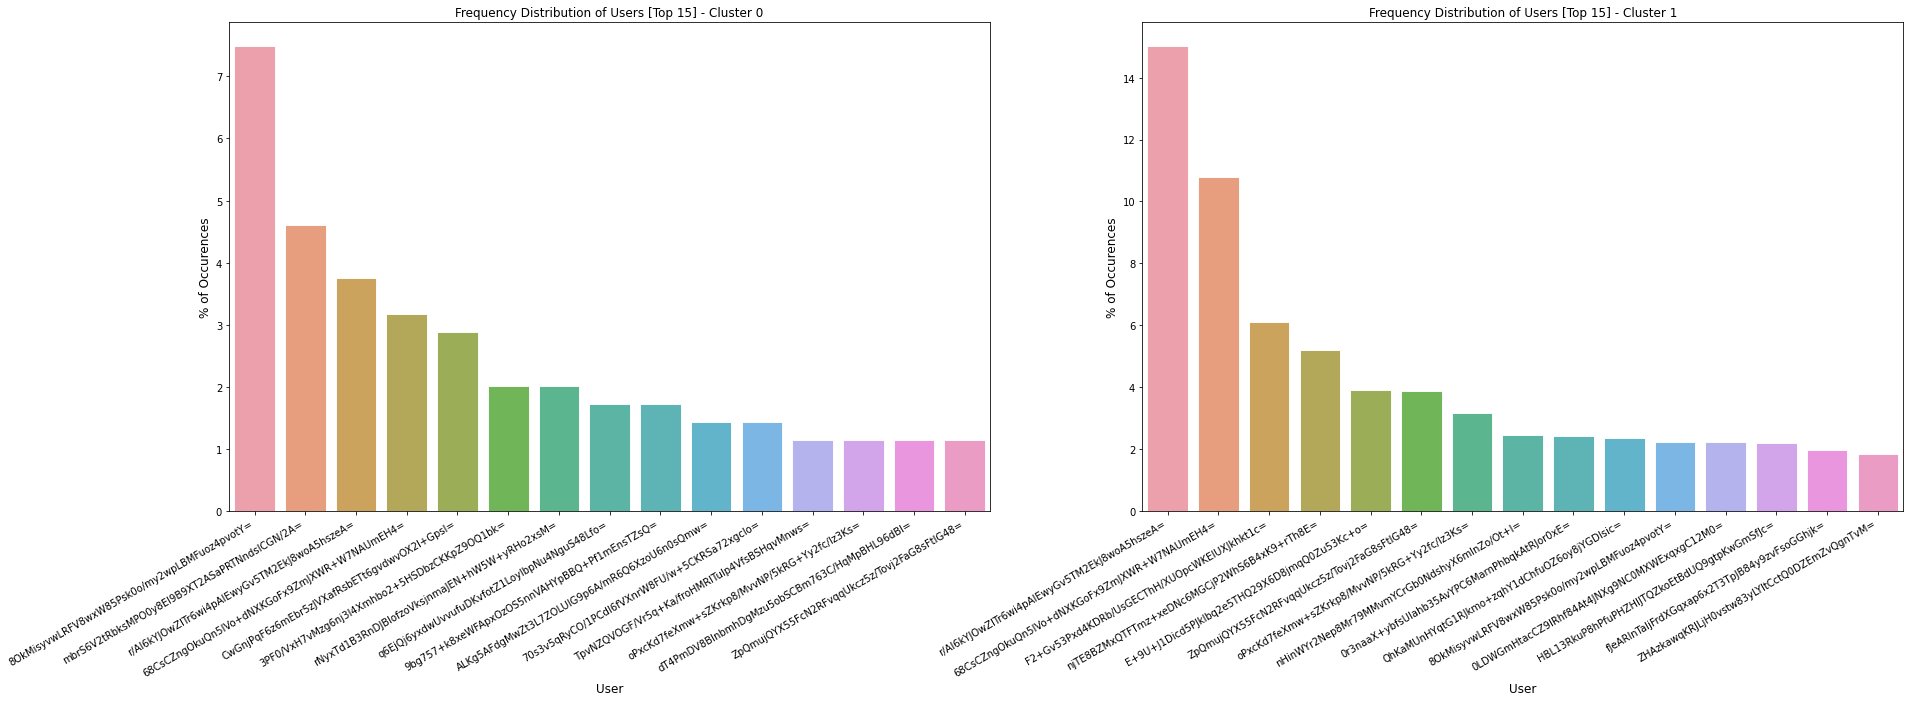

In [27]:
top_x=15
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 9)
axes = [ax1, ax2]
for i in sorted(list(set(cluster_labels_2))):
    column_count = static_metrics[cluster_labels_2 == i]["user"].value_counts().head(top_x)
    sns.set(style="darkgrid")
    sns.barplot(column_count.index, column_count.values / len(static_metrics[cluster_labels_2 == i]) * 100, alpha=0.9, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of Users [Top {top_x}] - Cluster {i}')
    axes[i].set_ylabel('% of Occurences', fontsize=12)
    axes[i].set_xlabel('User', fontsize=12)
    axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

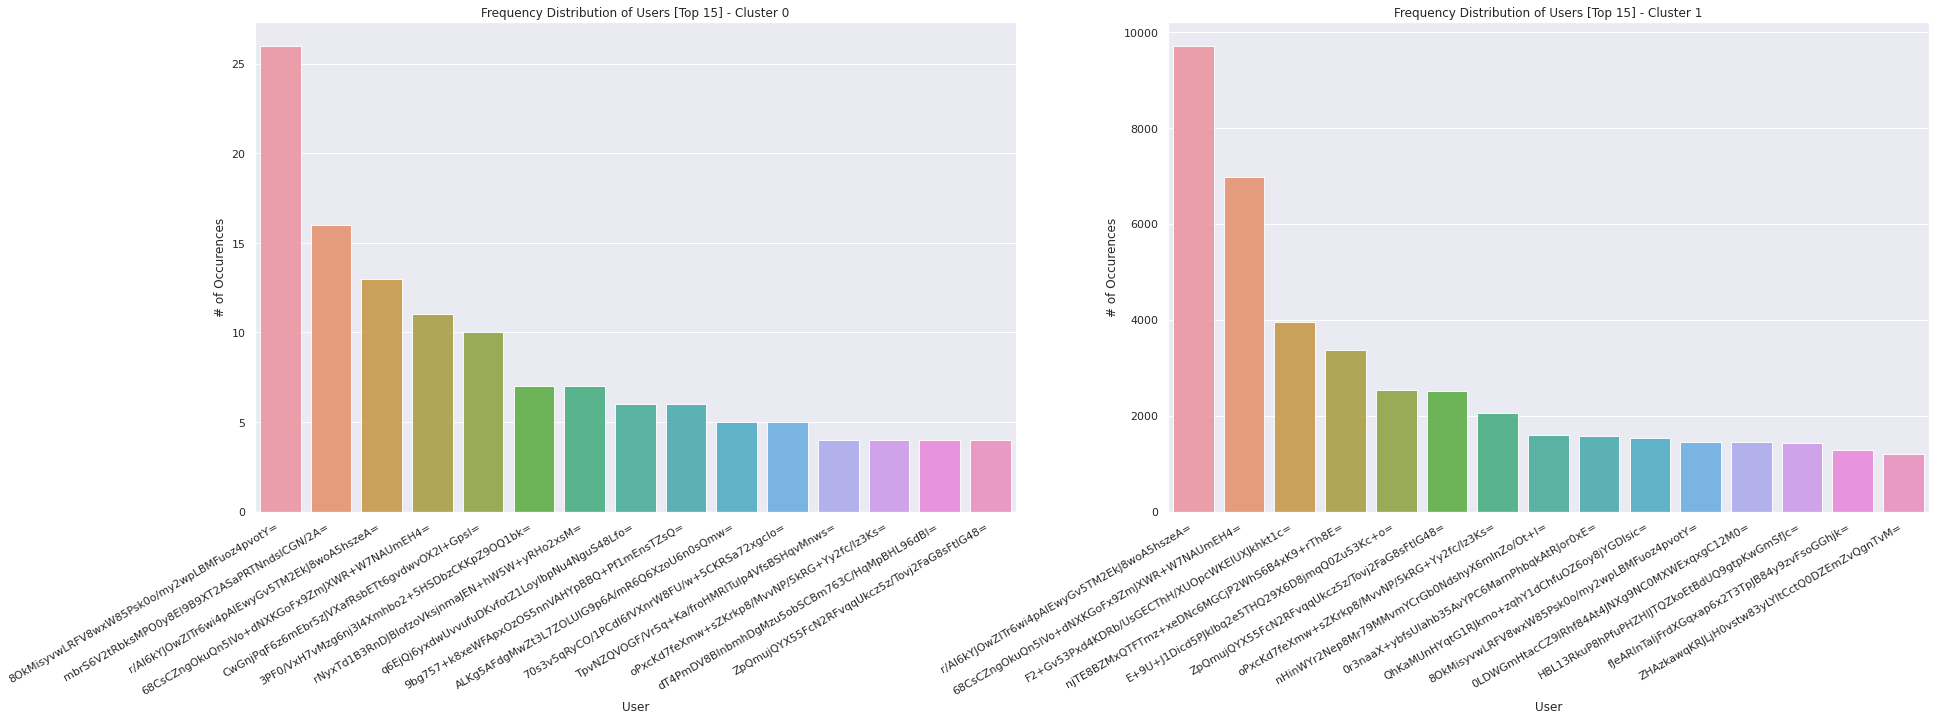

In [28]:
top_x=15
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 9)
axes = [ax1, ax2]
for i in sorted(list(set(cluster_labels_2))):
    column_count = static_metrics[cluster_labels_2 == i]["user"].value_counts().head(top_x)
    sns.set(style="darkgrid")
    sns.barplot(column_count.index, column_count.values, alpha=0.9, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of Users [Top {top_x}] - Cluster {i}')
    axes[i].set_ylabel('# of Occurences', fontsize=12)
    axes[i].set_xlabel('User', fontsize=12)
    axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

##### User intersection

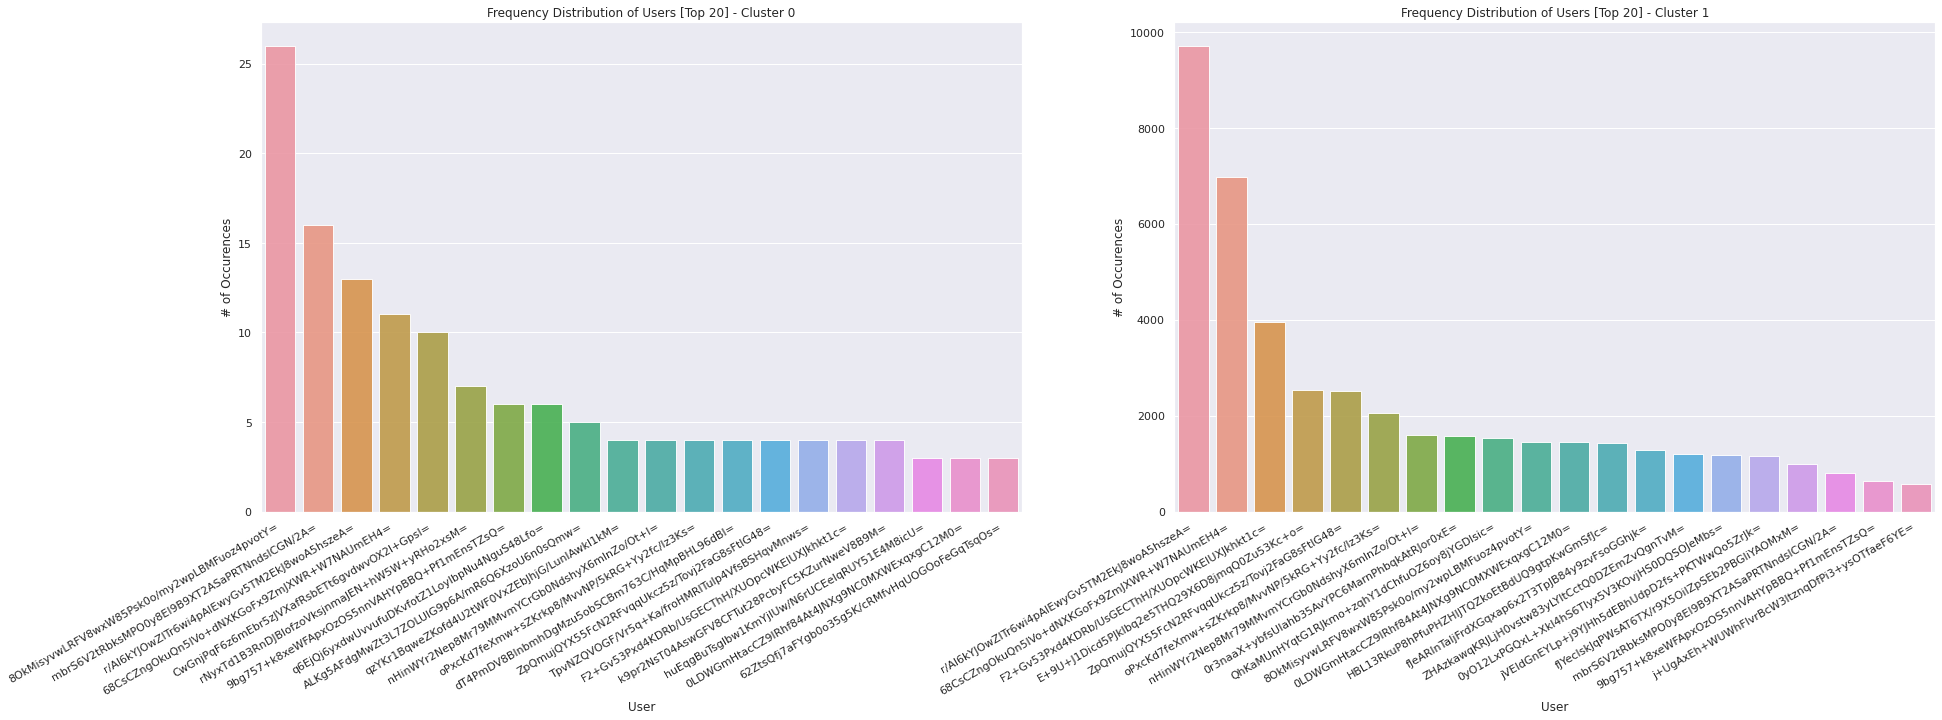

In [29]:
intersecting_users = set(static_metrics[(cluster_labels_2 == 0)]['user']).intersection(set(static_metrics[(cluster_labels_2 == 1)]['user']))
top_x=20
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 9)
axes = [ax1, ax2]
for i in sorted(list(set(cluster_labels_2))):
    column_count = static_metrics[(cluster_labels_2 == i) & (static_metrics['user'].isin(intersecting_users))]["user"].value_counts().head(top_x)
    sns.set(style="darkgrid")
    sns.barplot(column_count.index, column_count.values, alpha=0.9, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of Users [Top {top_x}] - Cluster {i}')
    axes[i].set_ylabel('# of Occurences', fontsize=12)
    axes[i].set_xlabel('User', fontsize=12)
    axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

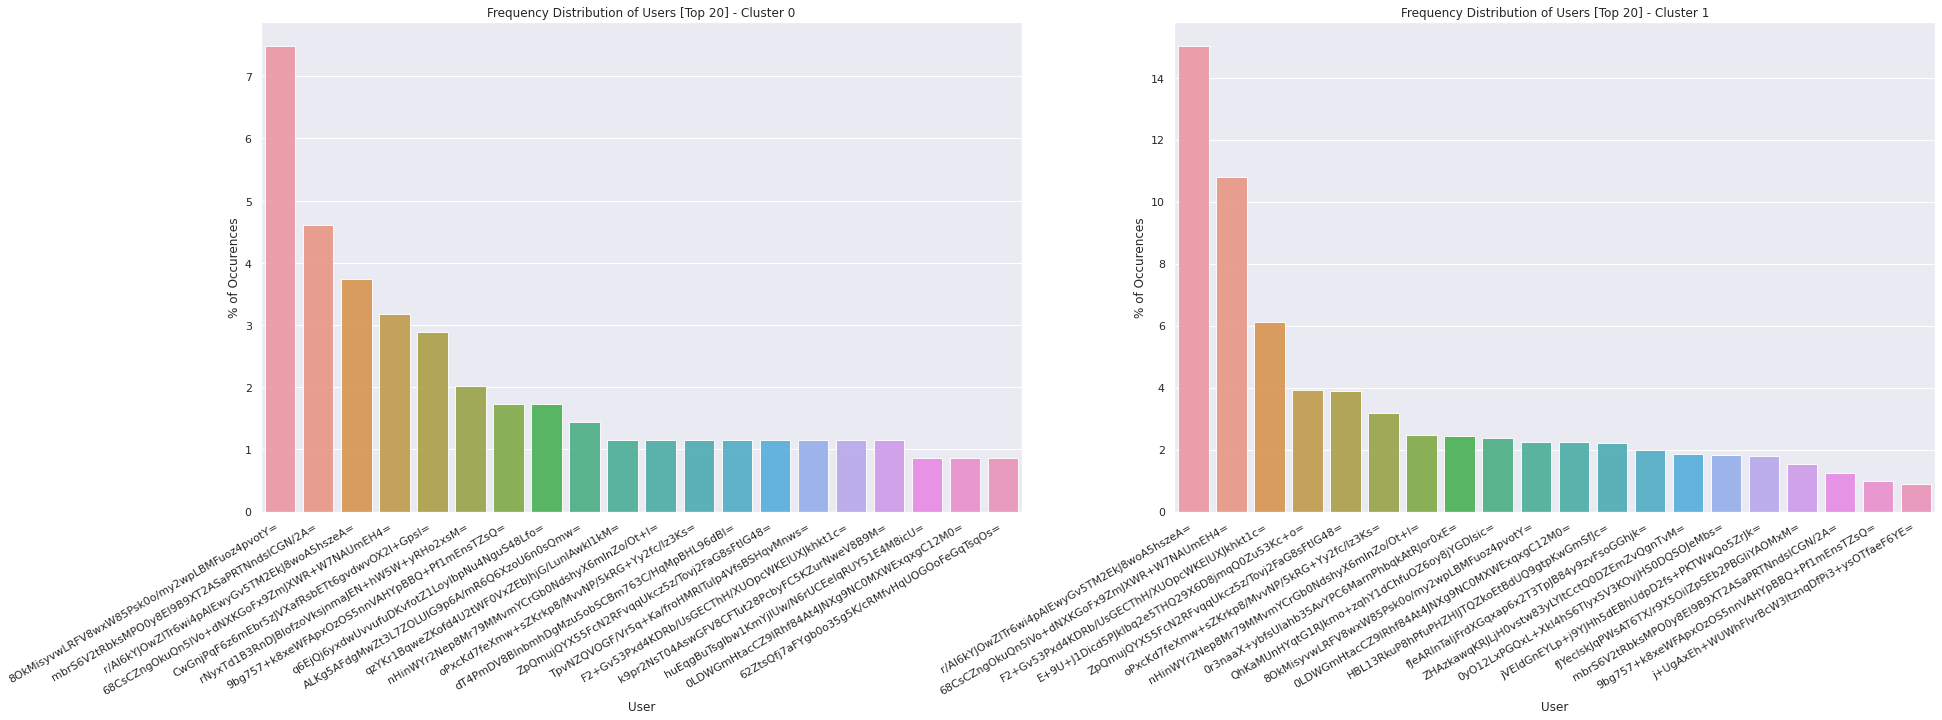

In [30]:
intersecting_users = set(static_metrics[(cluster_labels_2 == 0)]['user']).intersection(set(static_metrics[(cluster_labels_2 == 1)]['user']))
top_x=20
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 9)
axes = [ax1, ax2]
for i in sorted(list(set(cluster_labels_2))):
    column_count = static_metrics[(cluster_labels_2 == i) & (static_metrics['user'].isin(intersecting_users))]["user"].value_counts().head(top_x)
    sns.set(style="darkgrid")
    sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels_2 == i]) * 100, alpha=0.9, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of Users [Top {top_x}] - Cluster {i}')
    axes[i].set_ylabel('% of Occurences', fontsize=12)
    axes[i].set_xlabel('User', fontsize=12)
    axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

##### Top 10 users in cluster 0 vs their freq in cluster 1

([<matplotlib.axis.XTick at 0x7f95bc304ac0>,
 [Text(0, 0, '8OkMisyvwLRFV8wxW85Psk0o/my2wpLBMFuoz4pvotY='),
  Text(1, 0, 'mbrS6V2tRbksMPO0y8EI9B9XT2ASaPRTNndslCGN/2A='),
  Text(2, 0, 'r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA='),
  Text(3, 0, '68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4='),
  Text(4, 0, 'CwGnjPqF6z6mEbr5zJVXafRsbETt6gvdwvOX2l+GpsI='),
  Text(5, 0, '3PF0/VxH7vMzg6nj3l4Xmhbo2+5HSDbzCKKpZ9OQ1bk='),
  Text(6, 0, 'rNyxTd1B3RnDJBIofzoVksjnmaJEN+hW5W+yRHo2xsM='),
  Text(7, 0, 'q6EjQj6yxdwUvvufuDKvfotZ1LoylbpNu4NguS48Lfo='),
  Text(8, 0, '9bg757+k8xeWFApxOzOS5nnVAHYpBBQ+Pf1mEnsTZsQ='),
  Text(9, 0, 'ALKg5AFdgMwZt3L7ZOLUlG9p6A/mR6Q6XzoU6n0sQmw='),
  Text(10, 0, '70s3v5qRyCO/1PCdI6fVXnrW8FU/w+5CKRSa72xgcIo='),
  Text(11, 0, 'TpvNZQVOGF/Vr5q+Ka/froHMRlTulp4VfsBSHqvMnws='),
  Text(12, 0, 'oPxcKd7feXmw+sZKrkp8/MvvNP/5kRG+Yy2fc/lz3Ks='),
  Text(13, 0, 'dT4PmDV8BInbmhDgMzu5obSCBm763C/HqMpBHL96dBI='),
  Text(14, 0, 'ZpQmujQYX55FcN2RFvqqUkcz5z/Tovj2FaG8sFtlG48=')])

<Figure size 2160x648 with 0 Axes>

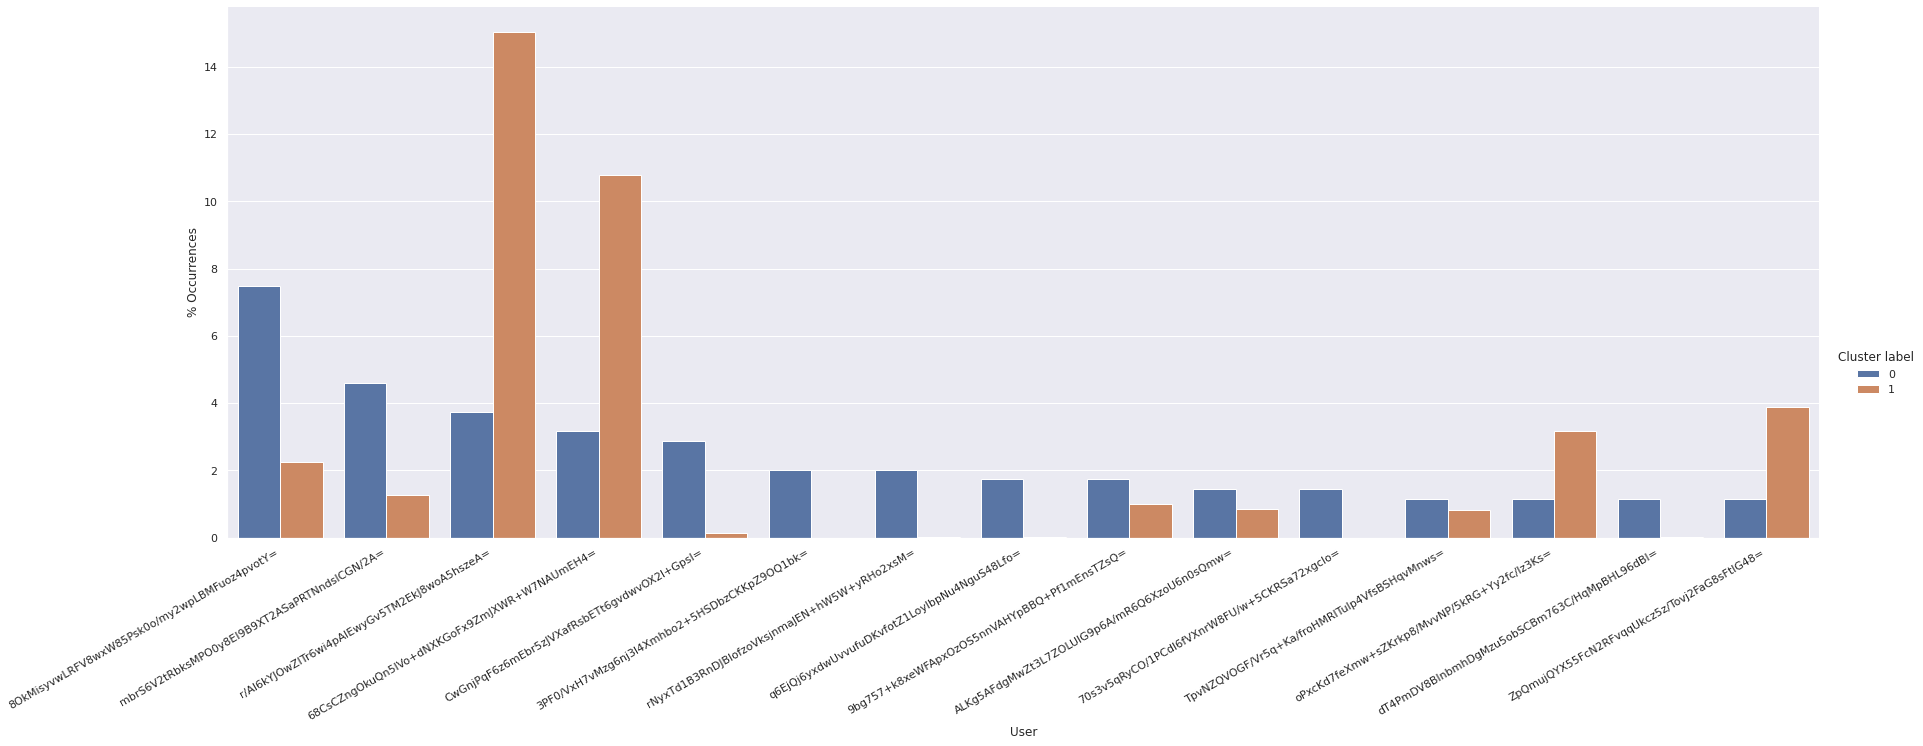

In [31]:
top_15_users_cluster_0 = static_metrics[(cluster_labels_2 == 0)]['user'].value_counts().head(15).index.values

column_count_0 = static_metrics[(cluster_labels_2 == 0) & (static_metrics['user'].isin(top_15_users_cluster_0))]["user"].value_counts().values
column_count_1 = []
for user in top_15_users_cluster_0:
    val = 0
    val_return = static_metrics[(cluster_labels_2 == 1) & (static_metrics['user'] == user)]["user"].value_counts().values
    if len(val_return) > 0:
        val = val_return[0]
    column_count_1.append(val)
                                                                                                                
values = [
    (np.array(column_count_0)  / len(static_metrics[cluster_labels_2 == 0]) * 100),
     (np.array(column_count_1)  / len(static_metrics[cluster_labels_2 == 1]) * 100)
]

final_data_0 =[el for el in zip(top_15_users_cluster_0, values[0], [0]*len(column_count_0))]
final_data_1 =[el for el in zip(top_15_users_cluster_0, values[1], [1]*len(column_count_1))]

df_cl_0 = pd.DataFrame(final_data_0, columns=["User", "% Occurrences", "Cluster label"])
df_cl_1 = pd.DataFrame(final_data_1, columns=["User", "% Occurrences", "Cluster label"])

df_top_cl_0 = pd.concat([df_cl_0, df_cl_1], ignore_index=True)

plt.figure(figsize=(30, 9))
sns.set(style="darkgrid")
sns.catplot(x='User', y="% Occurrences", hue="Cluster label", data=df_top_cl_0, kind='bar', height=8, aspect=3)

plt.xticks(ticks=range(len(top_15_users_cluster_0)), labels=top_15_users_cluster_0, rotation=30, horizontalalignment='right')

##### Top 10 users in cluster 1 vs their freq in cluster 0

([<matplotlib.axis.XTick at 0x7f95ffbe9190>,
 [Text(0, 0, 'r/Al6kYJOwZITr6wi4pAlEwyGv5TM2EkJ8woA5hszeA='),
  Text(1, 0, '68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4='),
  Text(2, 0, 'F2+Gv53Pxd4KDRb/UsGECThH/XUOpcWKElUXJkhkt1c='),
  Text(3, 0, 'njTE8BZMxQTFTmz+xeDNc6MGCjP2WhS6B4xK9+rTh8E='),
  Text(4, 0, 'E+9U+J1Dicd5PJklbq2e5THQ29X6D8jmqQ0Zu53Kc+o='),
  Text(5, 0, 'ZpQmujQYX55FcN2RFvqqUkcz5z/Tovj2FaG8sFtlG48='),
  Text(6, 0, 'oPxcKd7feXmw+sZKrkp8/MvvNP/5kRG+Yy2fc/lz3Ks='),
  Text(7, 0, 'nHinWYr2Nep8Mr79MMvmYCrGb0NdshyX6mlnZo/Ot+I='),
  Text(8, 0, '0r3naaX+ybfsUIahb35AvYPC6MarnPhbqkAtRJor0xE='),
  Text(9, 0, 'QhKaMUnHYqtG1RJkmo+zqhY1dChfuOZ6oy8jYGDlsic='),
  Text(10, 0, '8OkMisyvwLRFV8wxW85Psk0o/my2wpLBMFuoz4pvotY='),
  Text(11, 0, '0LDWGmHtacCZ9lRhf84At4JNXg9NC0MXWExqxgC12M0='),
  Text(12, 0, 'HBL13RkuP8hPfuPHZHIJTQZkoEtBdUQ9gtpKwGmSfJc='),
  Text(13, 0, 'fJeARInTaIjFrdXGqxap6x2T3TpJB84y9zvFsoGGhjk='),
  Text(14, 0, 'ZHAzkawqKRJLjH0vstw83yLYltCctQ0DZEmZvQgnTvM=')])

<Figure size 2160x648 with 0 Axes>

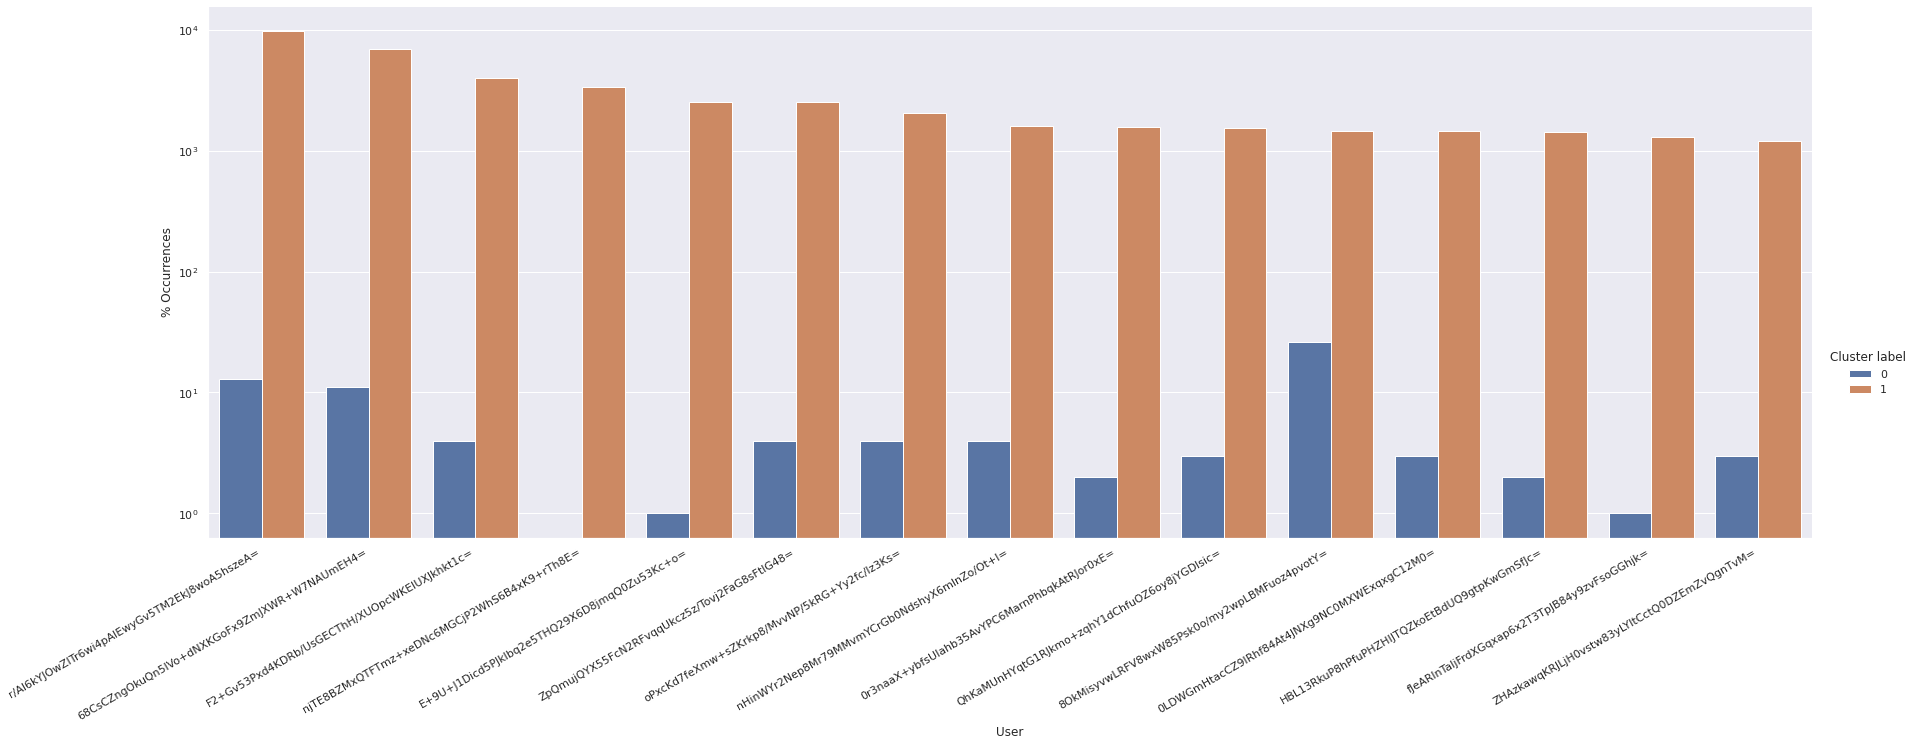

In [32]:
top_15_users_cluster_1 = static_metrics[(cluster_labels_2 == 1)]['user'].value_counts().head(15).index.values

column_count_1 = static_metrics[(cluster_labels_2 == 1) & (static_metrics['user'].isin(top_15_users_cluster_1))]["user"].value_counts().values
column_count_0 = []
for user in top_15_users_cluster_1:
    val = 0
    val_return = static_metrics[(cluster_labels_2 == 0) & (static_metrics['user'] == user)]["user"].value_counts().values
    if len(val_return) > 0:
        val = val_return[0]
    column_count_0.append(val)
                                                                                                                
values = [
    (np.array(column_count_0)), #/ len(static_metrics[cluster_labels_2 == 0]) * 100),  
     (np.array(column_count_1)) # / len(static_metrics[cluster_labels_2 == 1]) * 100)
]

final_data_0 =[el for el in zip(top_15_users_cluster_1, values[0], [0]*len(column_count_0))]
final_data_1 =[el for el in zip(top_15_users_cluster_1, values[1], [1]*len(column_count_1))]

df_cl_0 = pd.DataFrame(final_data_0, columns=["User", "% Occurrences", "Cluster label"])
df_cl_1 = pd.DataFrame(final_data_1, columns=["User", "% Occurrences", "Cluster label"])

df_top_cl_0 = pd.concat([df_cl_0, df_cl_1], ignore_index=True)

plt.figure(figsize=(30, 9))
sns.set(style="darkgrid")
sns.catplot(x='User', y="% Occurrences", hue="Cluster label", data=df_top_cl_0, kind='bar', height=8, aspect=3)
plt.yscale('log')
#print(values)
#plt.figure(figsize=(15,9))
#
#sns.barplot(range(len(top_15_users_cluster_0)),values , alpha=0.9)
#plt.title(f'Frequency Distribution of Users [Top {top_x}] - Cluster {i}')
#plt.ylabel('% of Occurences', fontsize=12)
#plt.xlabel('User', fontsize=12)
plt.xticks(ticks=range(len(top_15_users_cluster_1)), labels=top_15_users_cluster_1, rotation=30, horizontalalignment='right')

#### Frequency distribution of unique jobs name

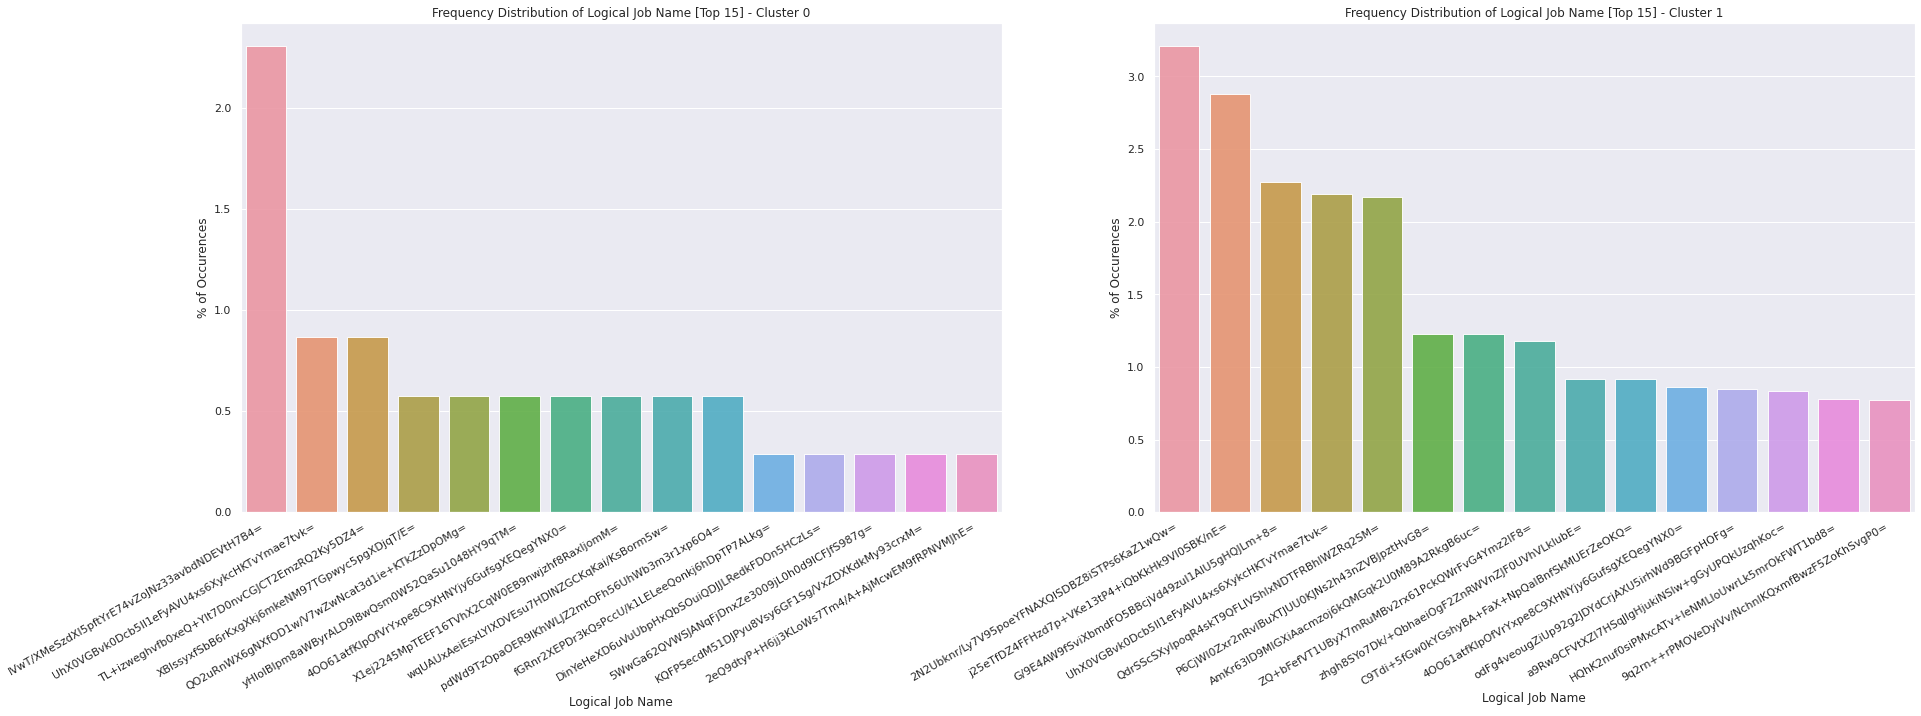

In [33]:
top_x=15
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(30, 9)
axes = [ax1, ax2]
for i in sorted(list(set(cluster_labels_2))):
    column_count = static_metrics[cluster_labels_2 == i]["logical job name"].value_counts().head(top_x)
    sns.set(style="darkgrid")
    sns.barplot(column_count.index, column_count.values / len(static_metrics[cluster_labels_2 == i]) * 100, alpha=0.9, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of Logical Job Name [Top {top_x}] - Cluster {i}')
    axes[i].set_ylabel('% of Occurences', fontsize=12)
    axes[i].set_xlabel('Logical Job Name', fontsize=12)
    axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

#### Frequency distribution of Priority, scheduling class and different machines restriction

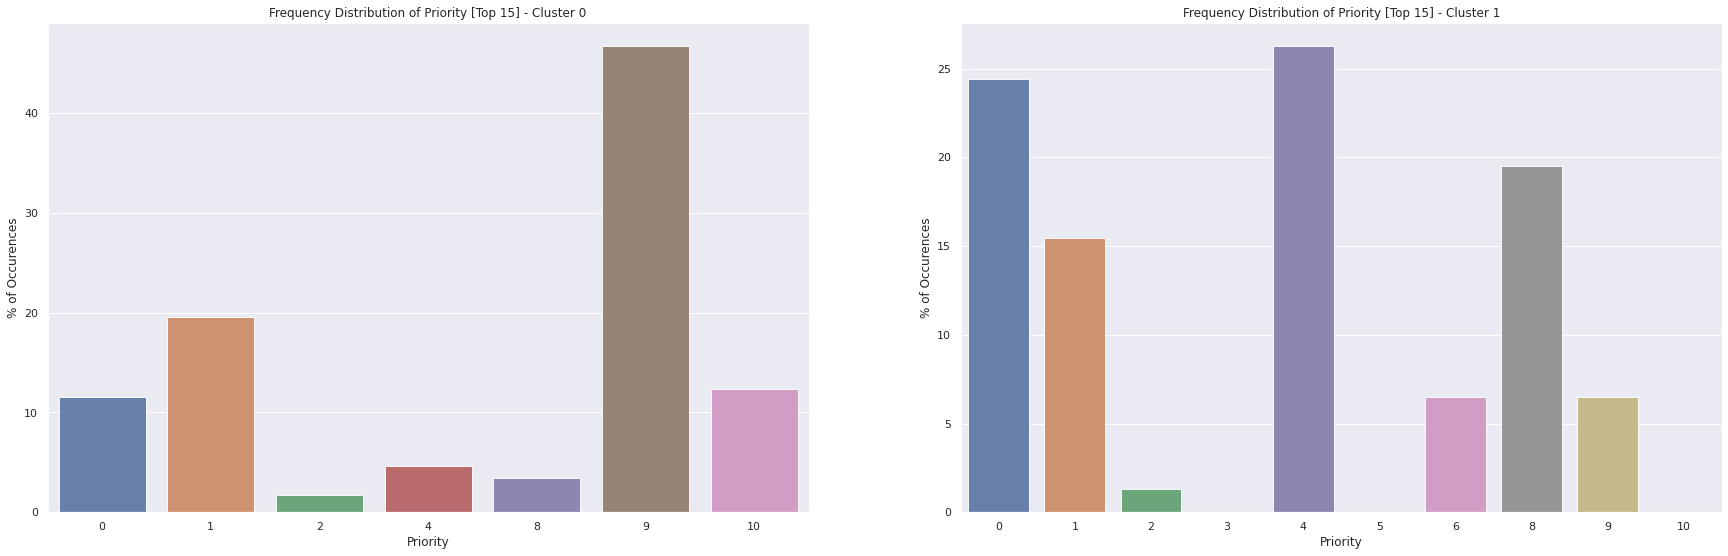

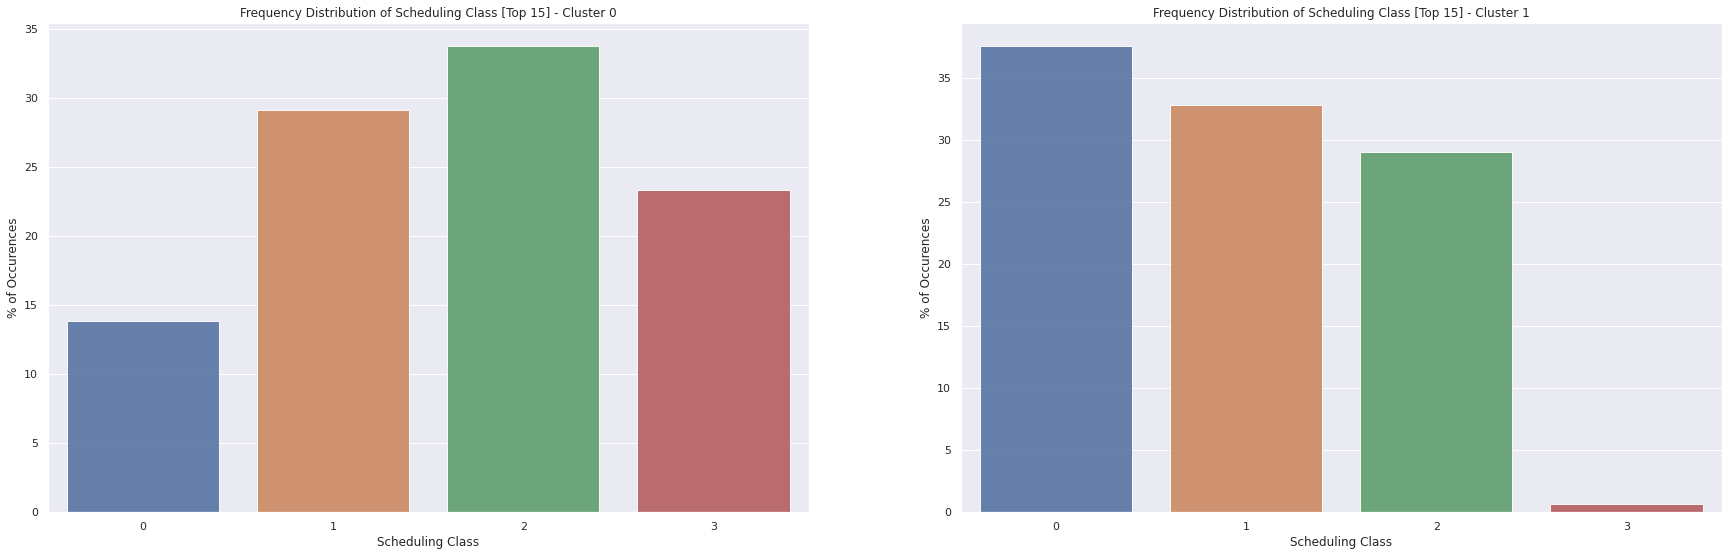

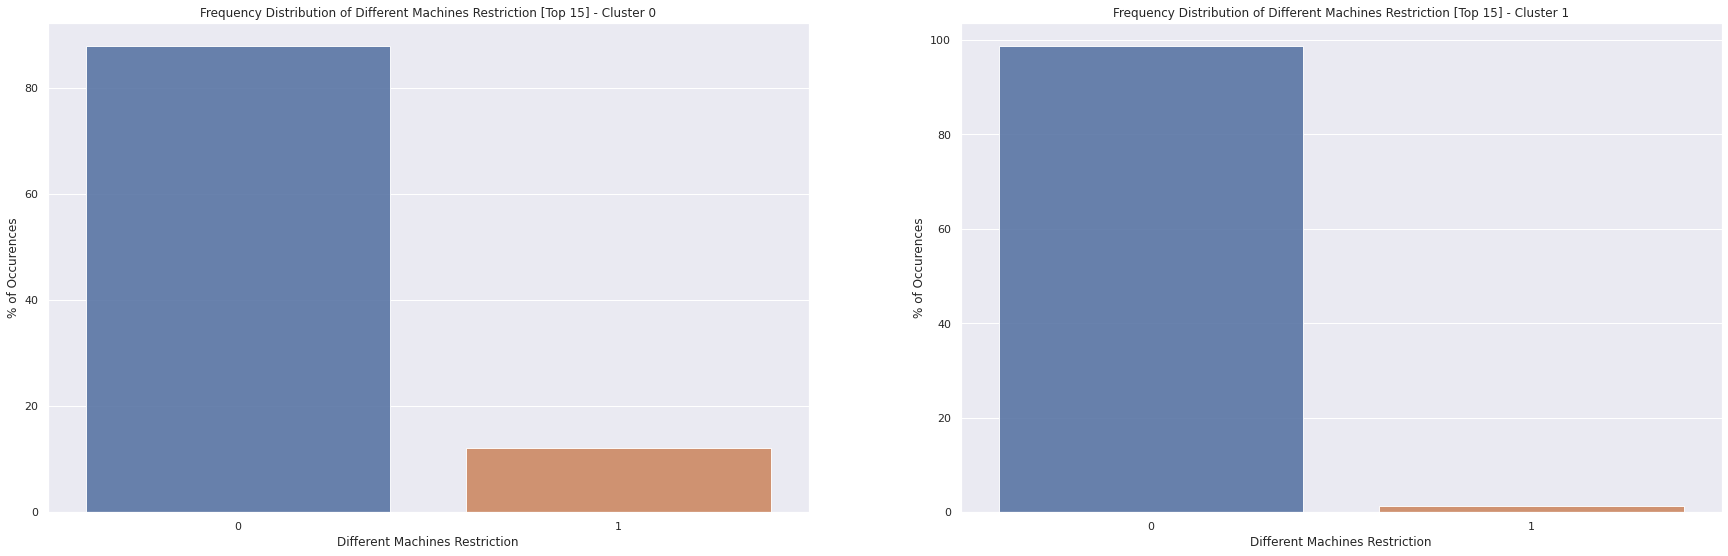

In [34]:
top_x=15
for label in ["priority", "scheduling class", "different machines restriction"]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes = [ax1, ax2]
    for i in sorted(list(set(cluster_labels_2))):
        column_count = static_metrics[cluster_labels_2 == i][label].value_counts().sort_values(ascending=False).head(top_x)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels_2 == i]) * 100, alpha=0.9, ax=axes[i])
        axes[i].set_title(f'Frequency Distribution of {label.title()} [Top {top_x}] - Cluster {i}')
        axes[i].set_ylabel('% of Occurences', fontsize=12)
        axes[i].set_xlabel(f'{label.title()}', fontsize=12)
        #axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

#### Frequency distribution of CPU, Memory, and Disk request quartiles

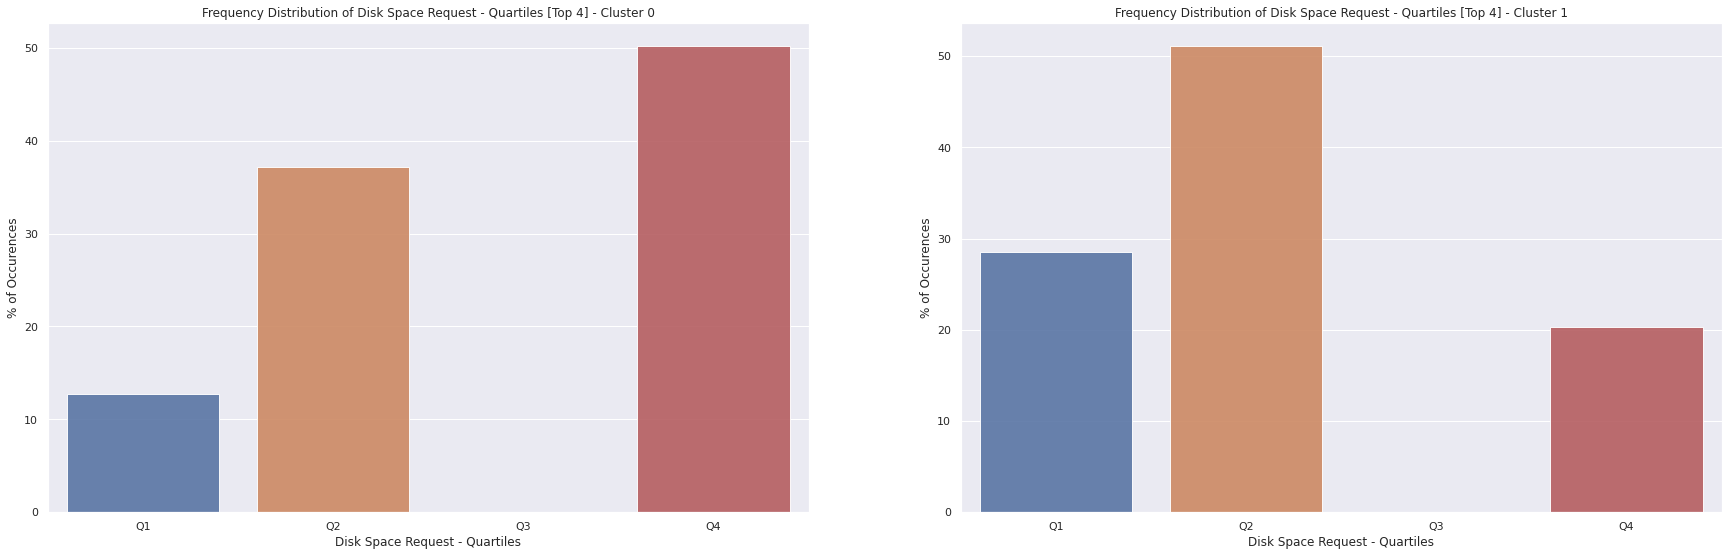

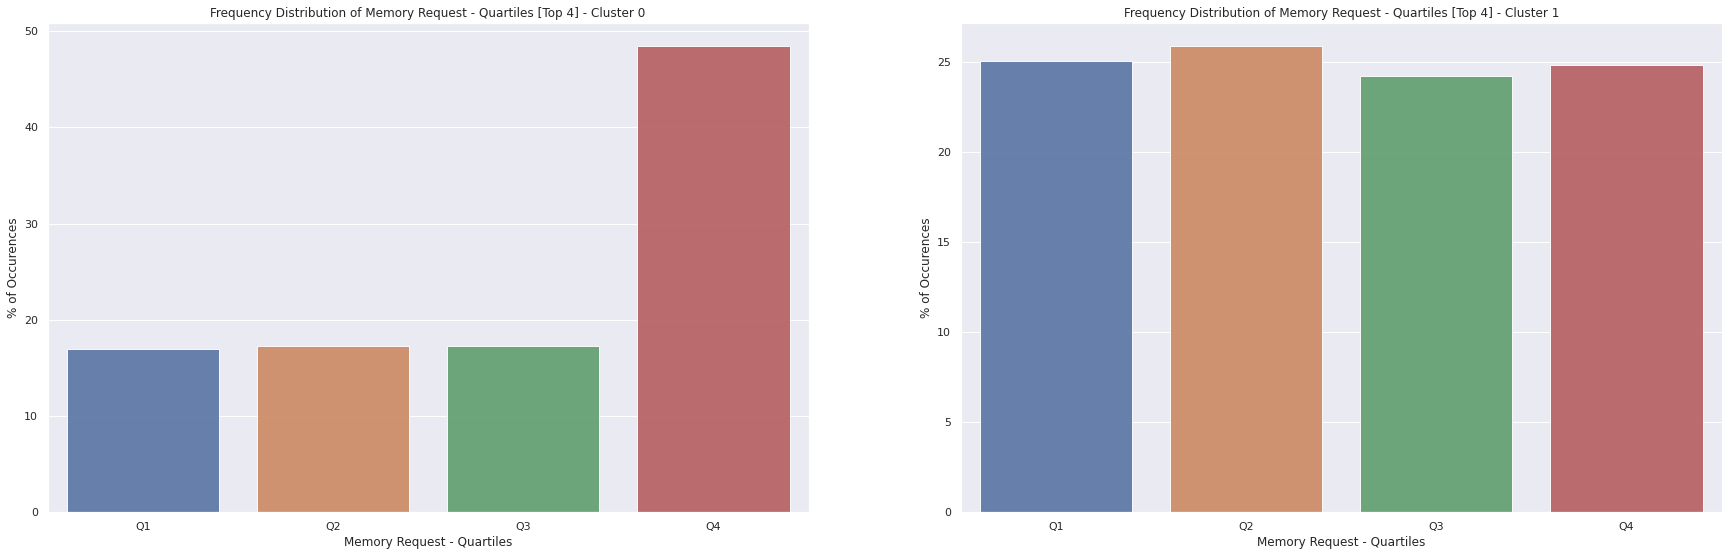

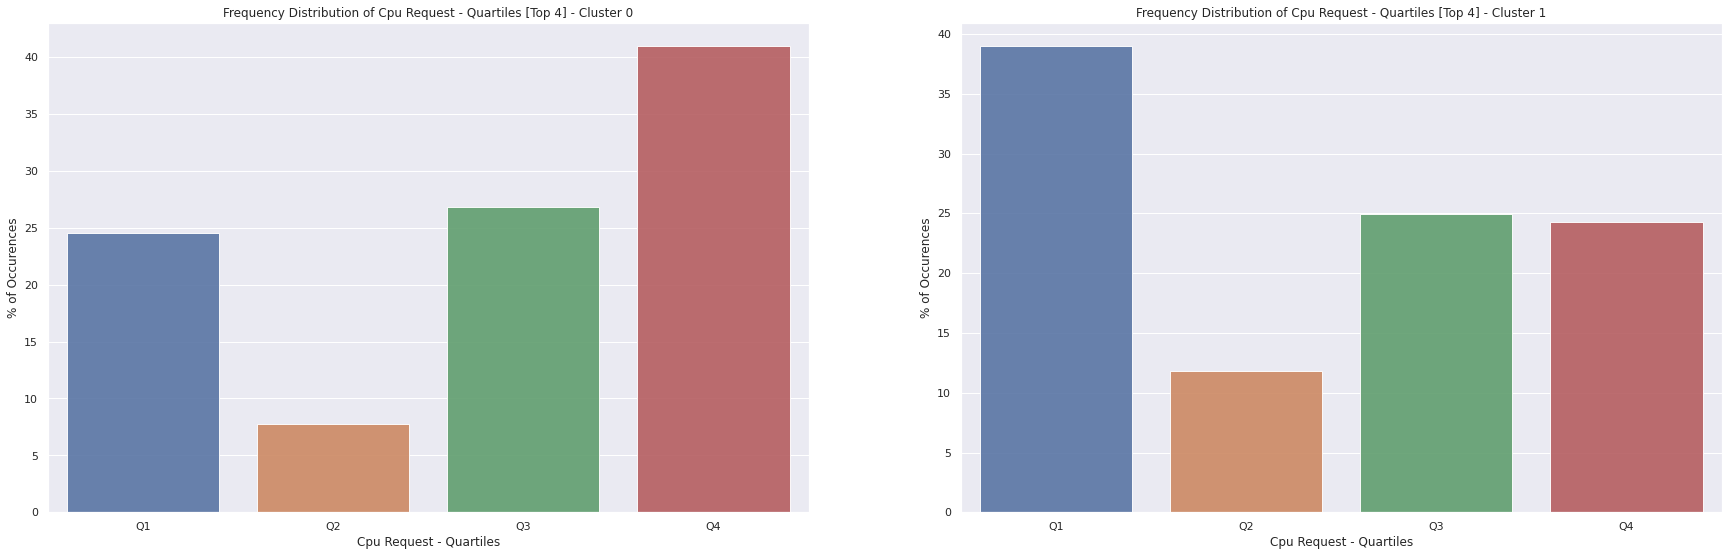

In [35]:
top_x=4
for label in ["disk space request - Quartiles", "memory request - Quartiles", "CPU request - Quartiles"]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes = [ax1, ax2]
    for i in sorted(list(set(cluster_labels_2))):
        column_count = static_metrics[cluster_labels_2 == i][label].value_counts().sort_index(ascending=True).head(top_x)
        for pr_lab in ['Q1', 'Q2', 'Q3', 'Q4']:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(['Q1', 'Q2', 'Q3', 'Q4'])
        sns.set(style="darkgrid")
        sns.barplot(column_count.index.astype(str), column_count.values  / len(static_metrics[cluster_labels_2 == i]) * 100, alpha=0.9, ax=axes[i])
        axes[i].set_title(f'Frequency Distribution of {label.title()} [Top {top_x}] - Cluster {i}')
        axes[i].set_ylabel('% of Occurences', fontsize=12)
        axes[i].set_xlabel(f'{label.title()}', fontsize=12)
        #axes[i].set_xticklabels(column_count.index, rotation=30, horizontalalignment='right')

### K-Means = 6

#### Frequency distribution of scheduling class

[1 1 1 ... 0 0 0]


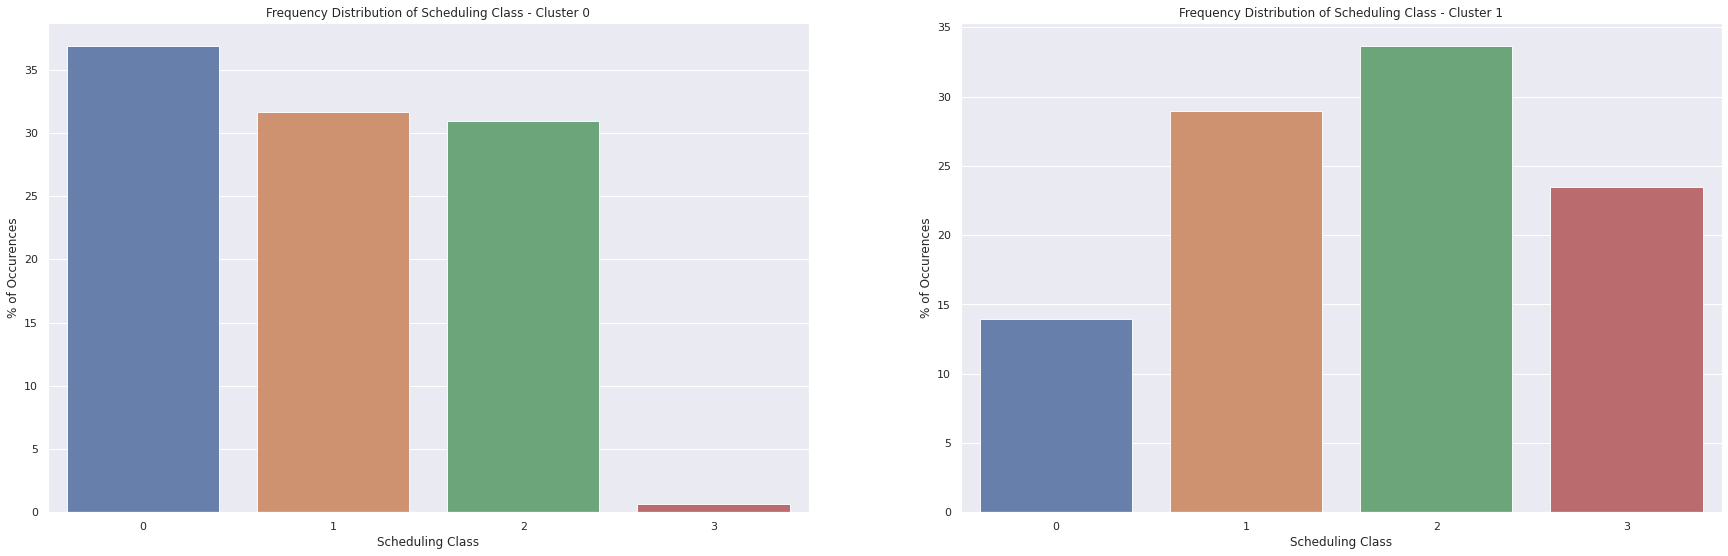

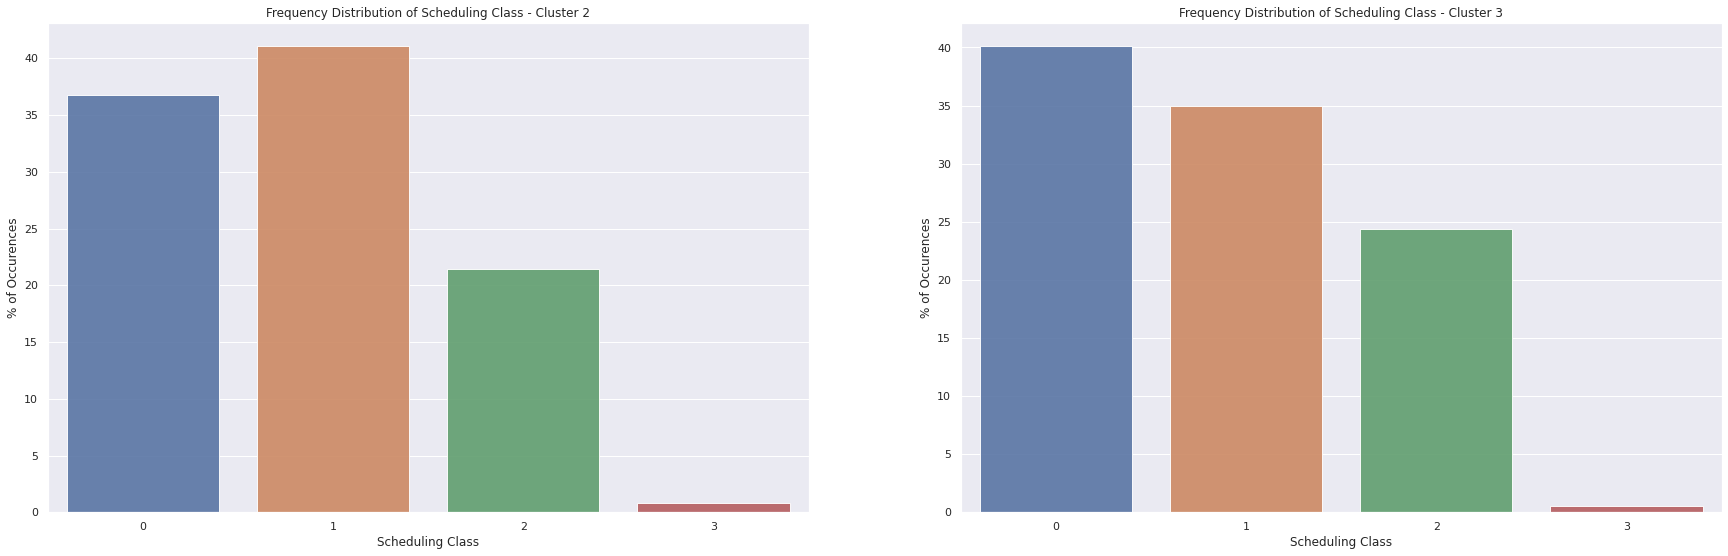

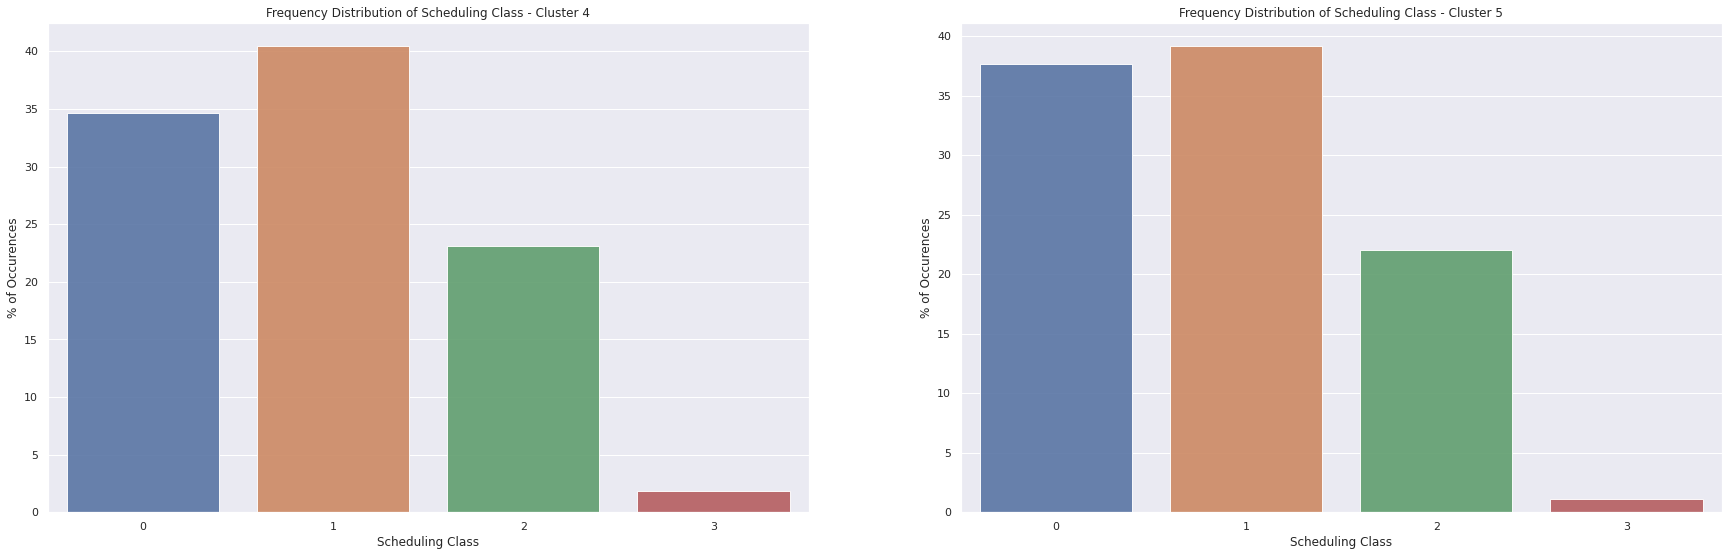

In [36]:
cluster_labels = cluster_labels_6
print(cluster_labels)
label = "scheduling class"

for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for sch_class in range(0,4):
            if sch_class not in column_count.index:
                s = pd.Series([0], index=[sch_class])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)


#### Frequency distribution of priority

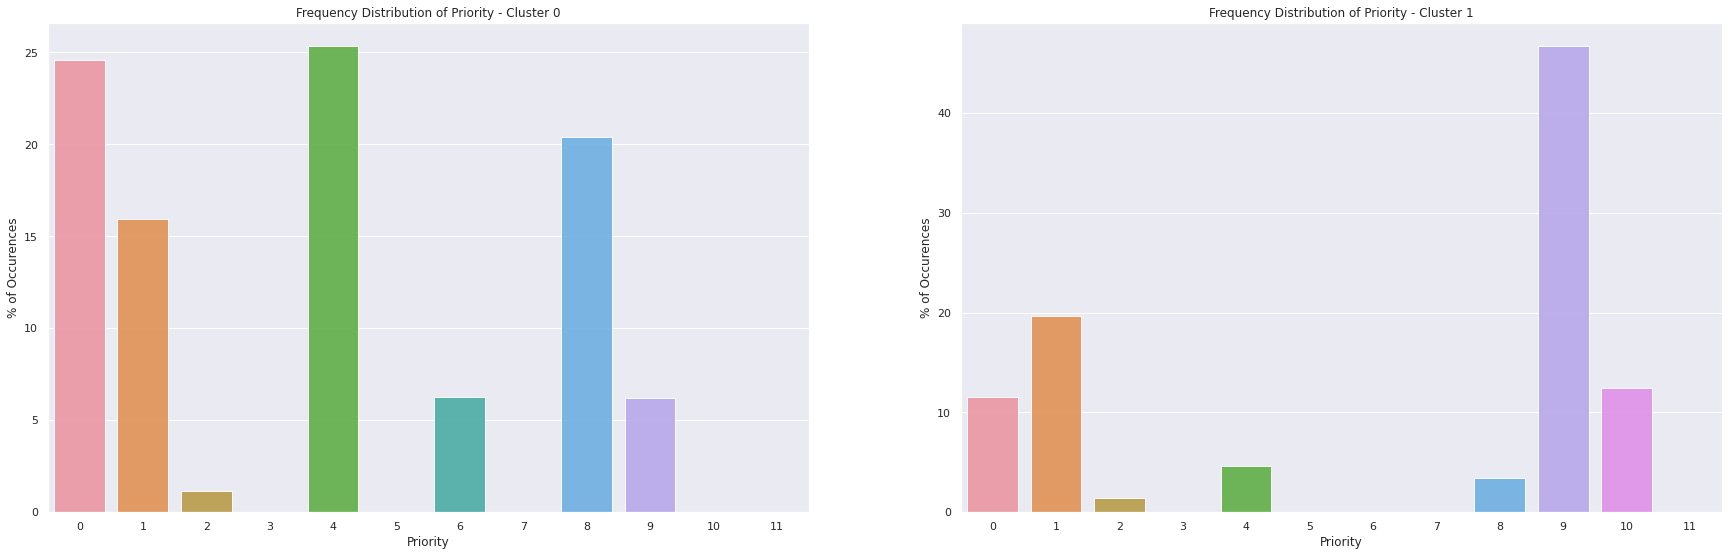

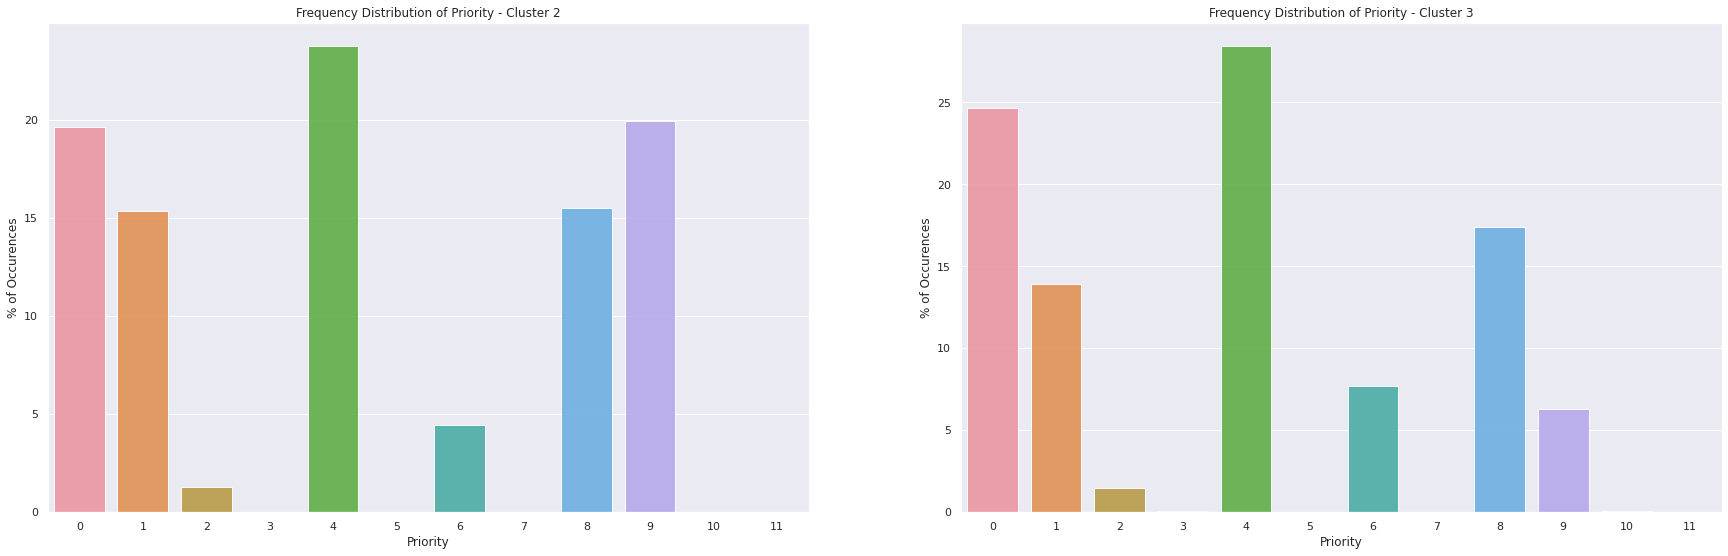

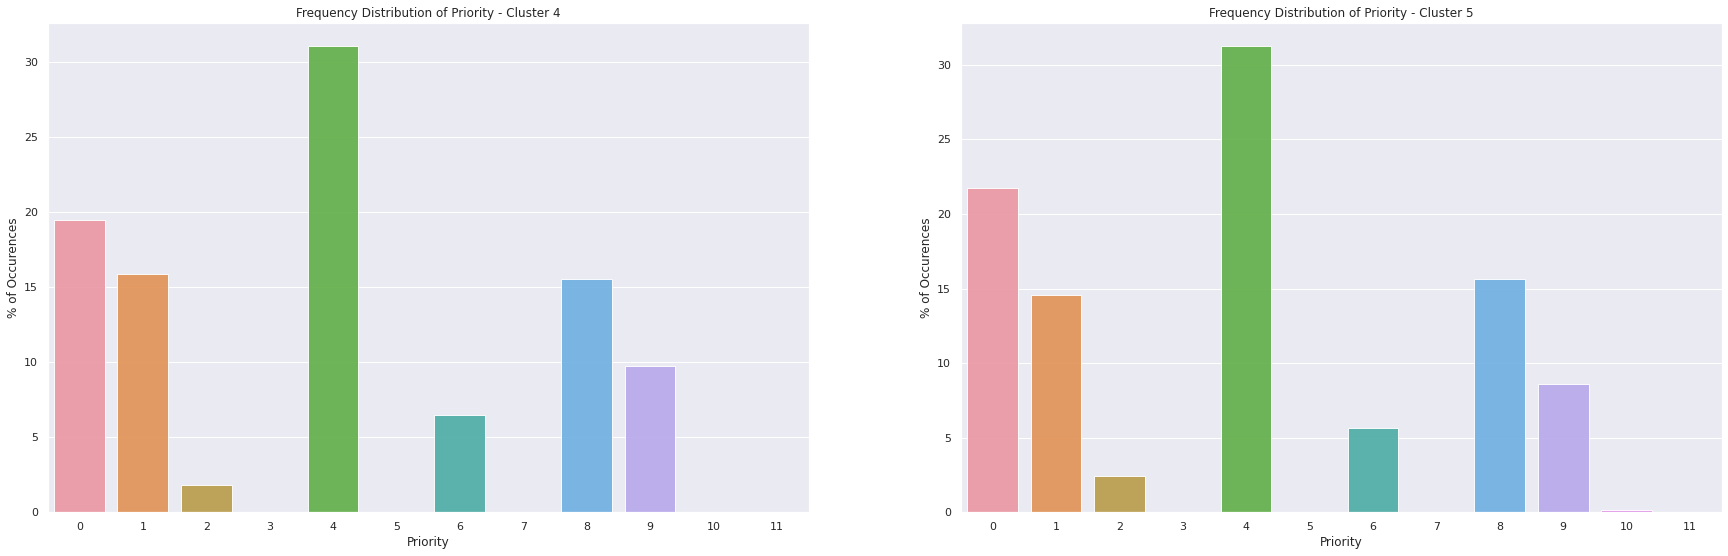

In [37]:
cluster_labels = cluster_labels_6
label = "priority"

for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in range(0,12):
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)


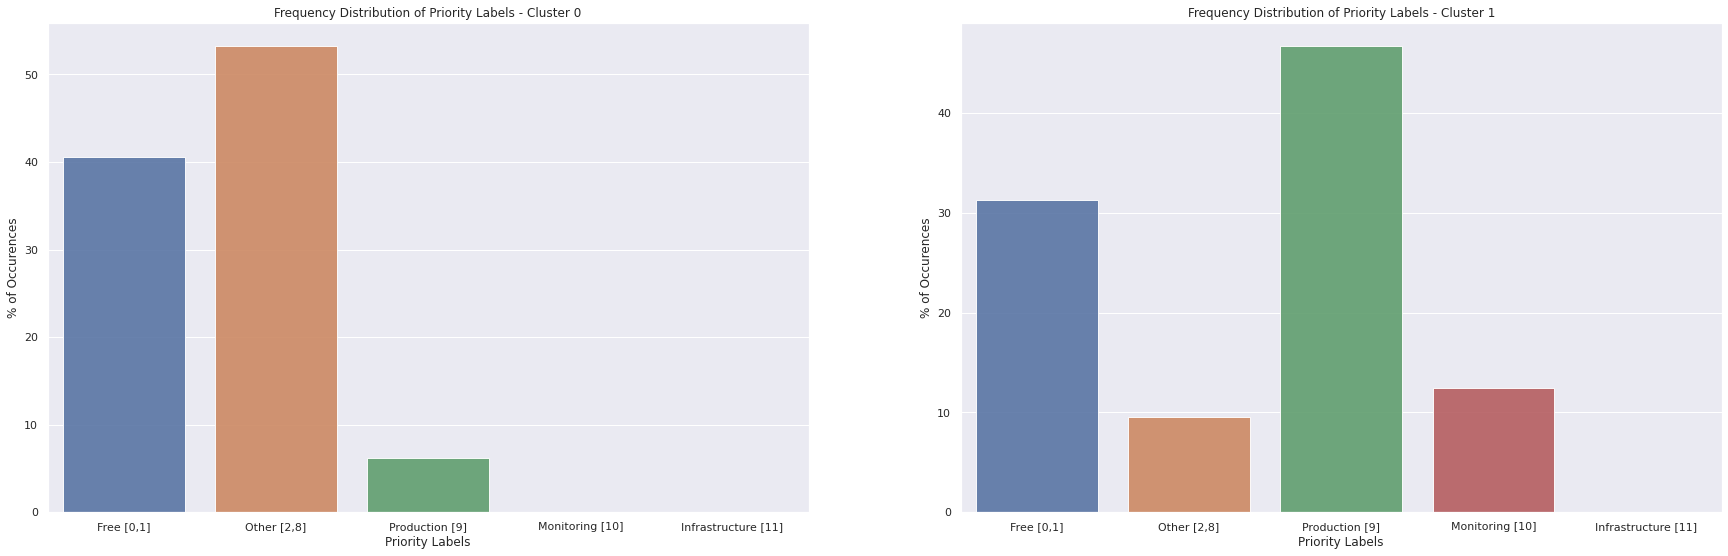

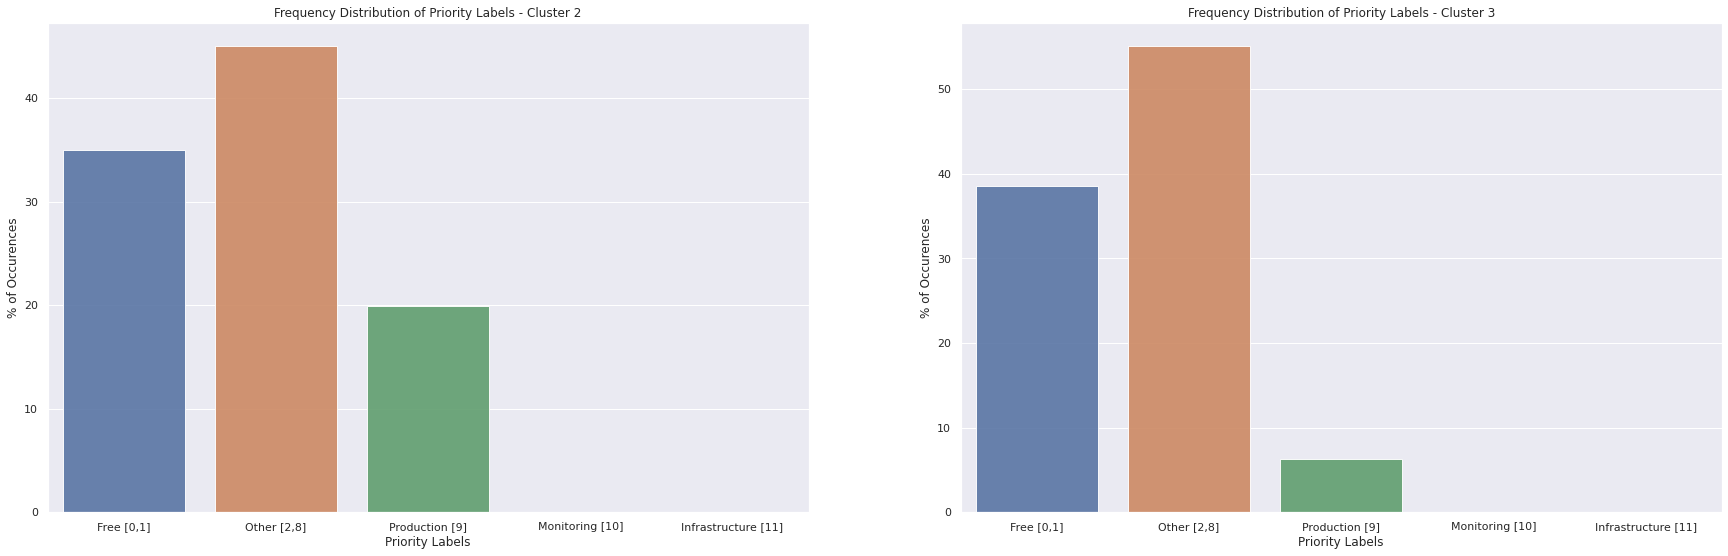

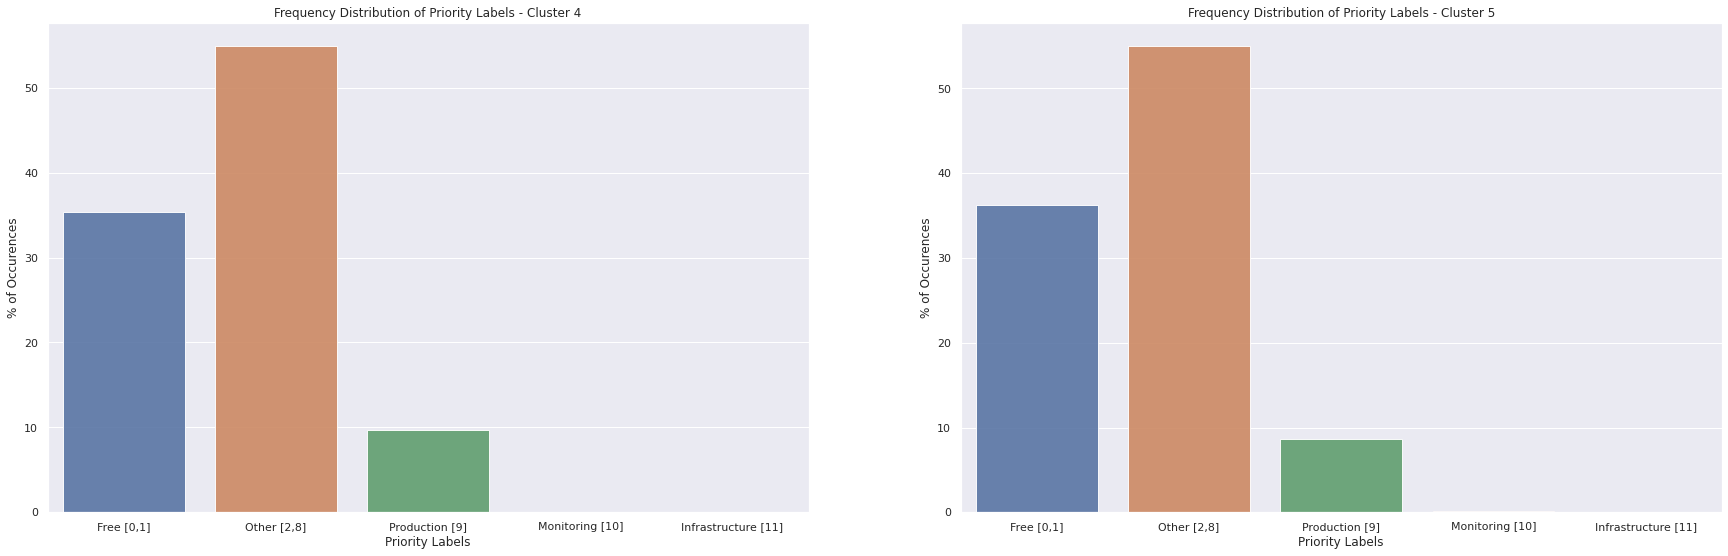

In [38]:
cluster_labels = cluster_labels_6
label = "priority labels"
priority_labels = ["Free [0,1]", "Other [2,8]", "Production [9]", "Monitoring [10]", "Infrastructure [11]"]

for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts()
        for pr_lab in priority_labels:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(priority_labels)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Freqency distribution for different machines restriction

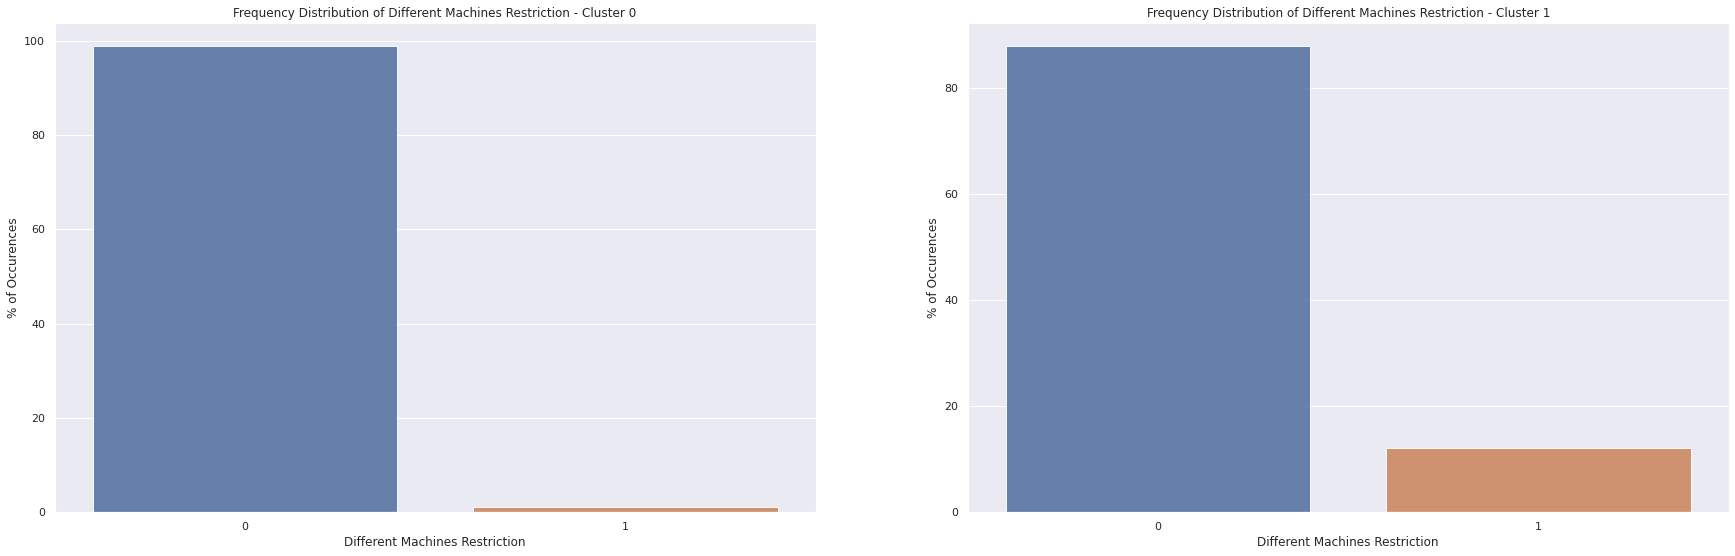

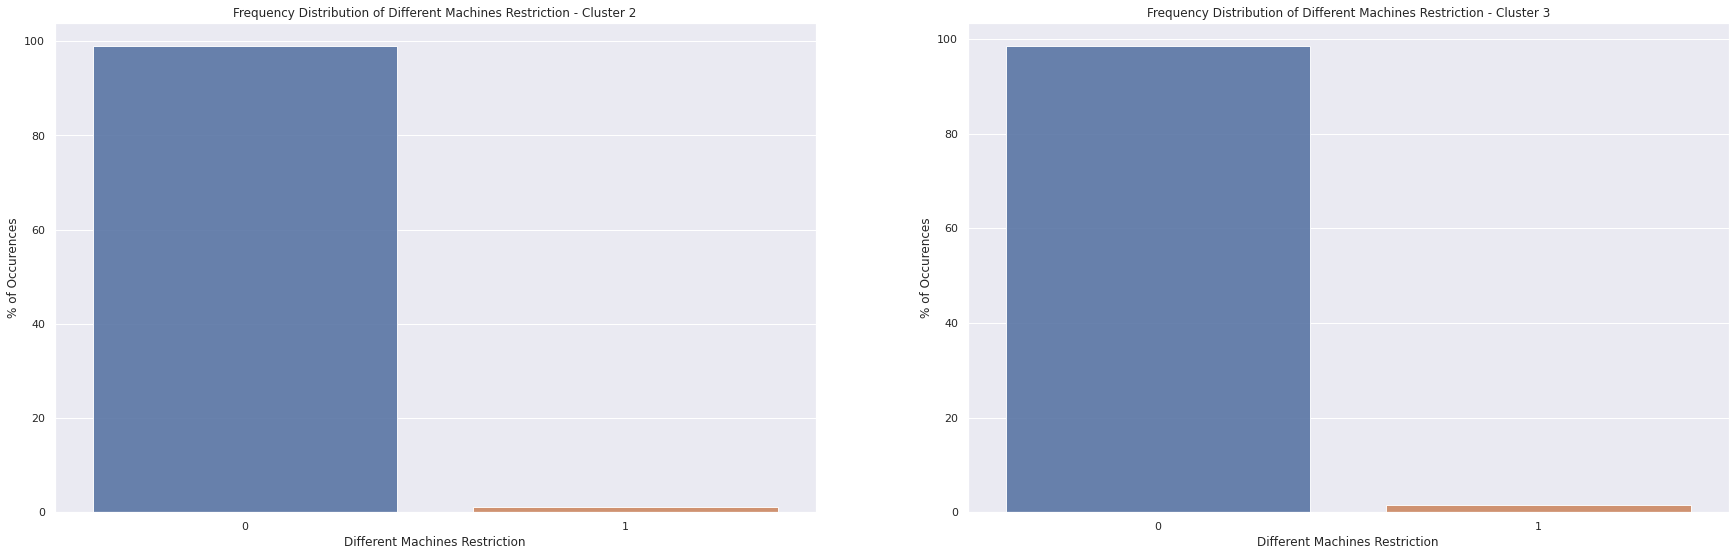

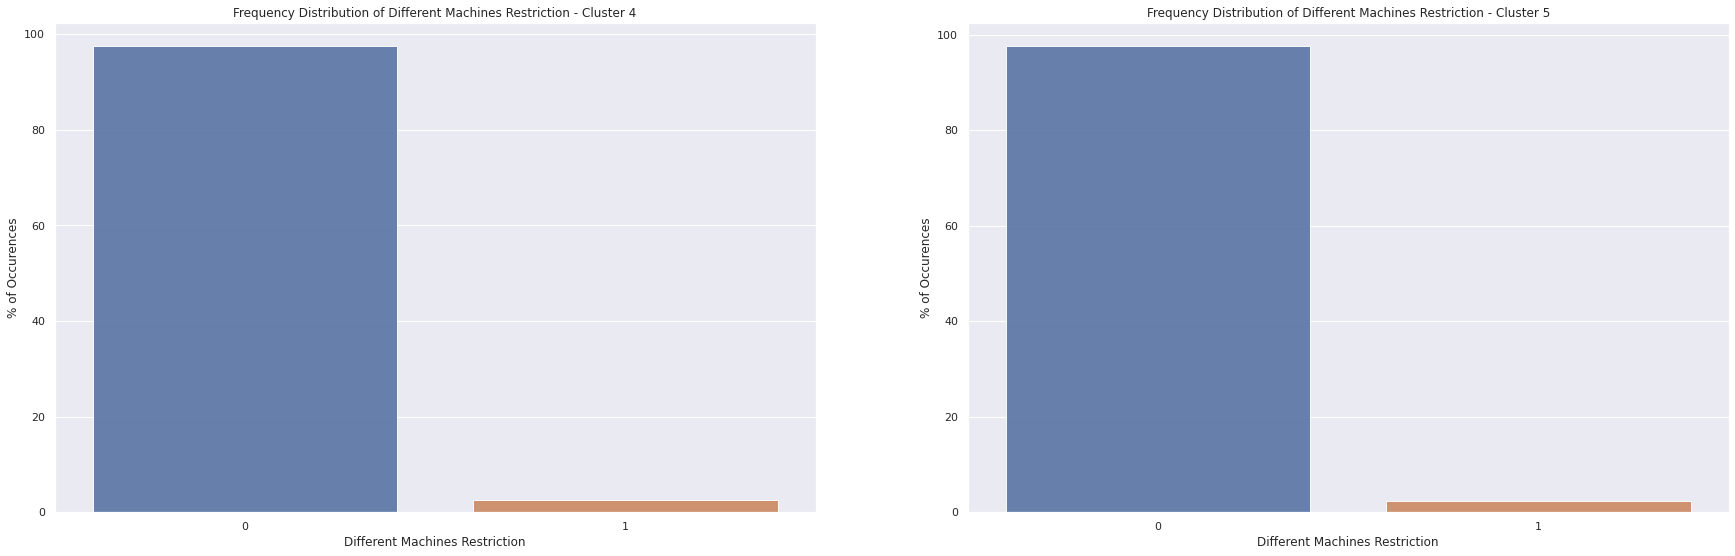

In [39]:
cluster_labels = cluster_labels_6
label = "different machines restriction"

for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in range(0,2):
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for disk request - quartiles

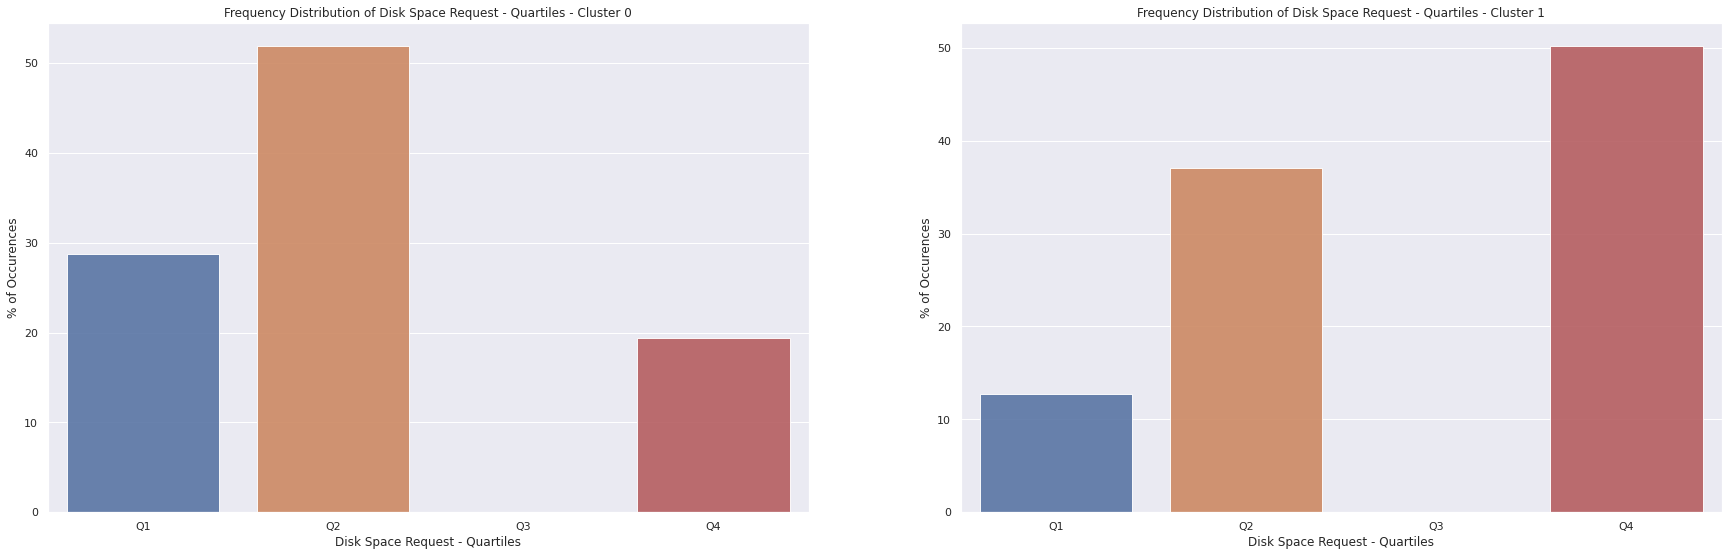

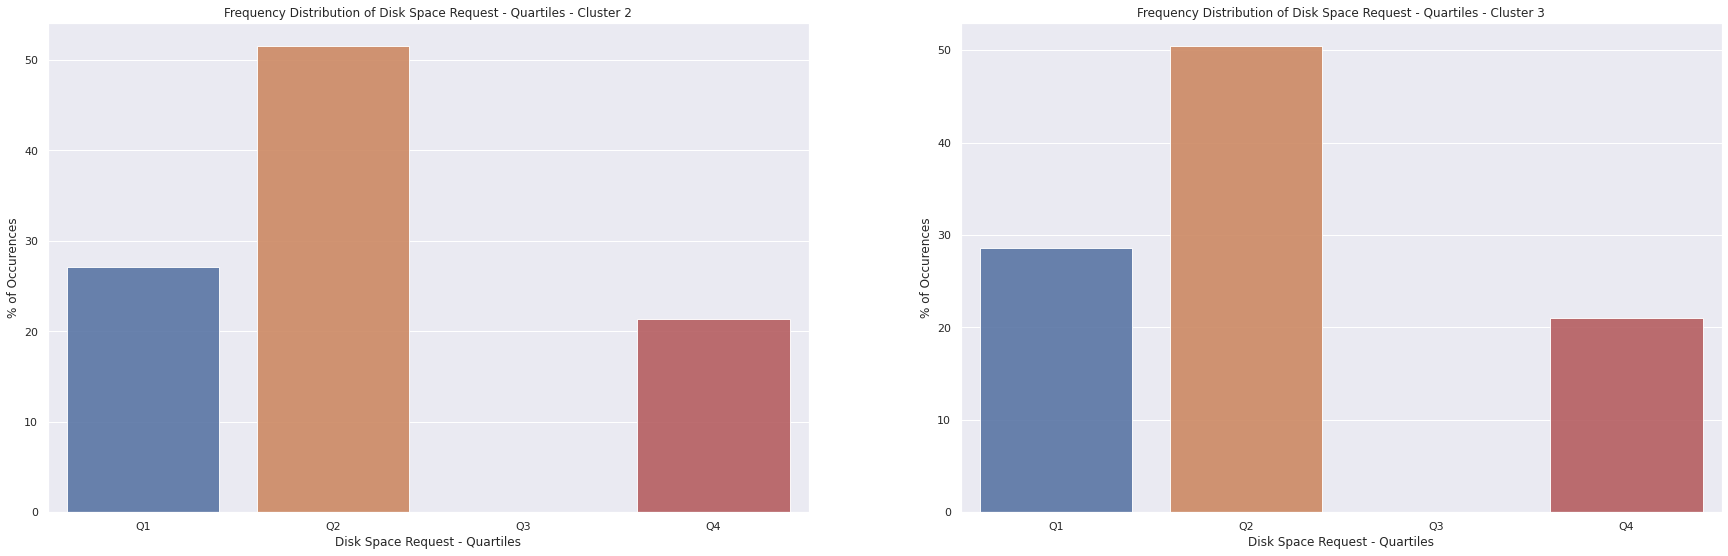

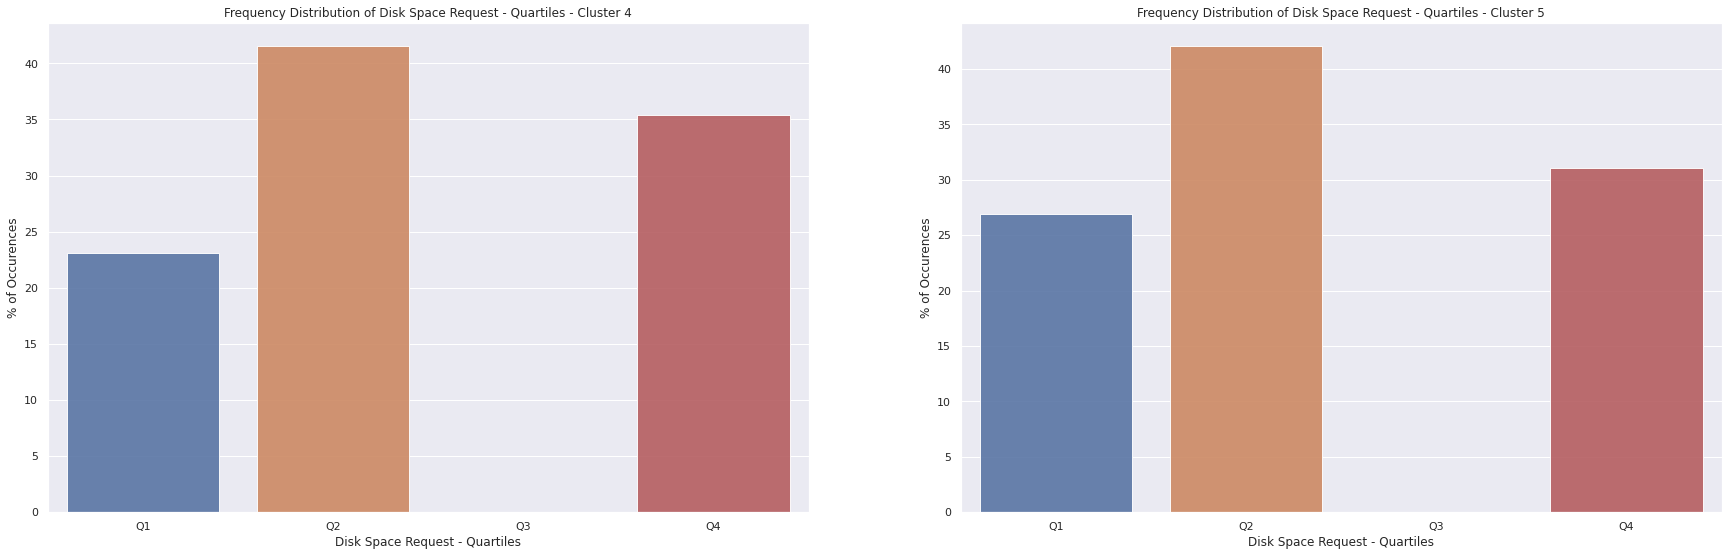

In [40]:
cluster_labels = cluster_labels_6
label = "disk space request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for memory request - quartiles

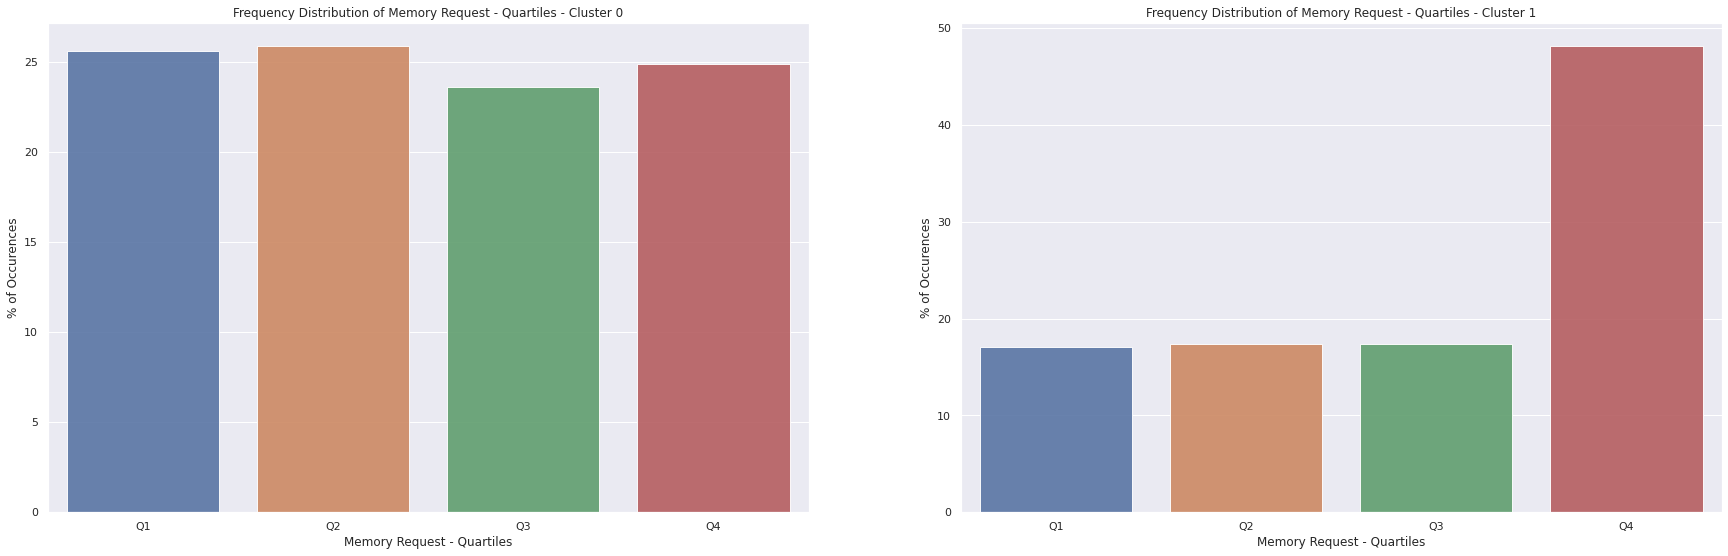

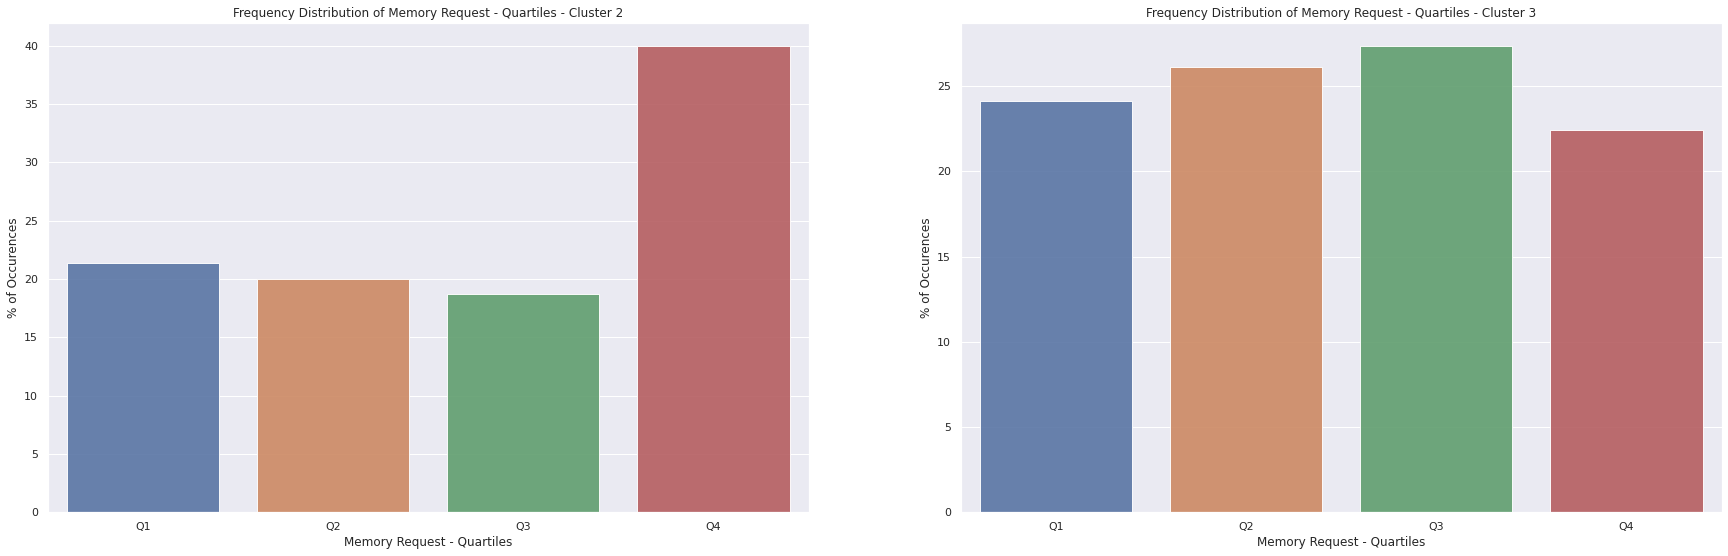

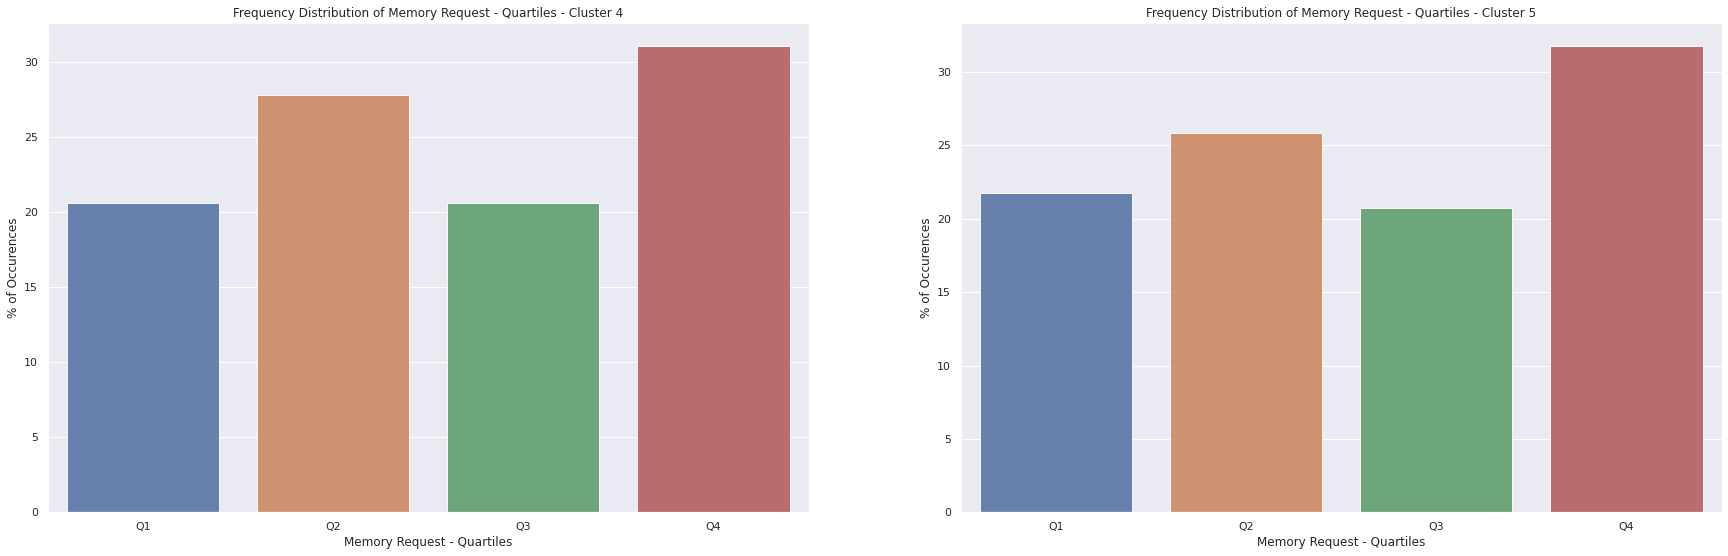

In [41]:
cluster_labels = cluster_labels_6
label = "memory request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for CPU request - quartiles

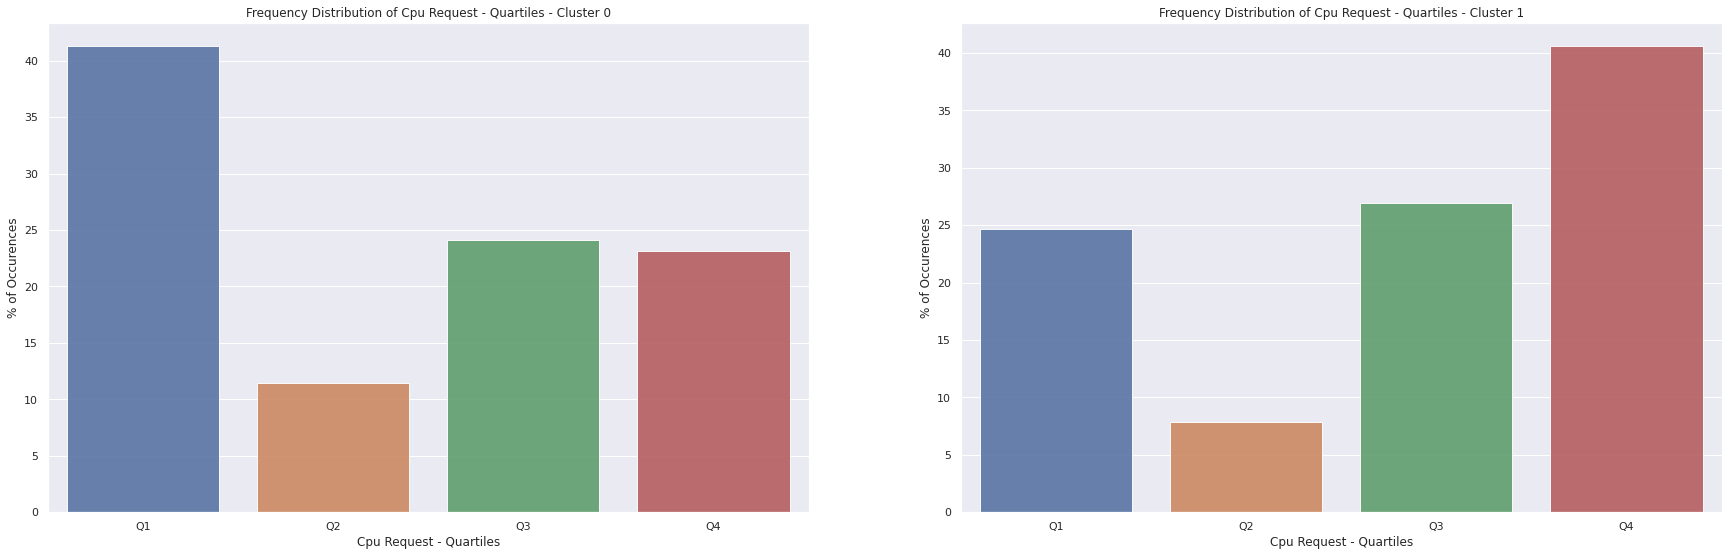

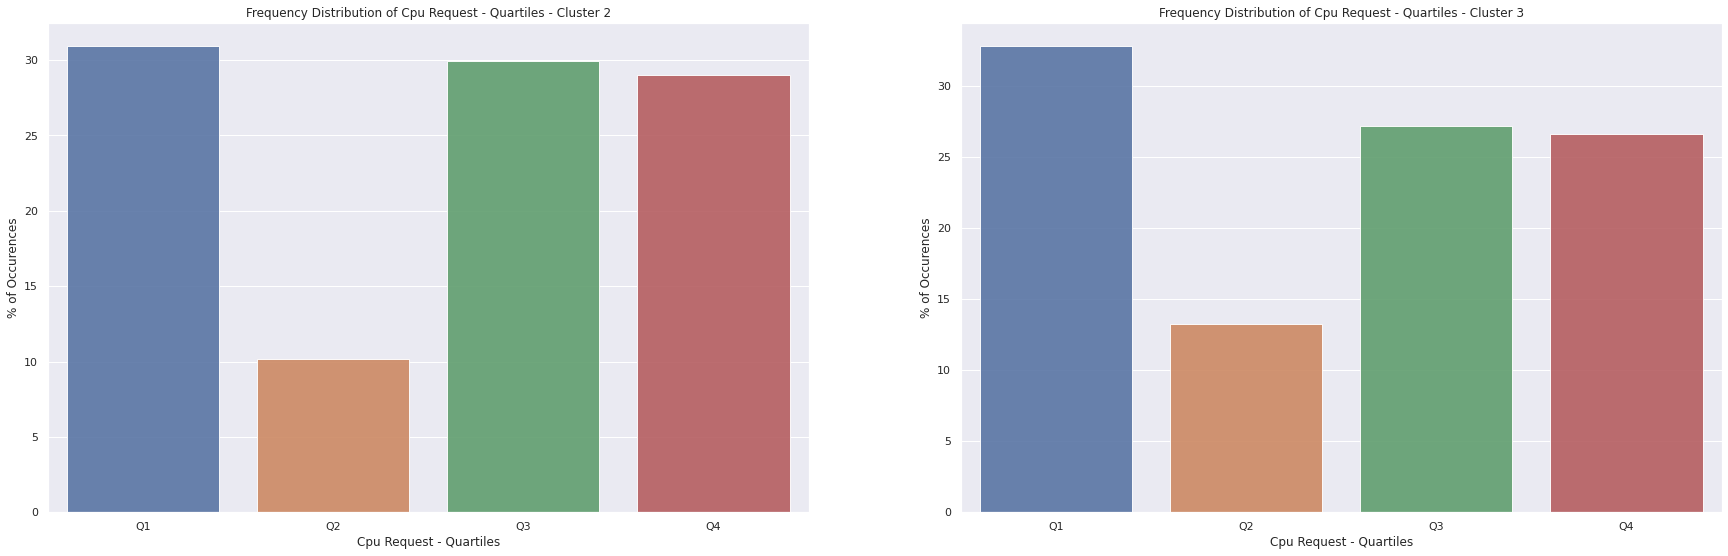

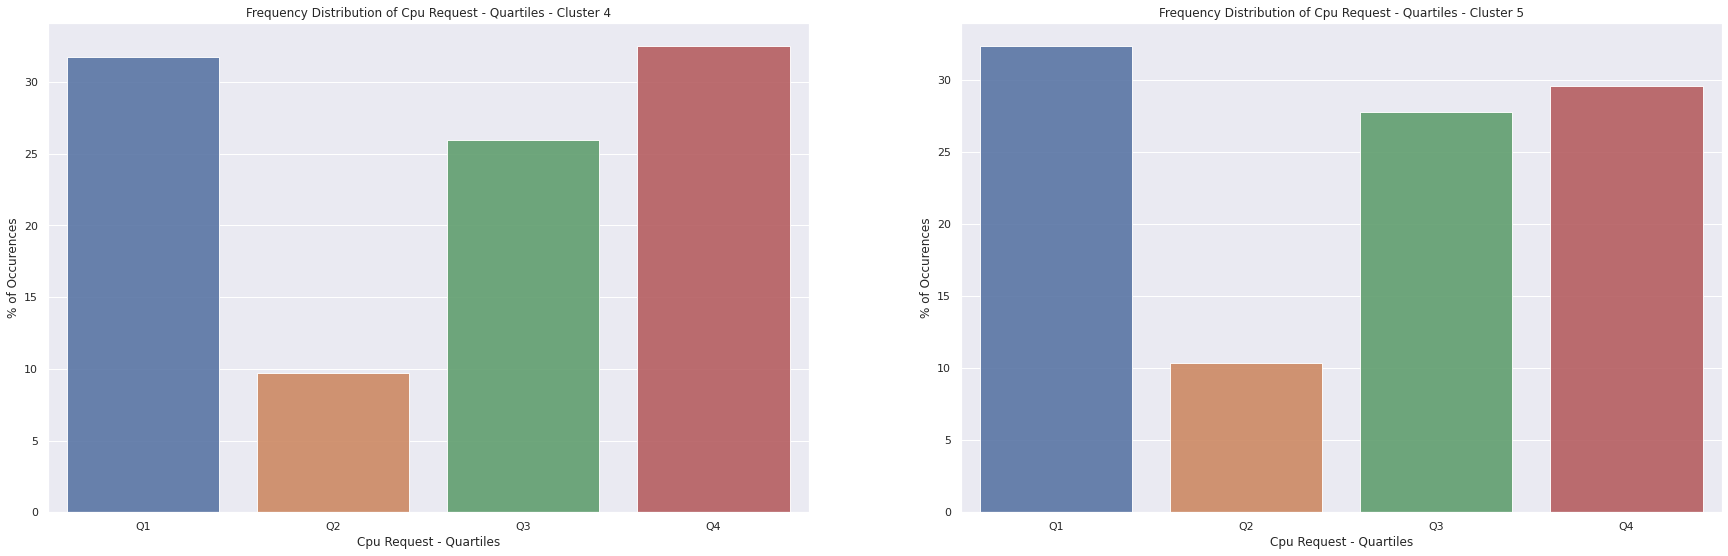

In [42]:
cluster_labels = cluster_labels_6
label = "CPU request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 6, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

### K-Means = 10

#### Frequency distribution of scheduling class

[1 1 1 ... 0 0 0]


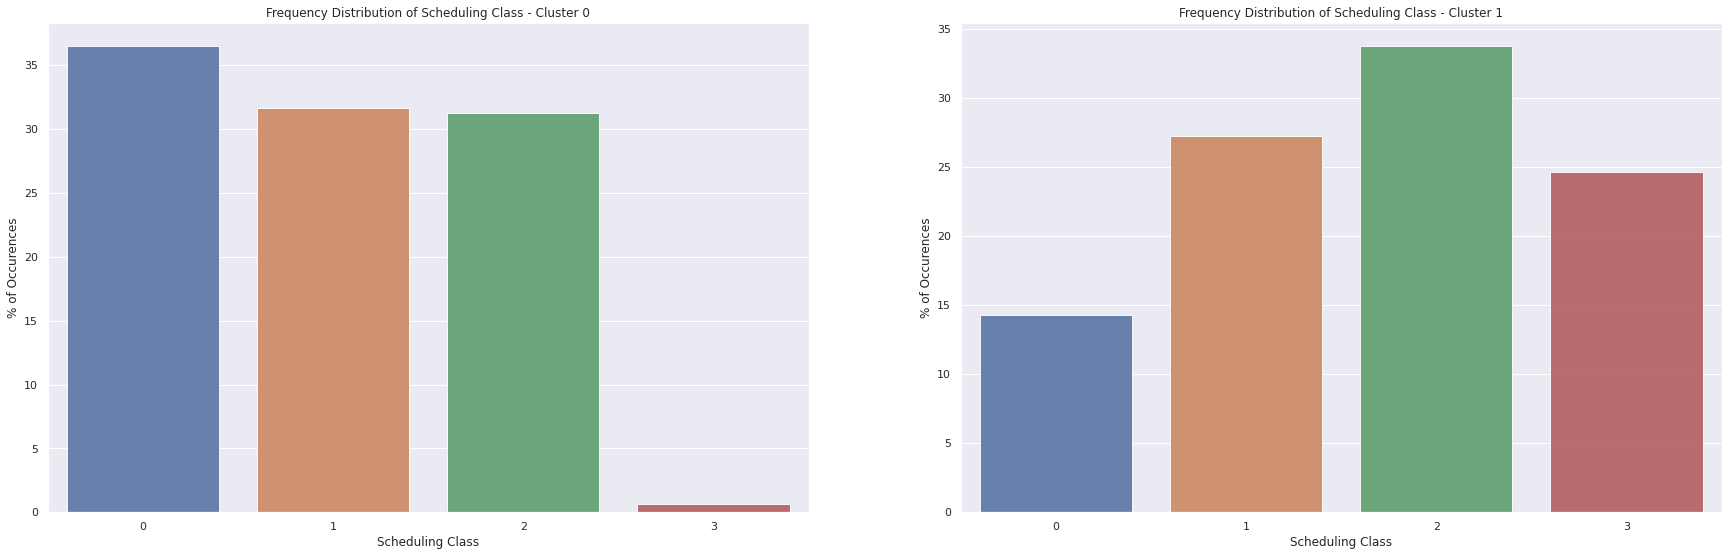

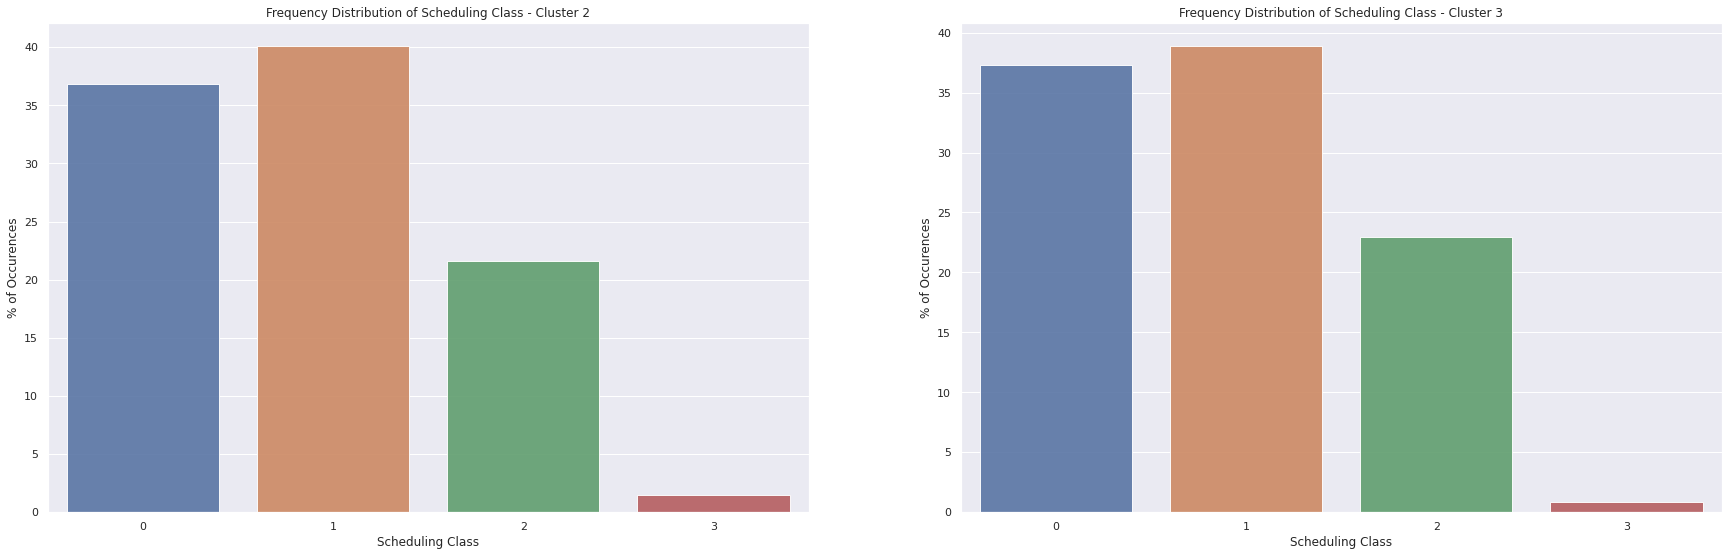

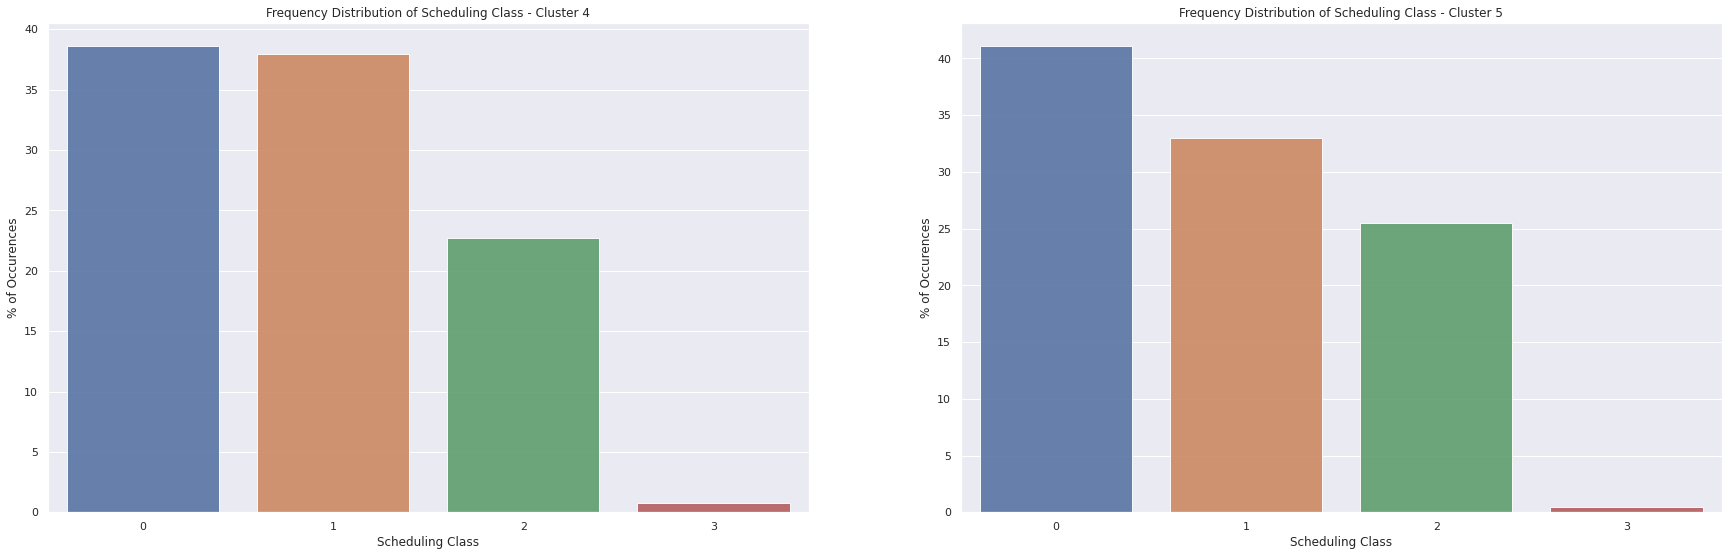

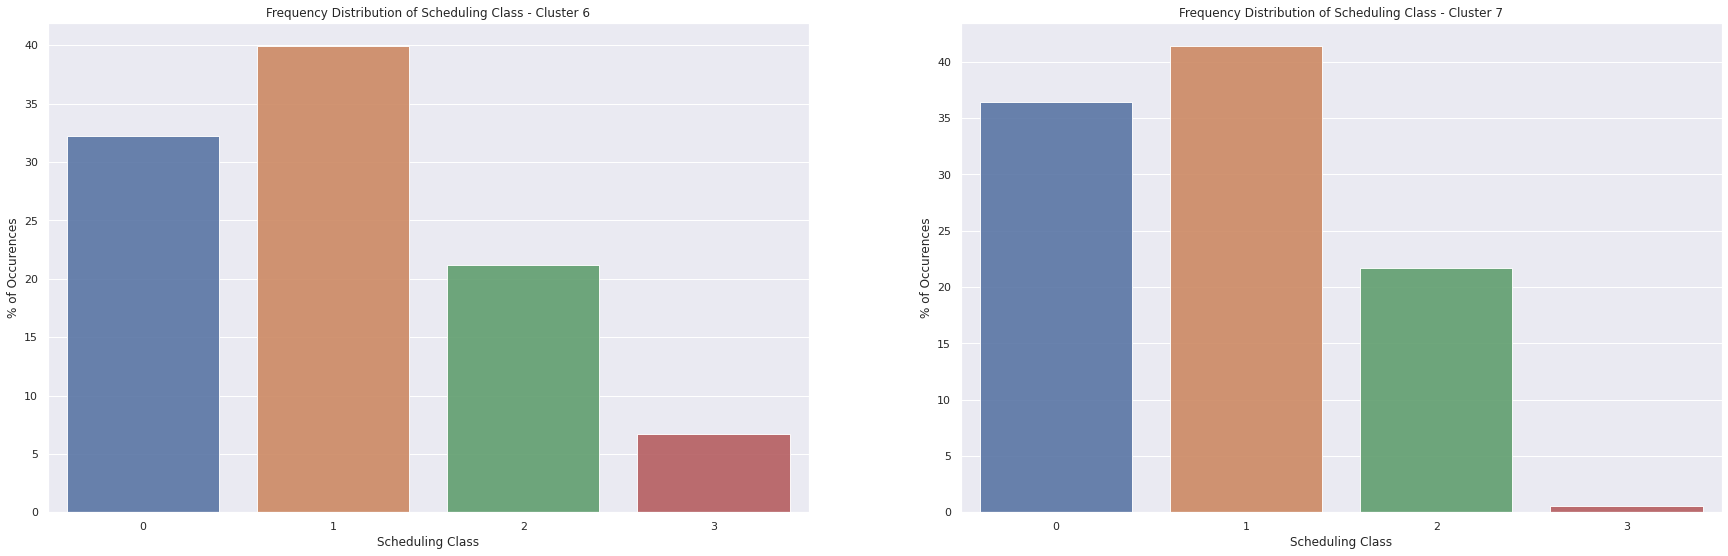

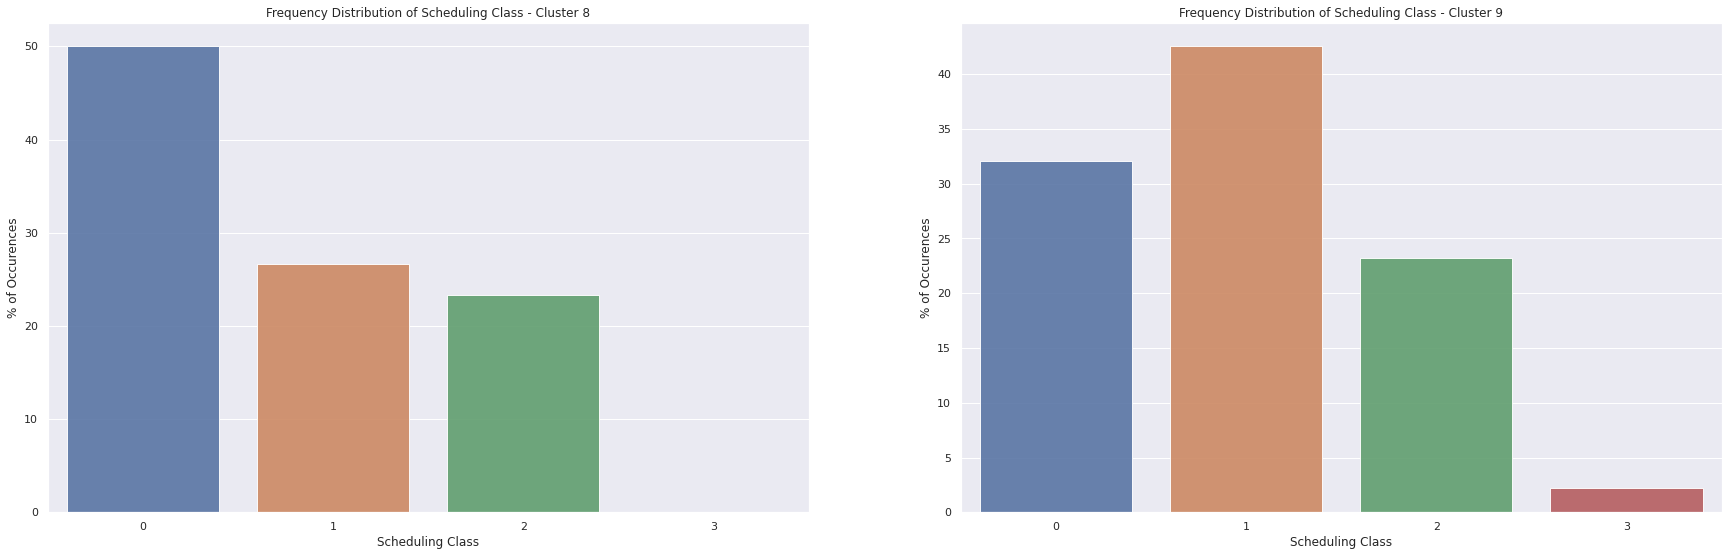

In [43]:
cluster_labels = cluster_labels_10
print(cluster_labels)
label = "scheduling class"

for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for sch_class in range(0,4):
            if sch_class not in column_count.index:
                s = pd.Series([0], index=[sch_class])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)


#### Frequency distribution of priority

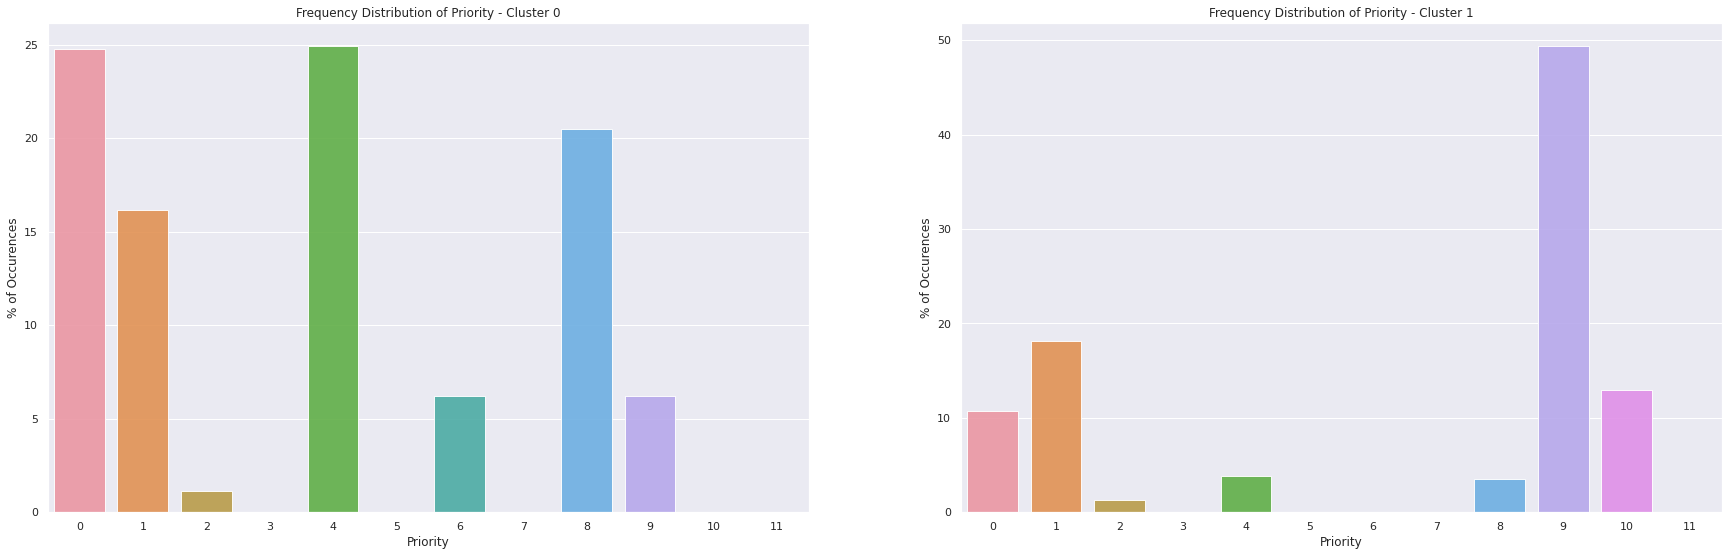

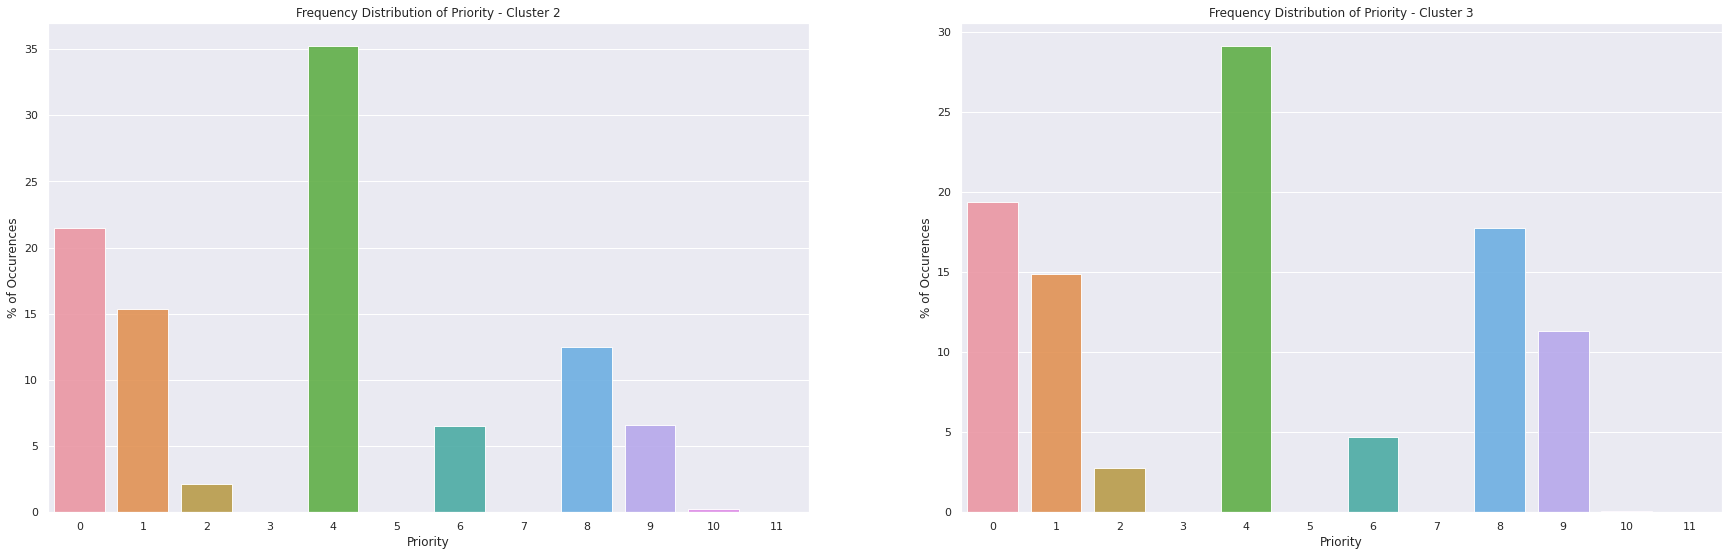

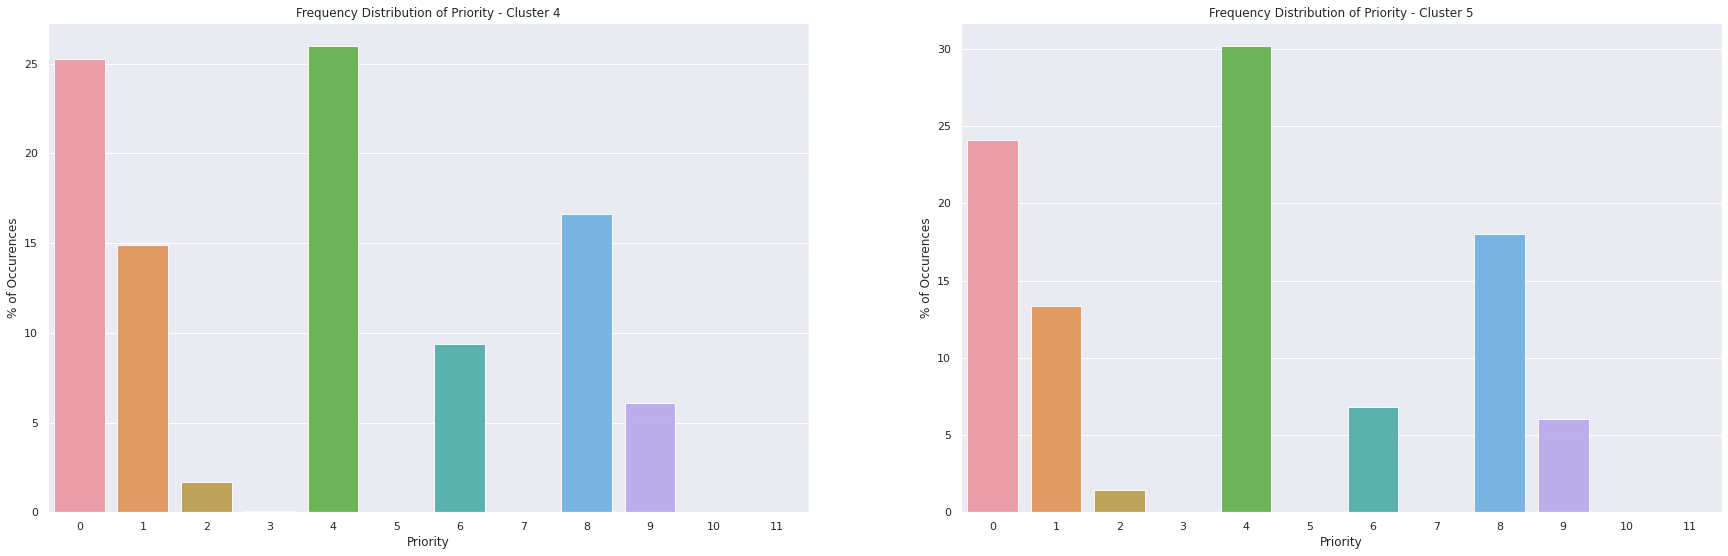

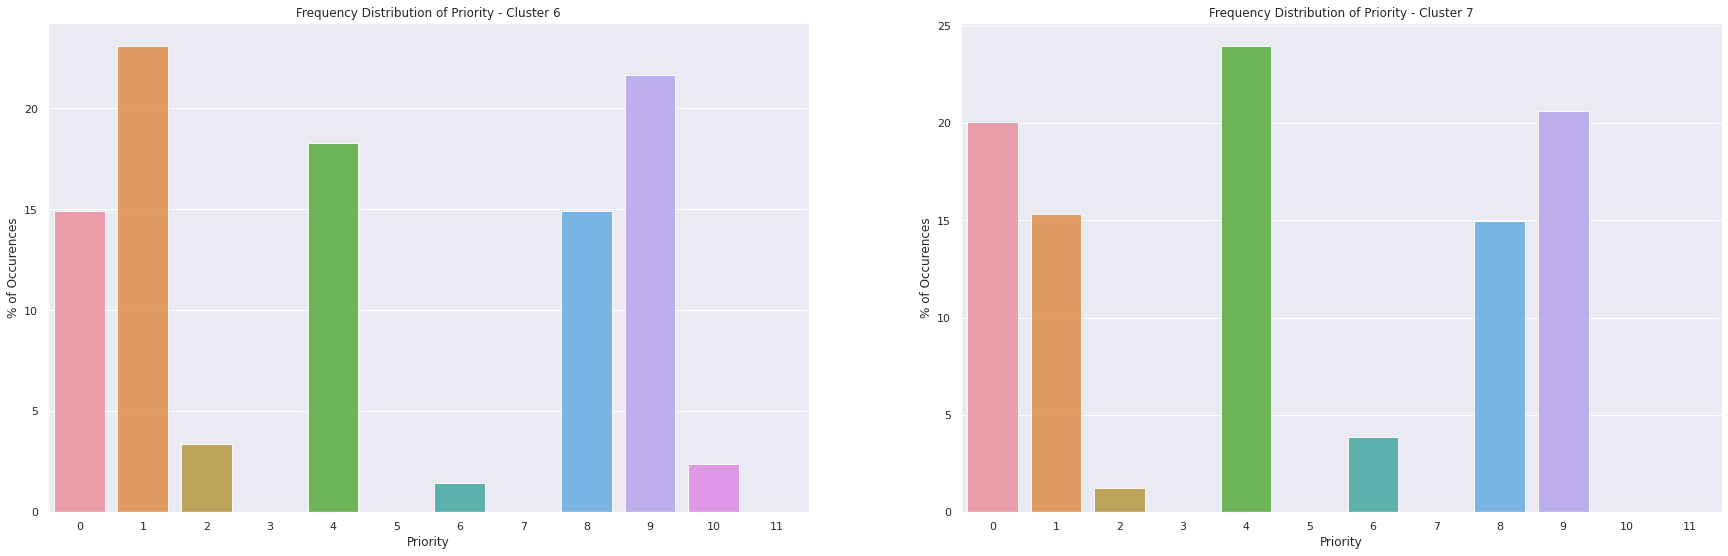

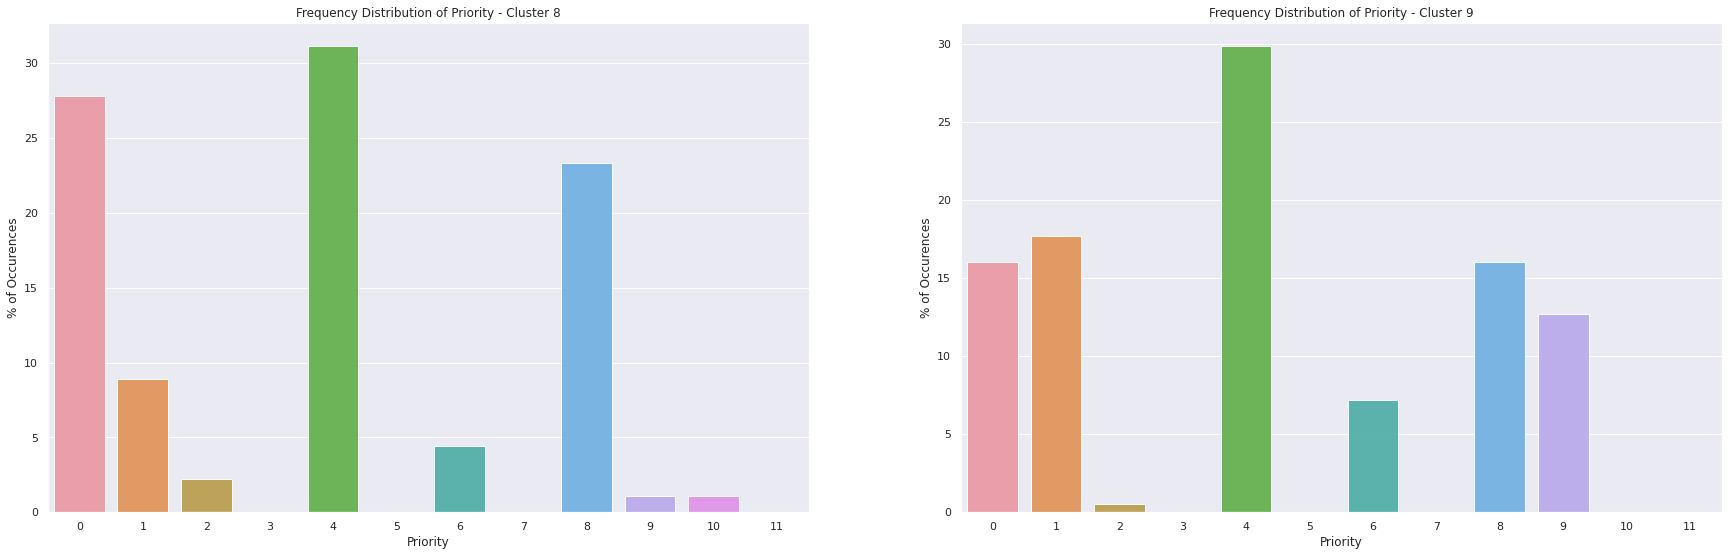

In [44]:
cluster_labels = cluster_labels_10
label = "priority"

for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in range(0,12):
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)


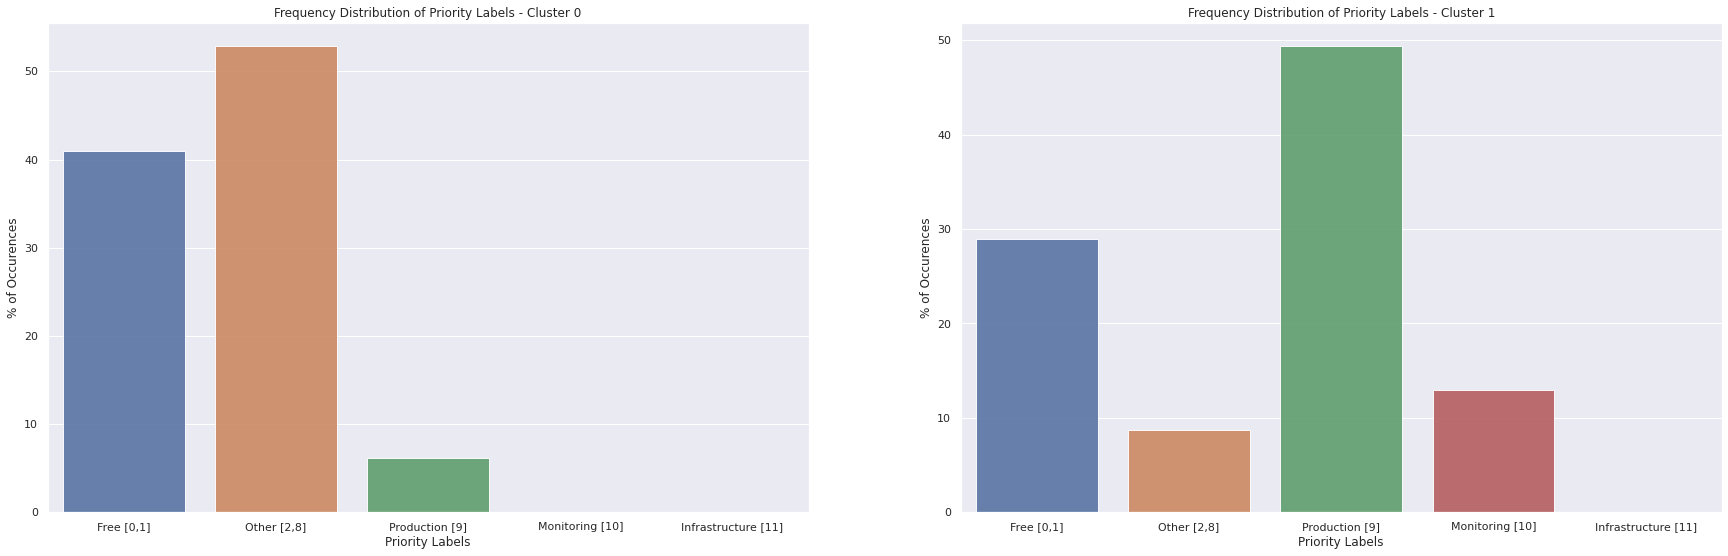

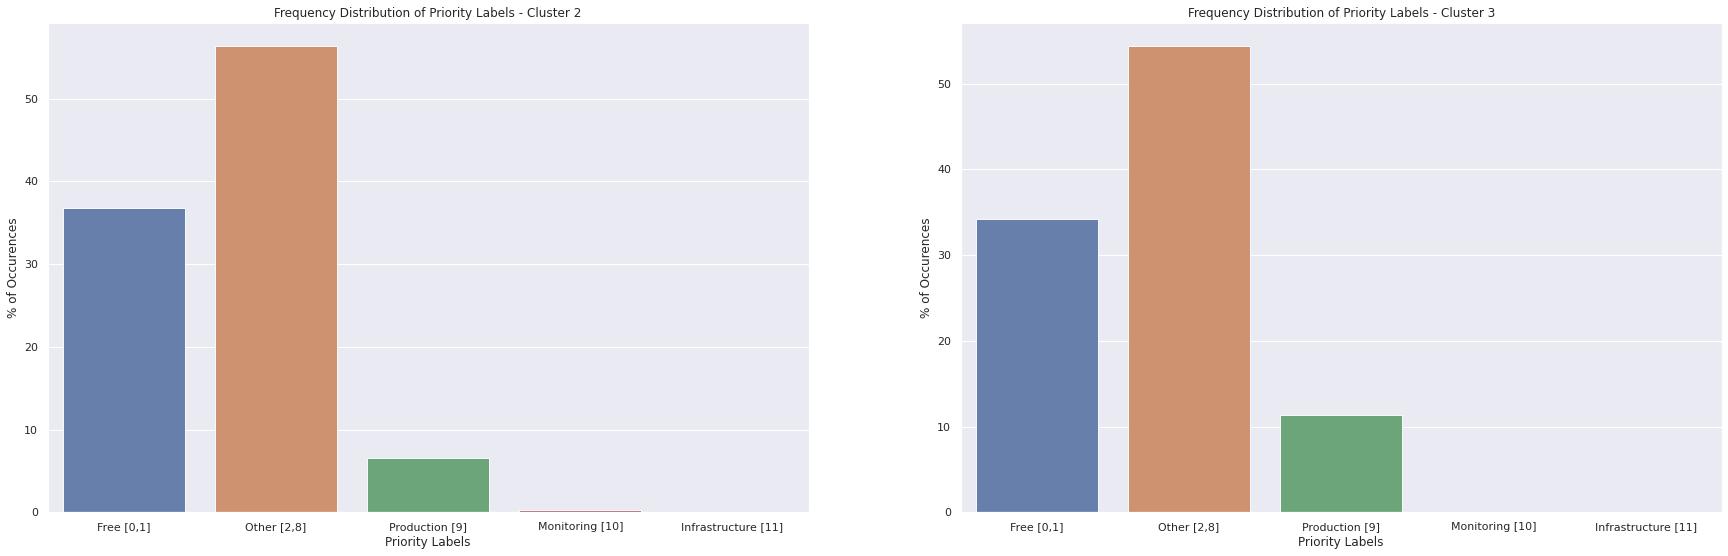

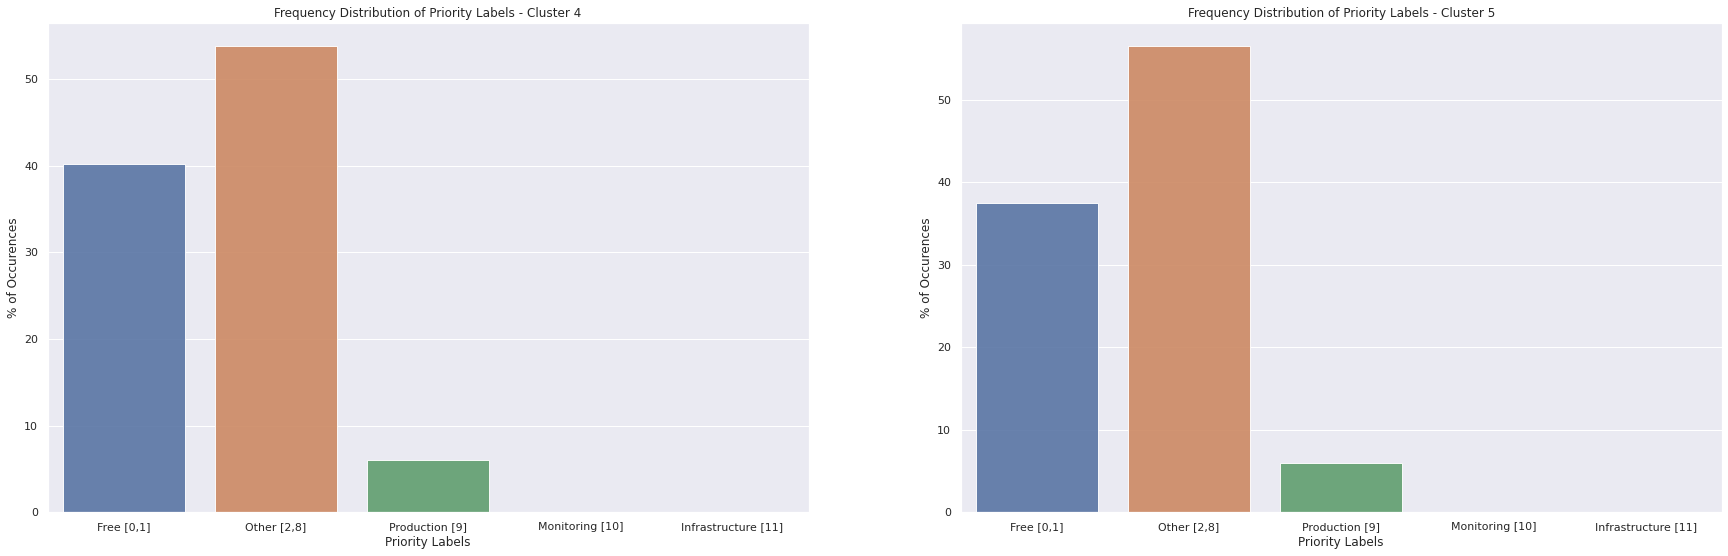

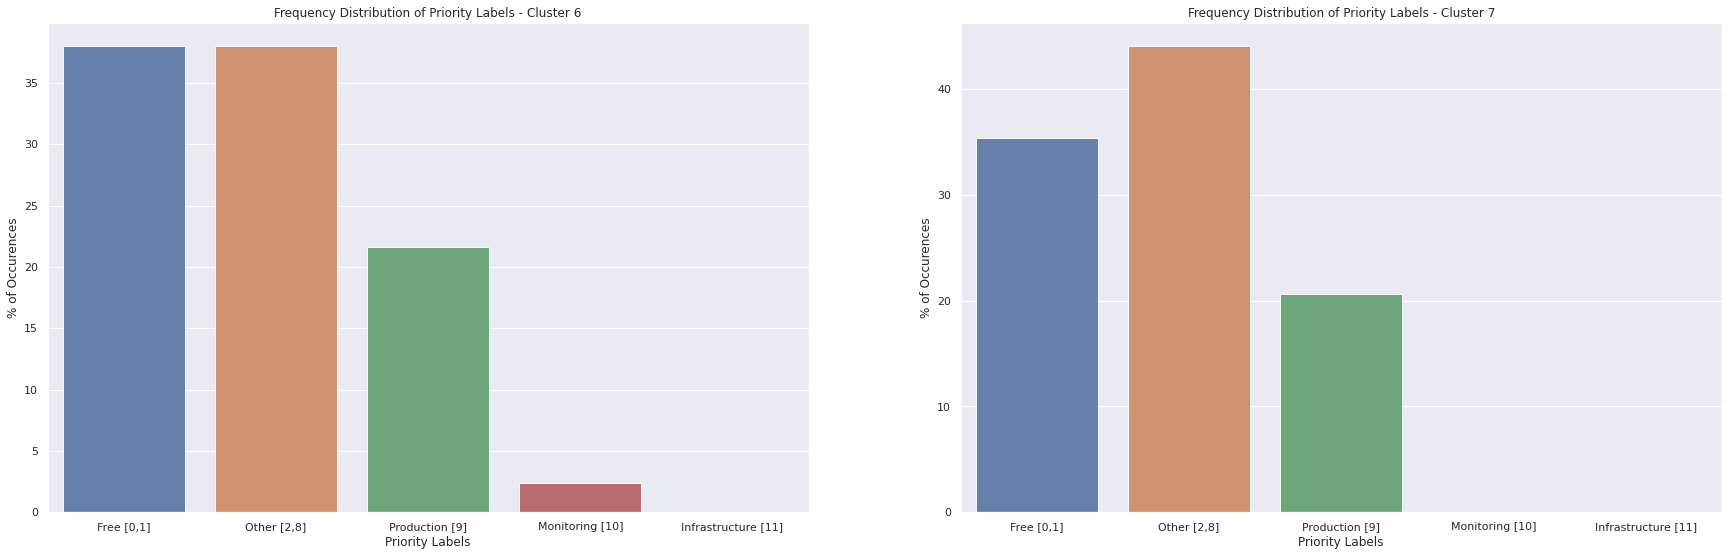

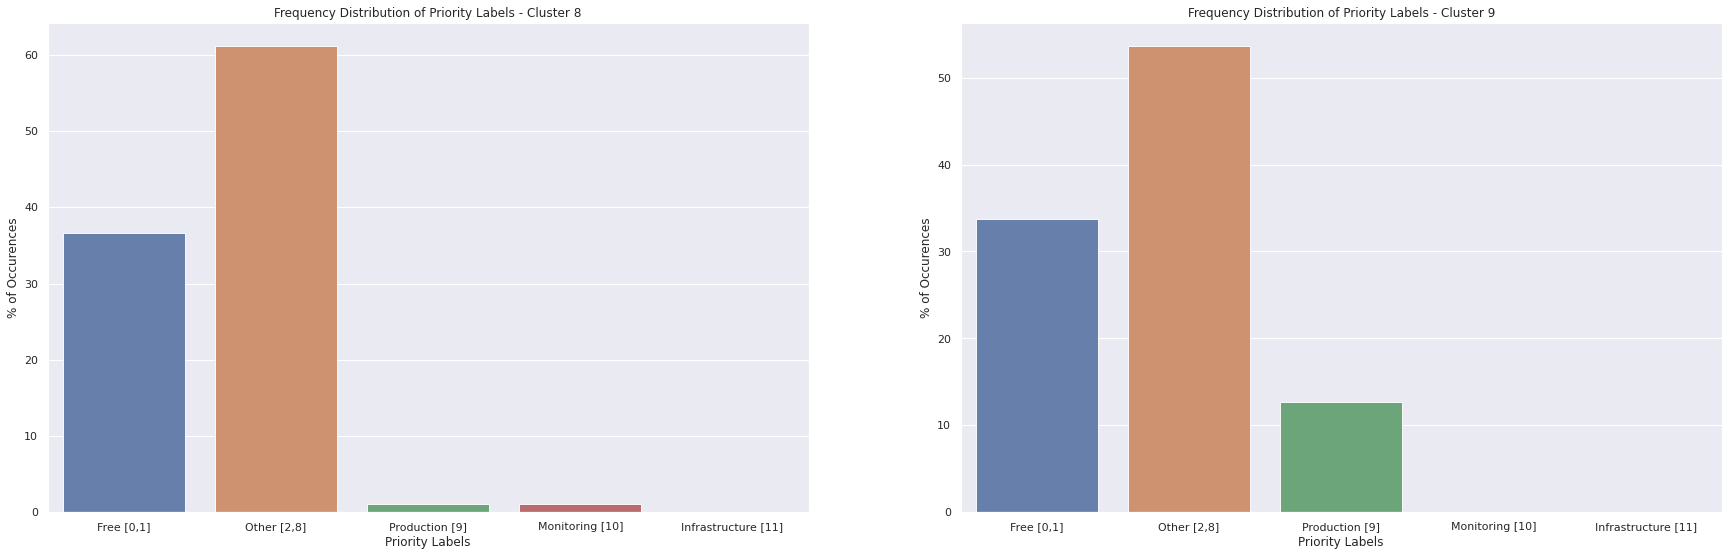

In [45]:
cluster_labels = cluster_labels_10
label = "priority labels"
priority_labels = ["Free [0,1]", "Other [2,8]", "Production [9]", "Monitoring [10]", "Infrastructure [11]"]

for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts()
        for pr_lab in priority_labels:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(priority_labels)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Freqency distribution for different machines restriction

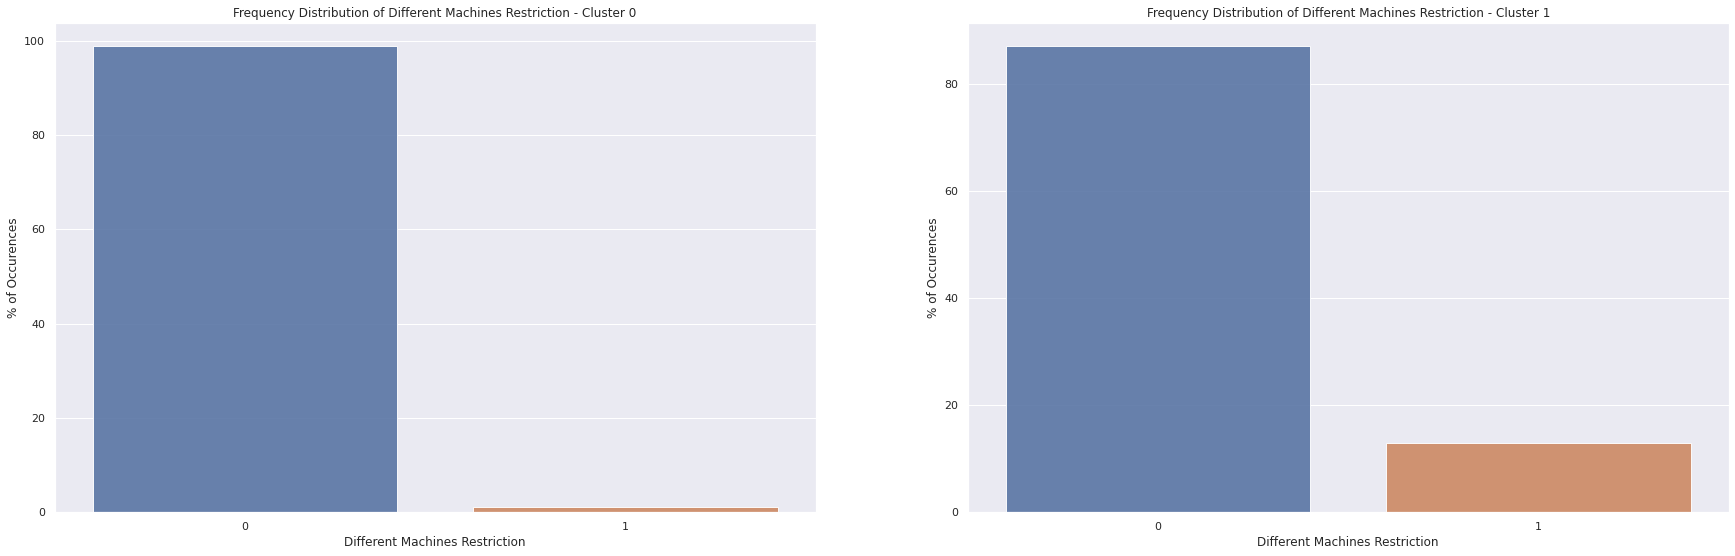

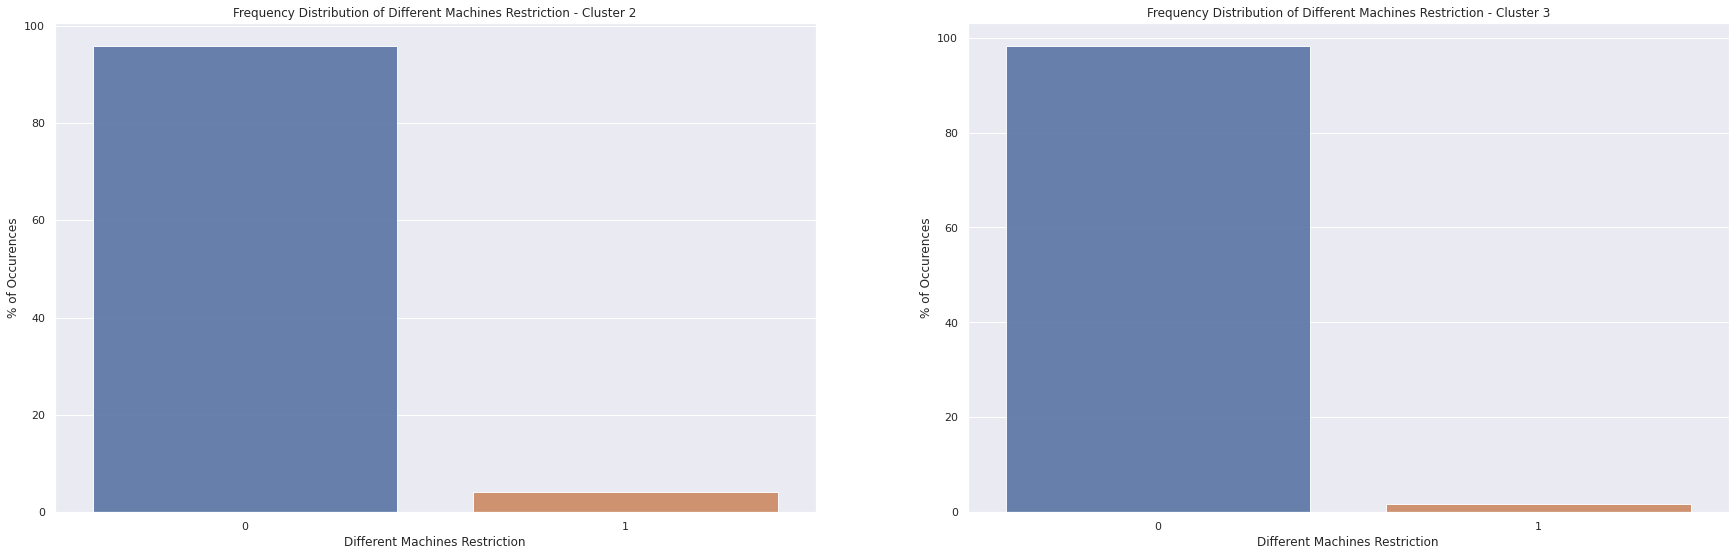

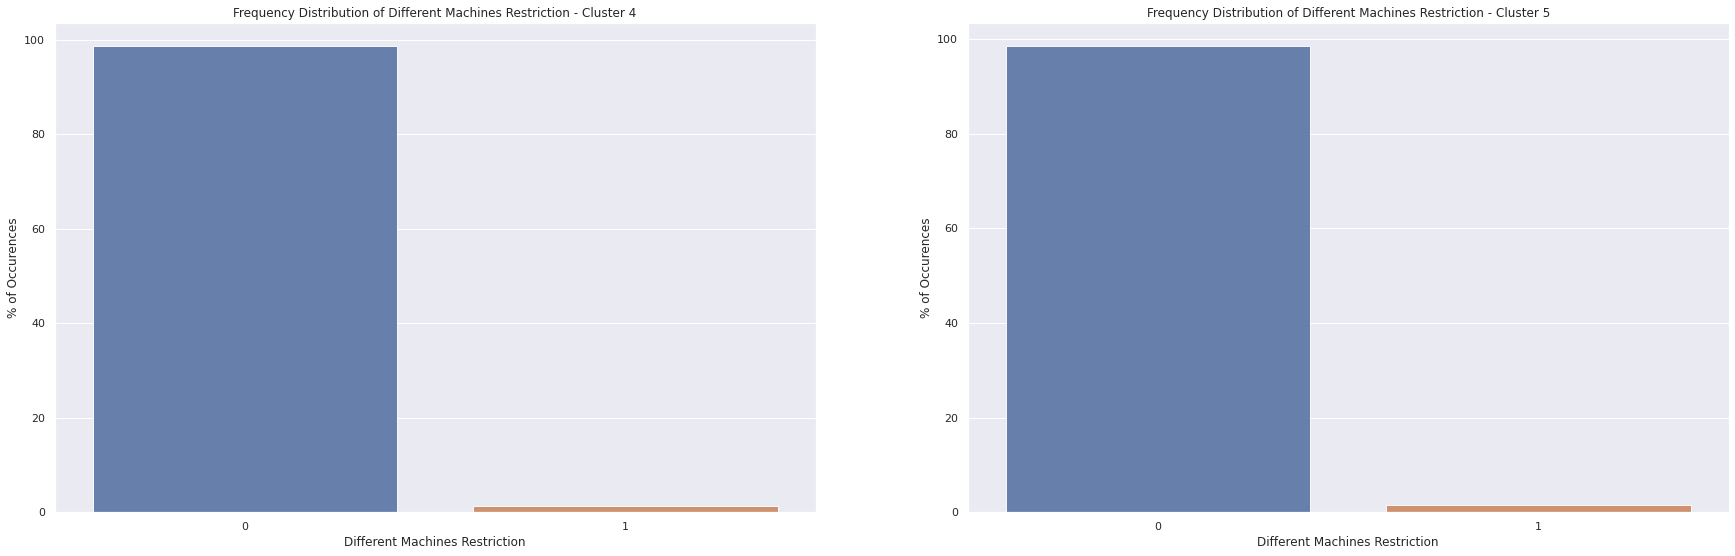

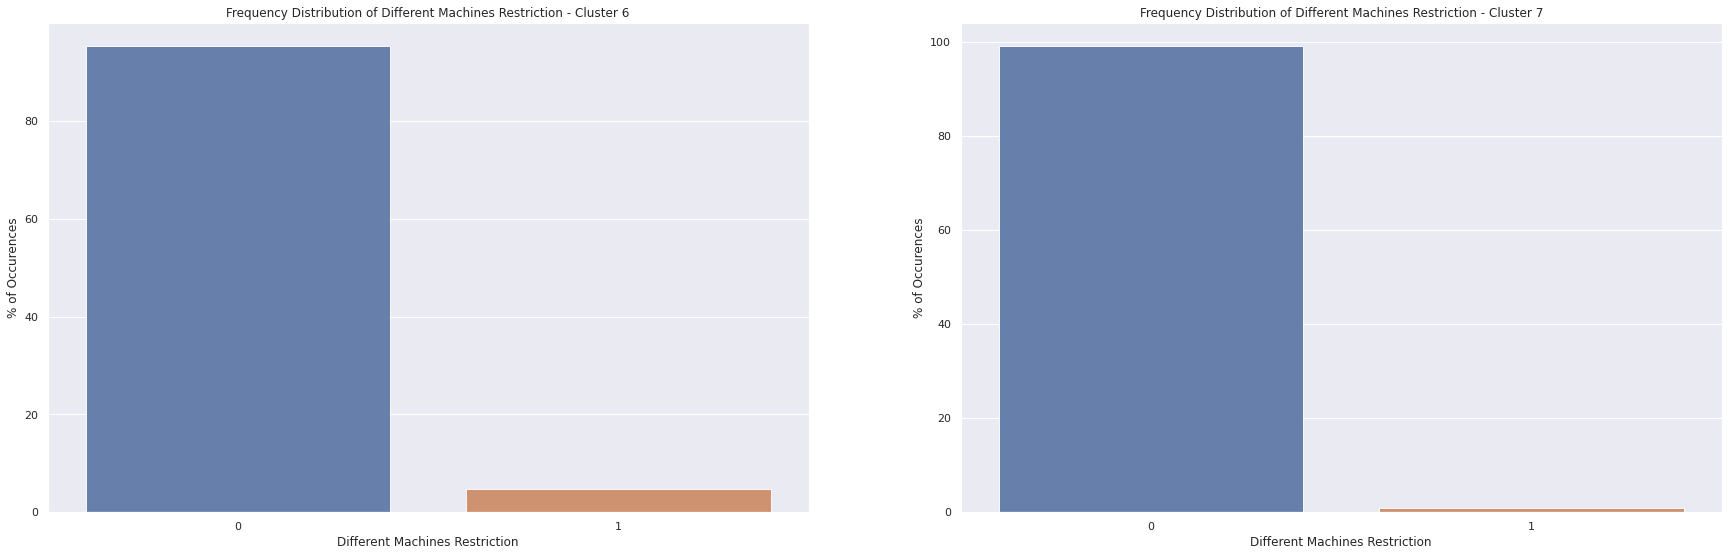

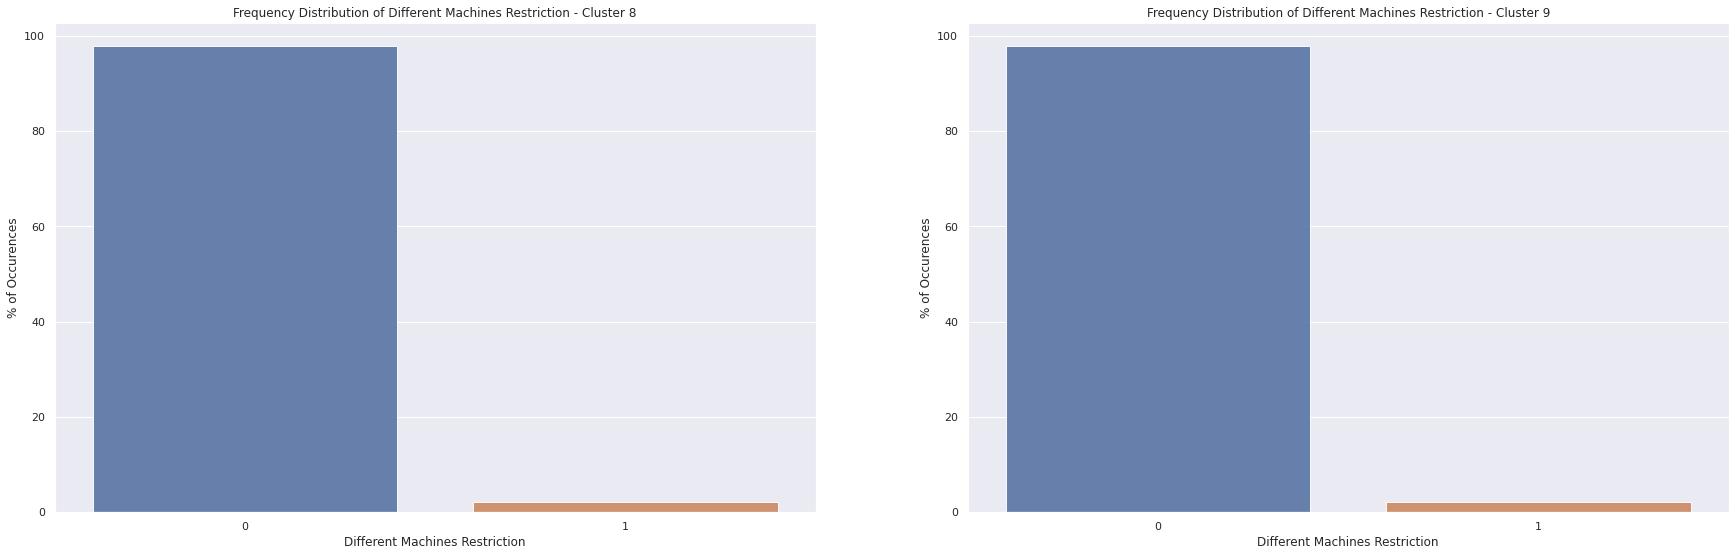

In [46]:
cluster_labels = cluster_labels_10
label = "different machines restriction"

for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in range(0,2):
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for disk request - quartiles

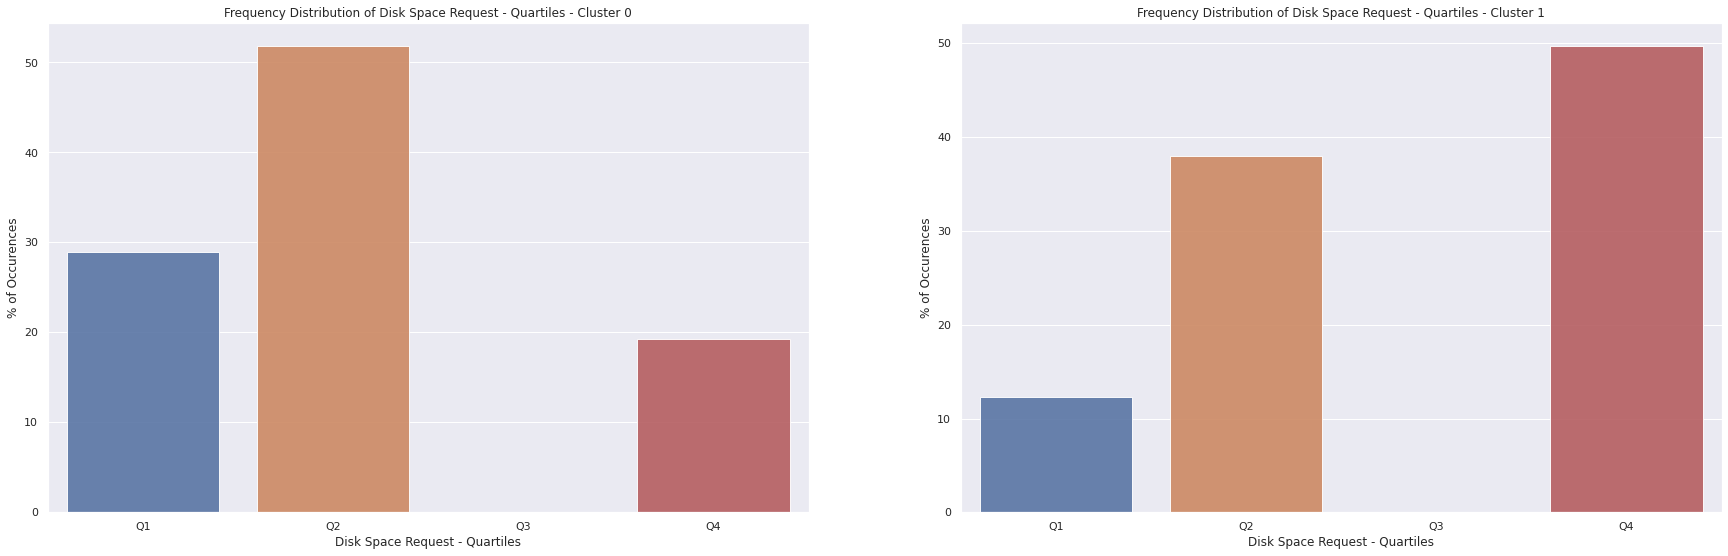

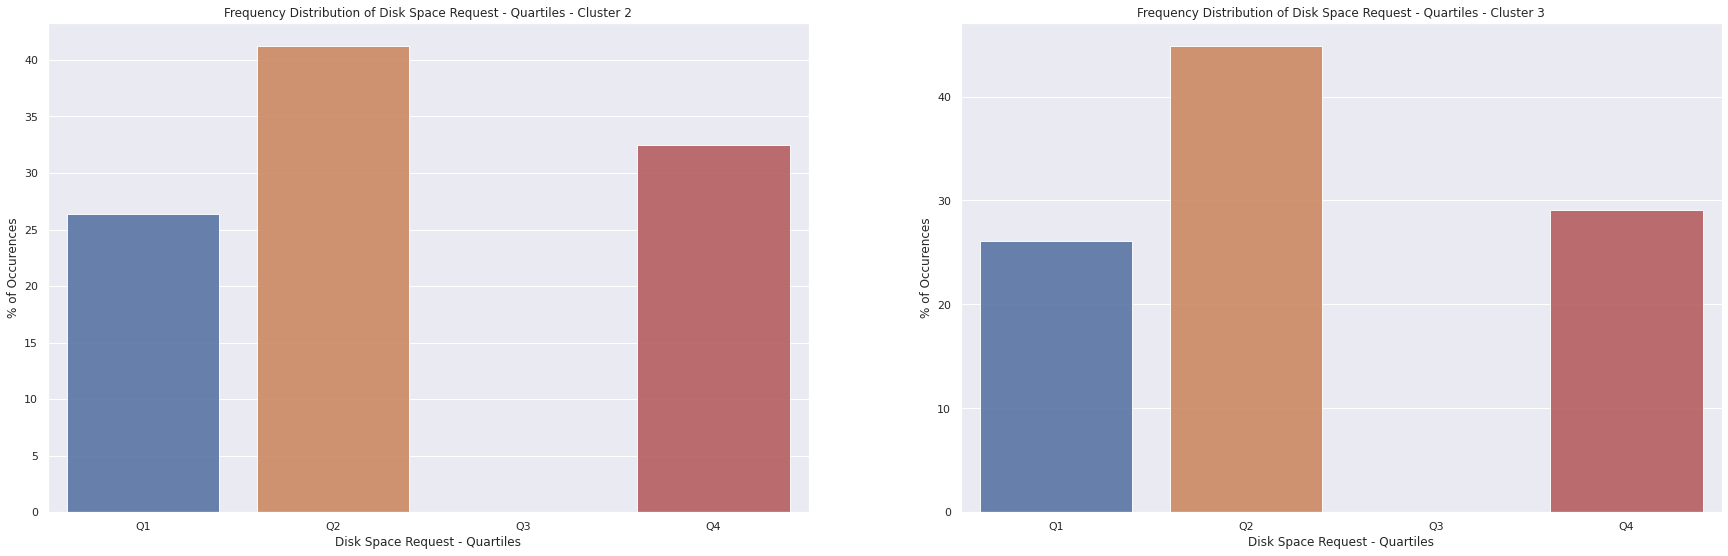

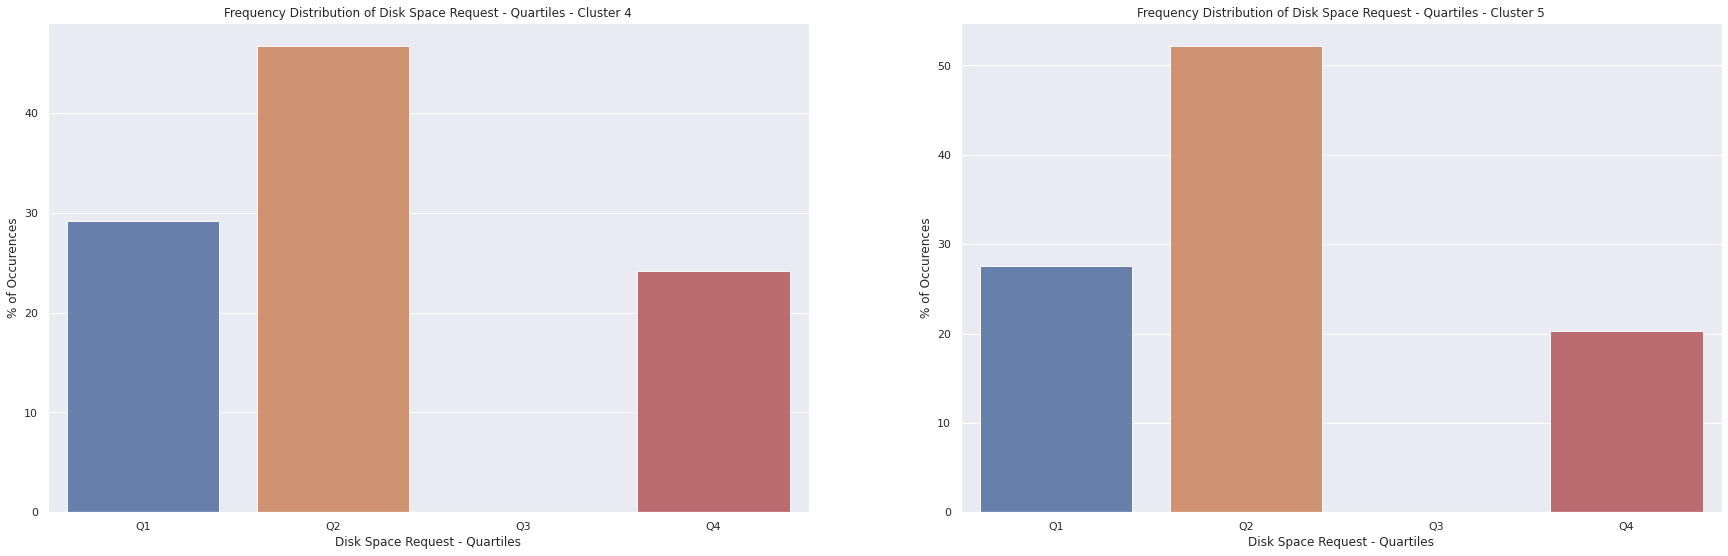

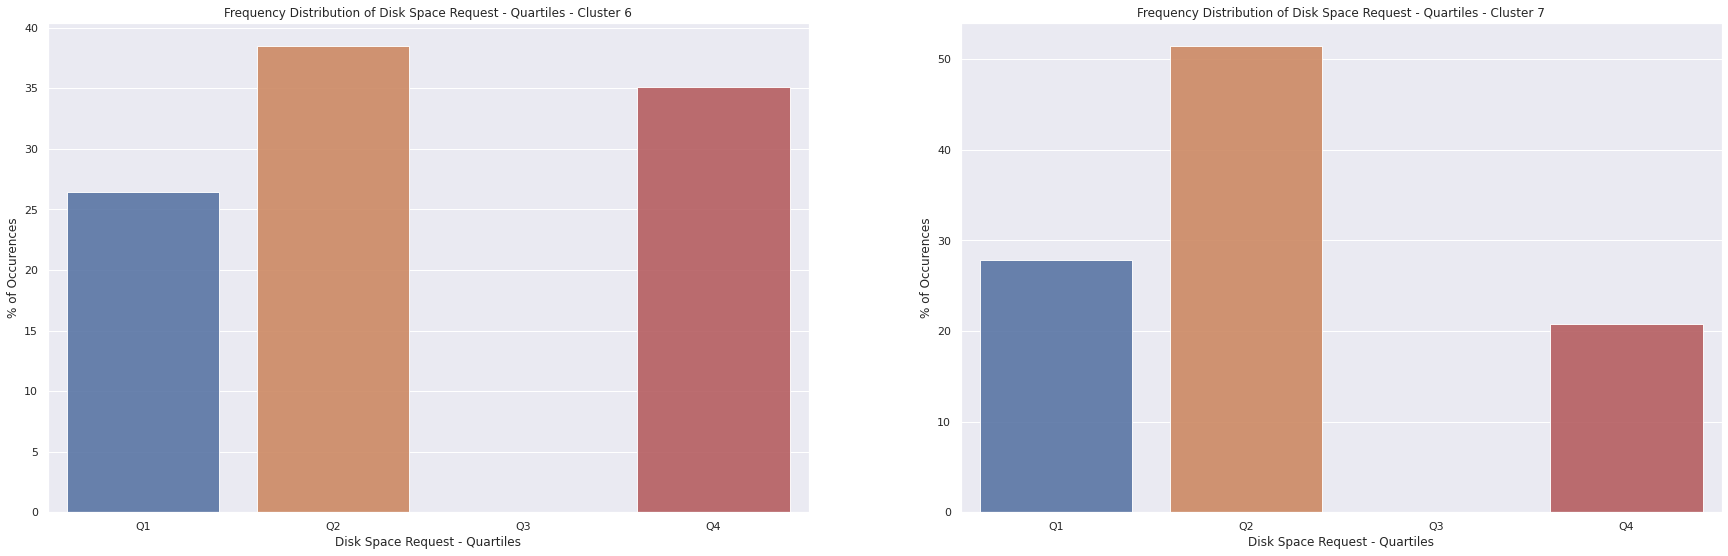

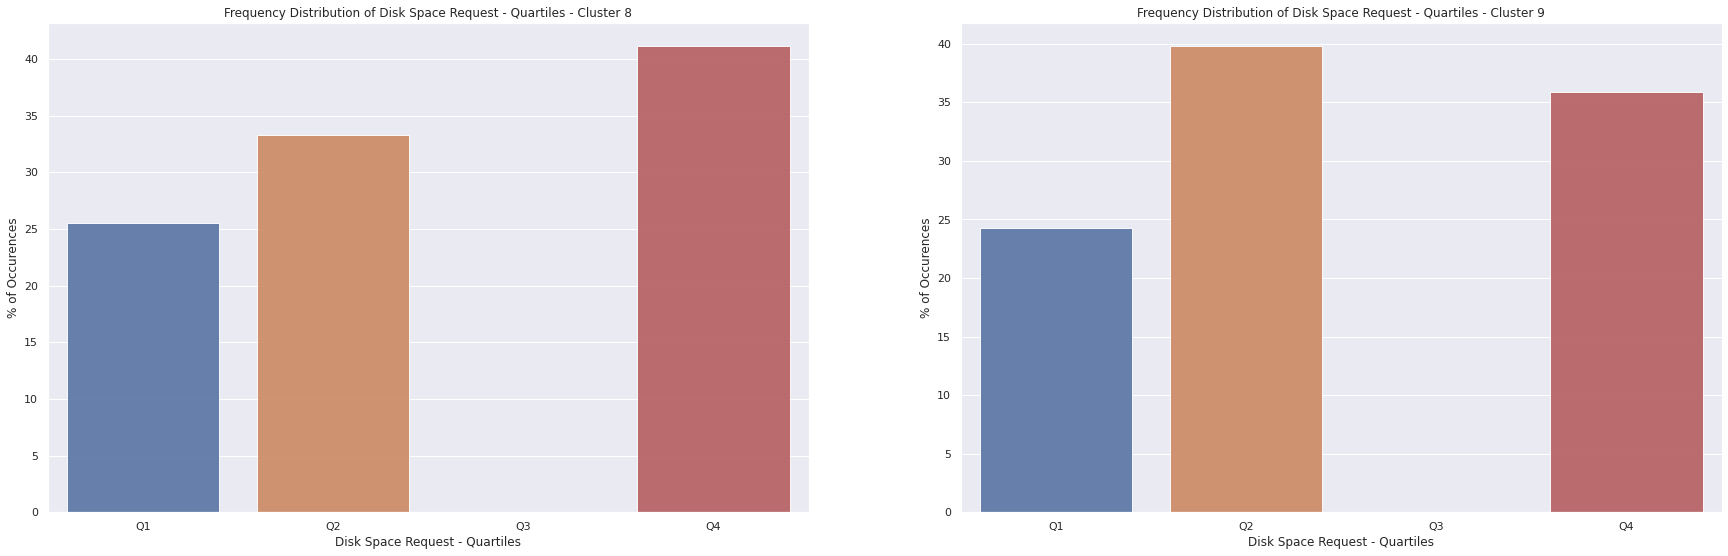

In [47]:
cluster_labels = cluster_labels_10
label = "disk space request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for memory request - quartiles

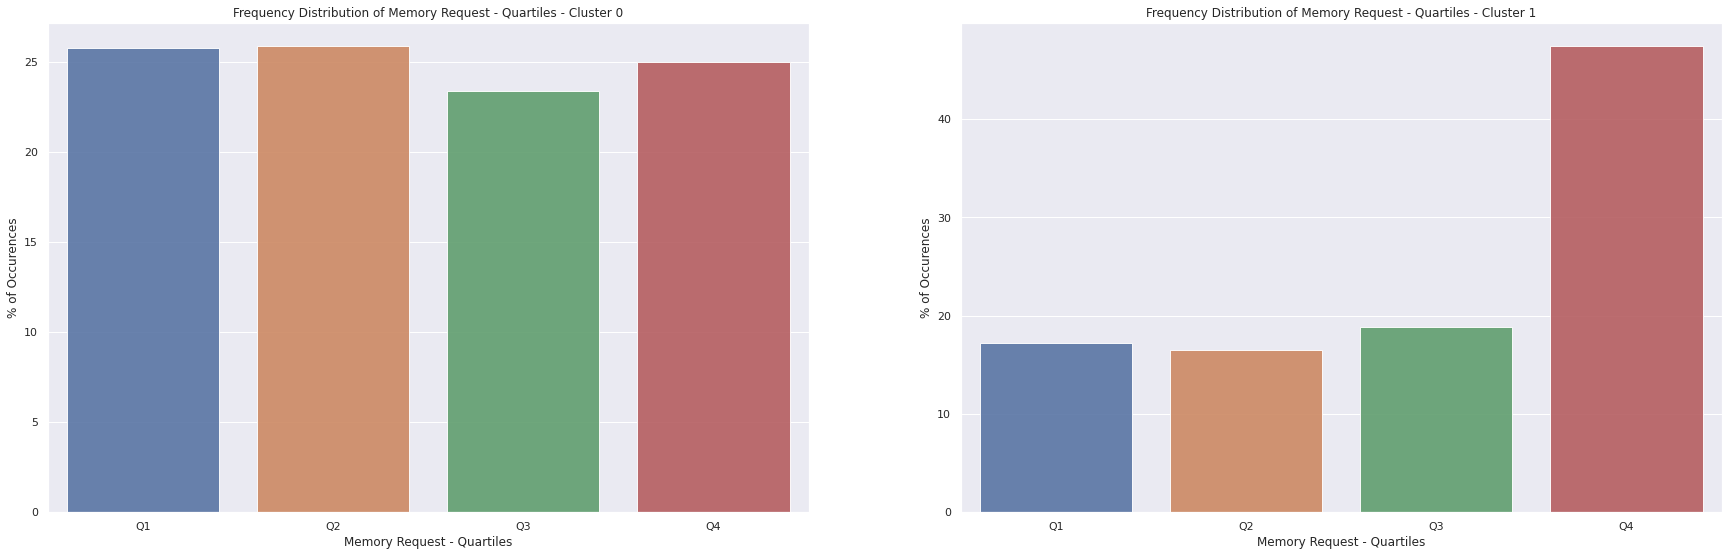

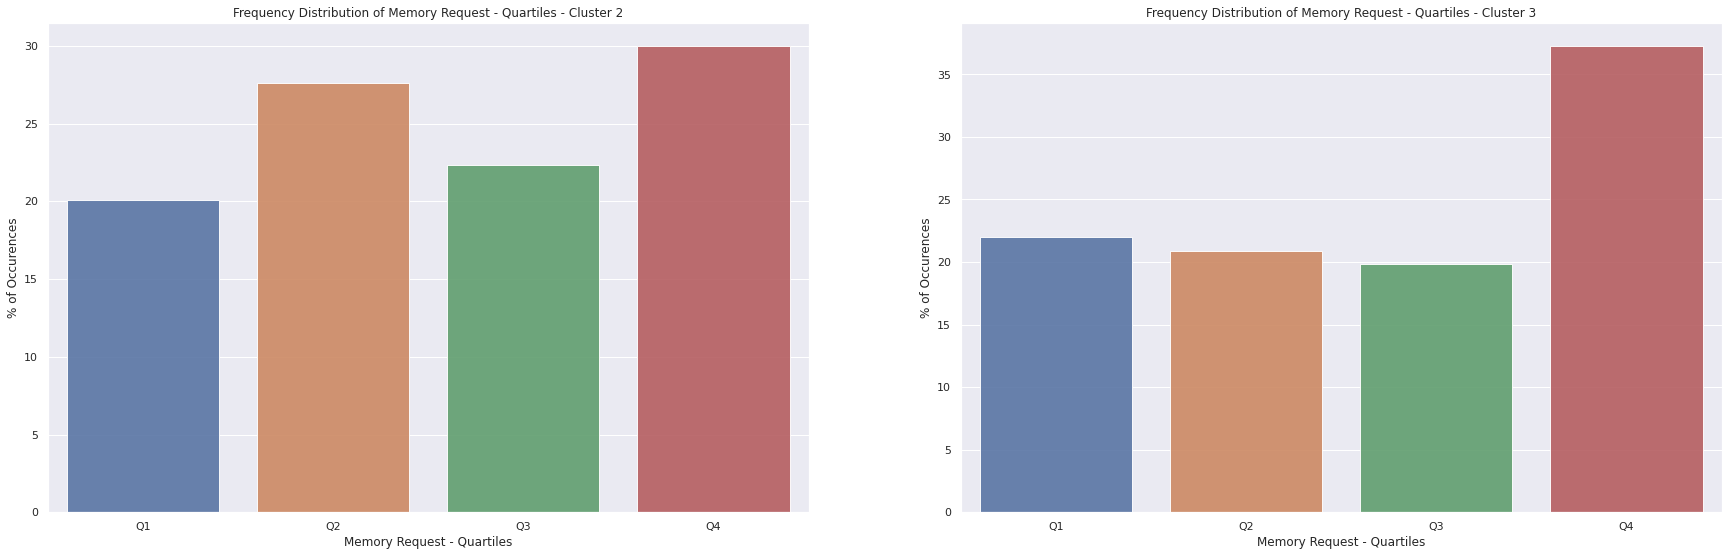

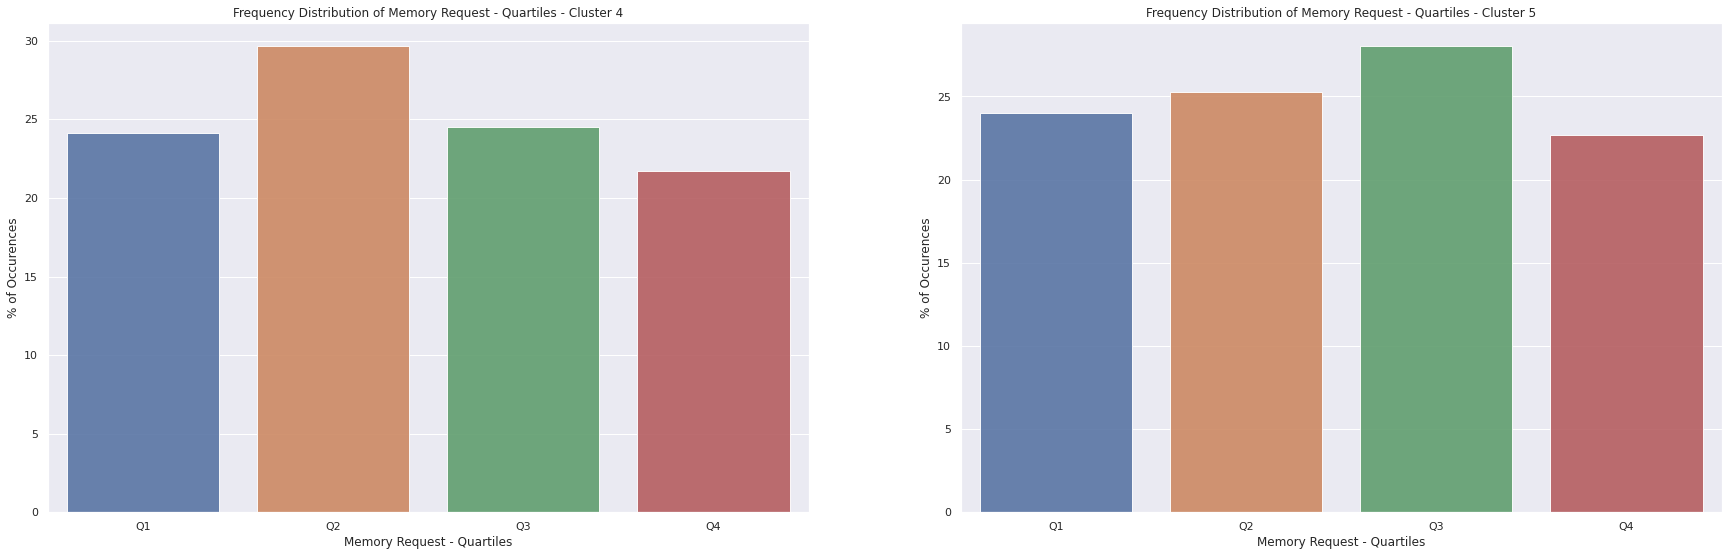

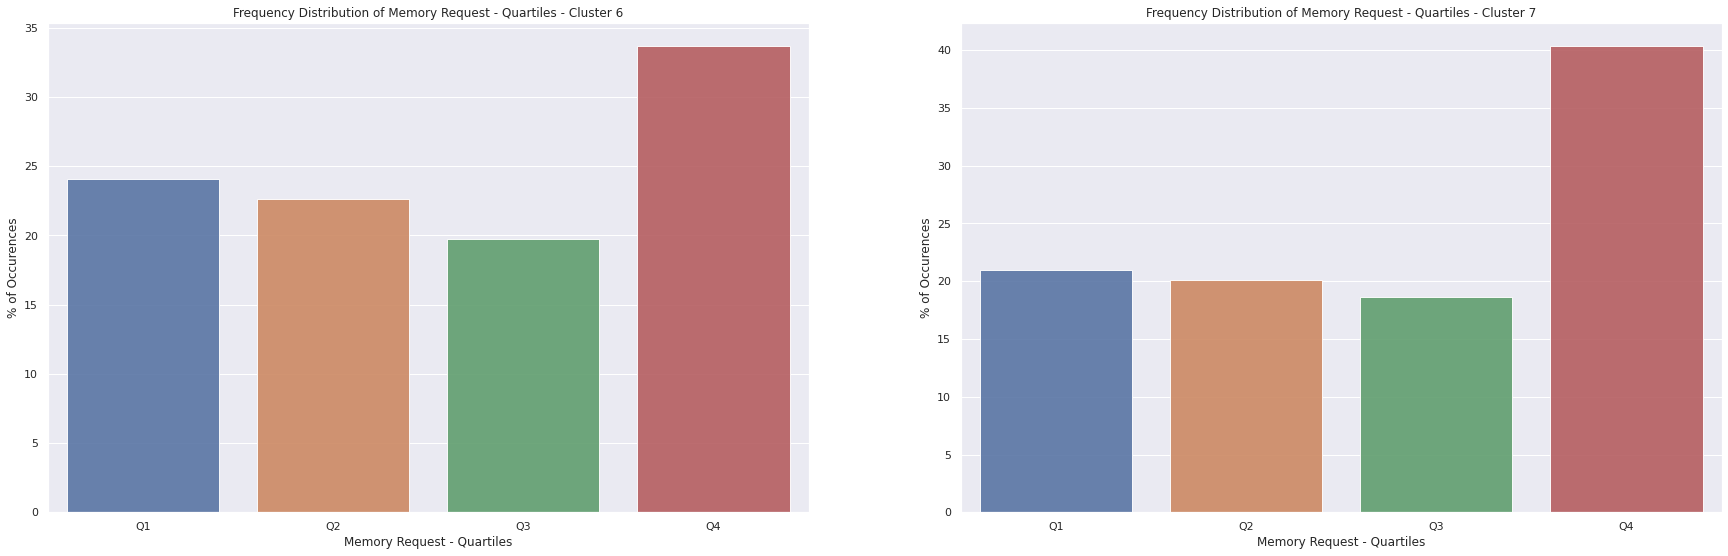

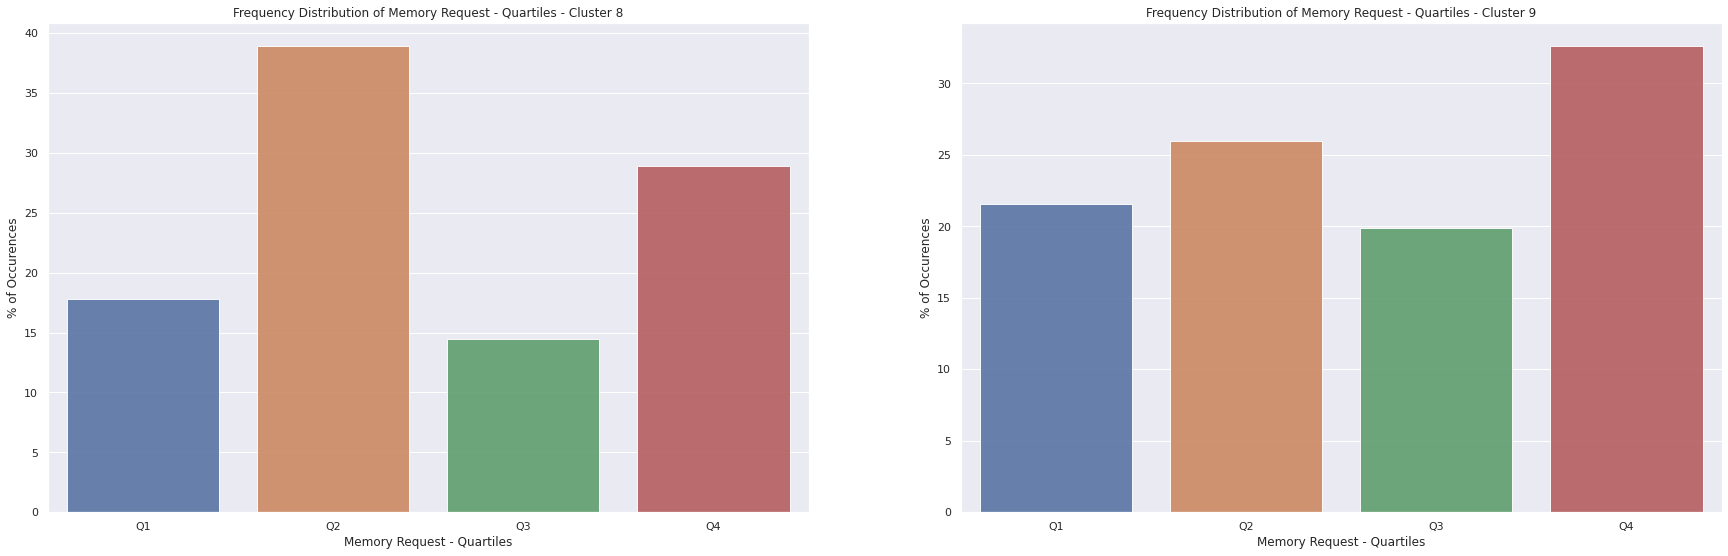

In [48]:
cluster_labels = cluster_labels_10
label = "memory request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

#### Frequency distribution for CPU request - quartiles

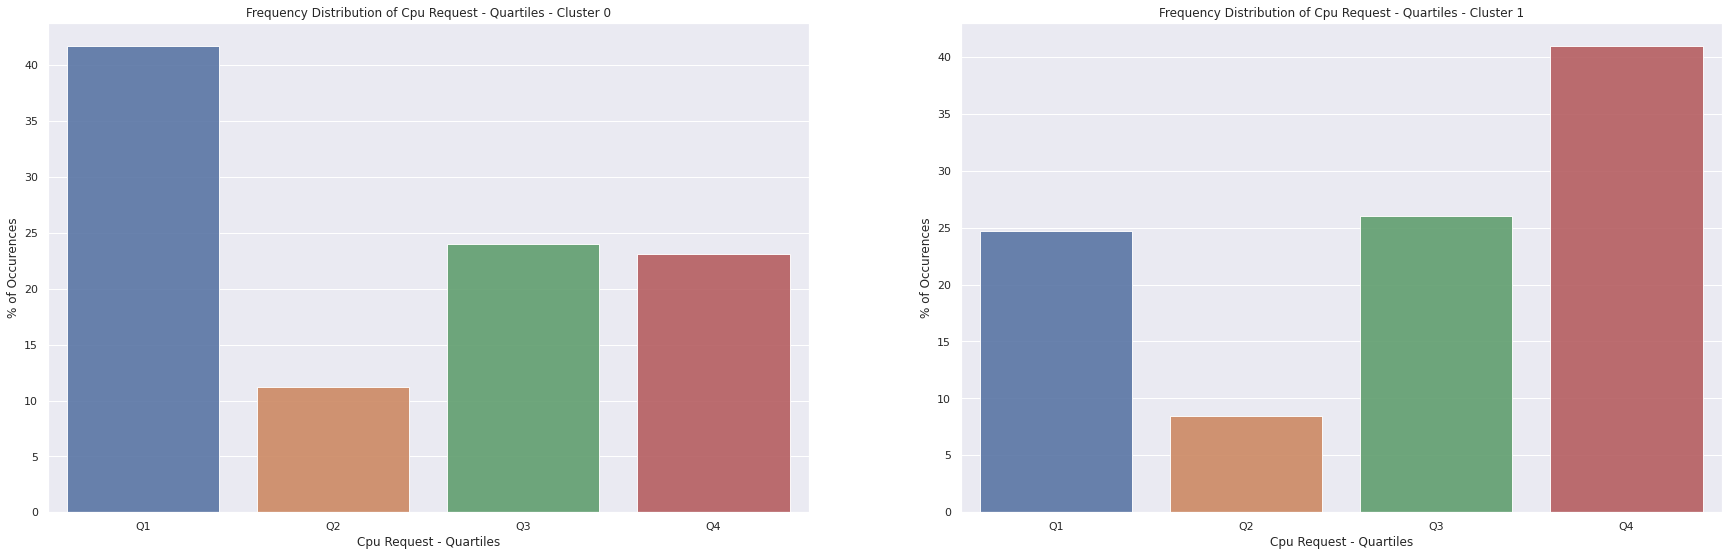

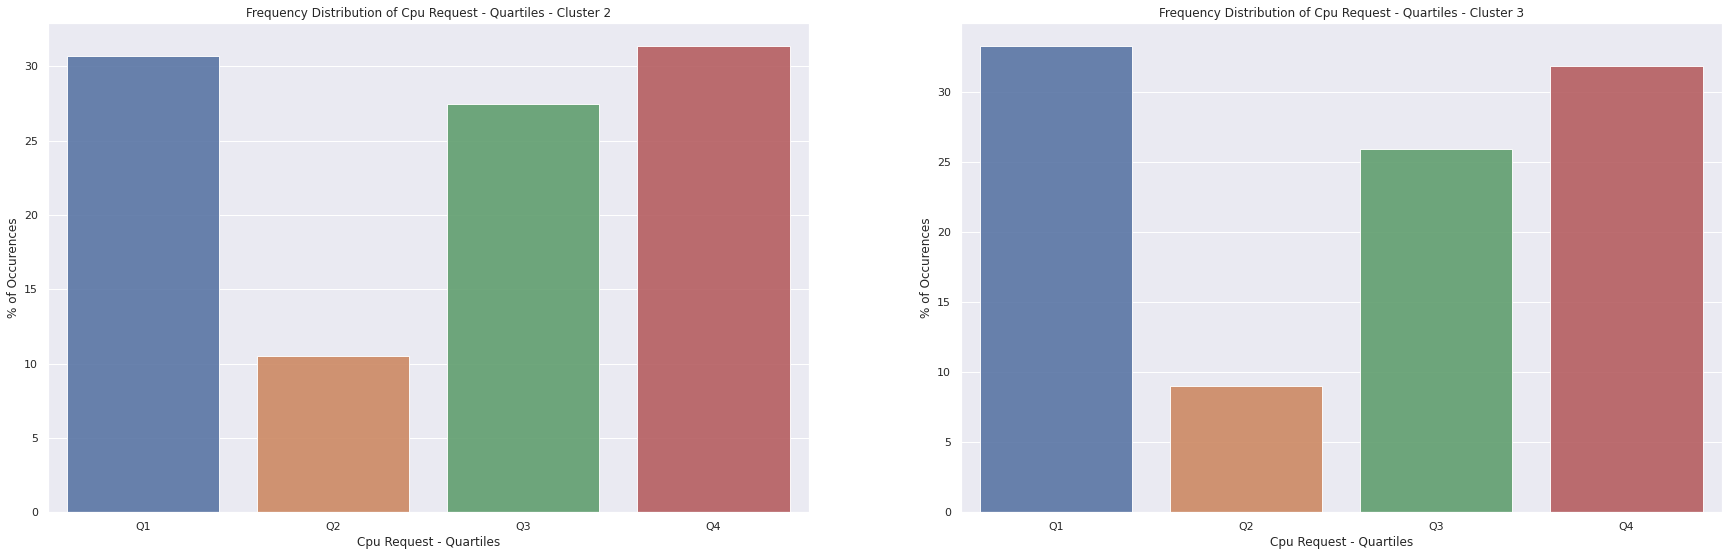

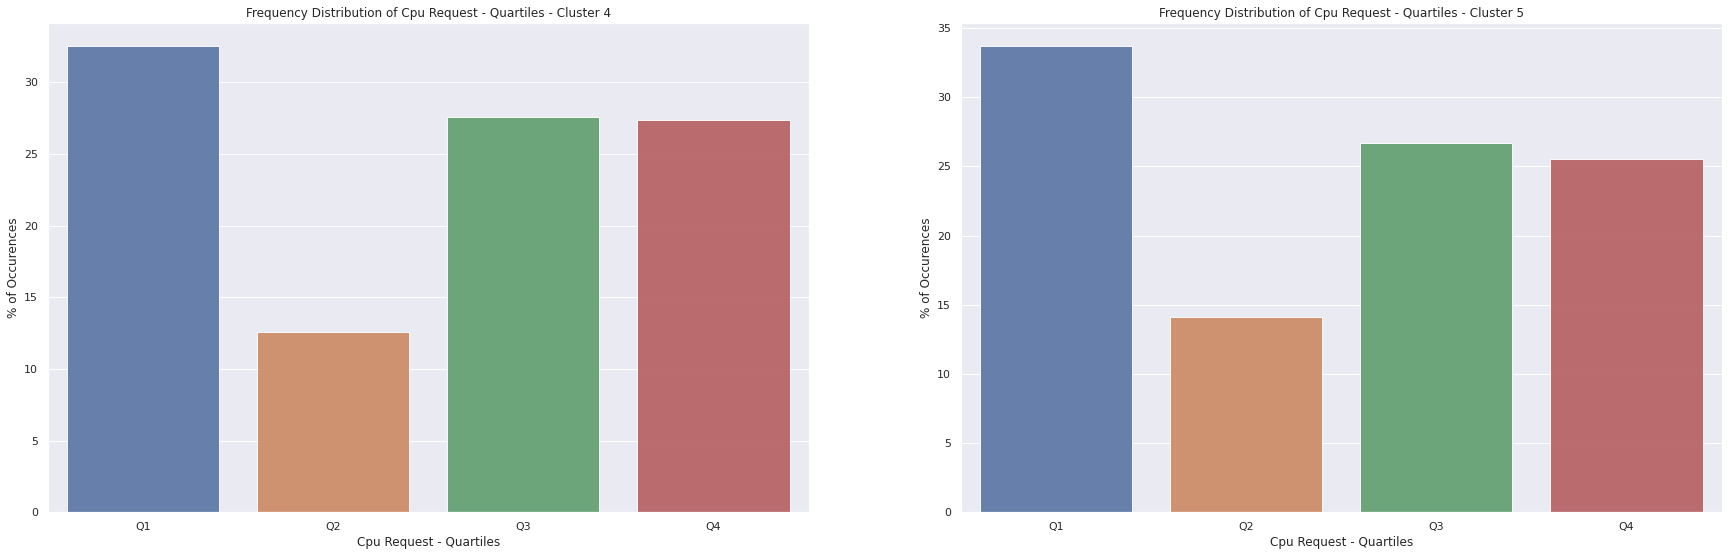

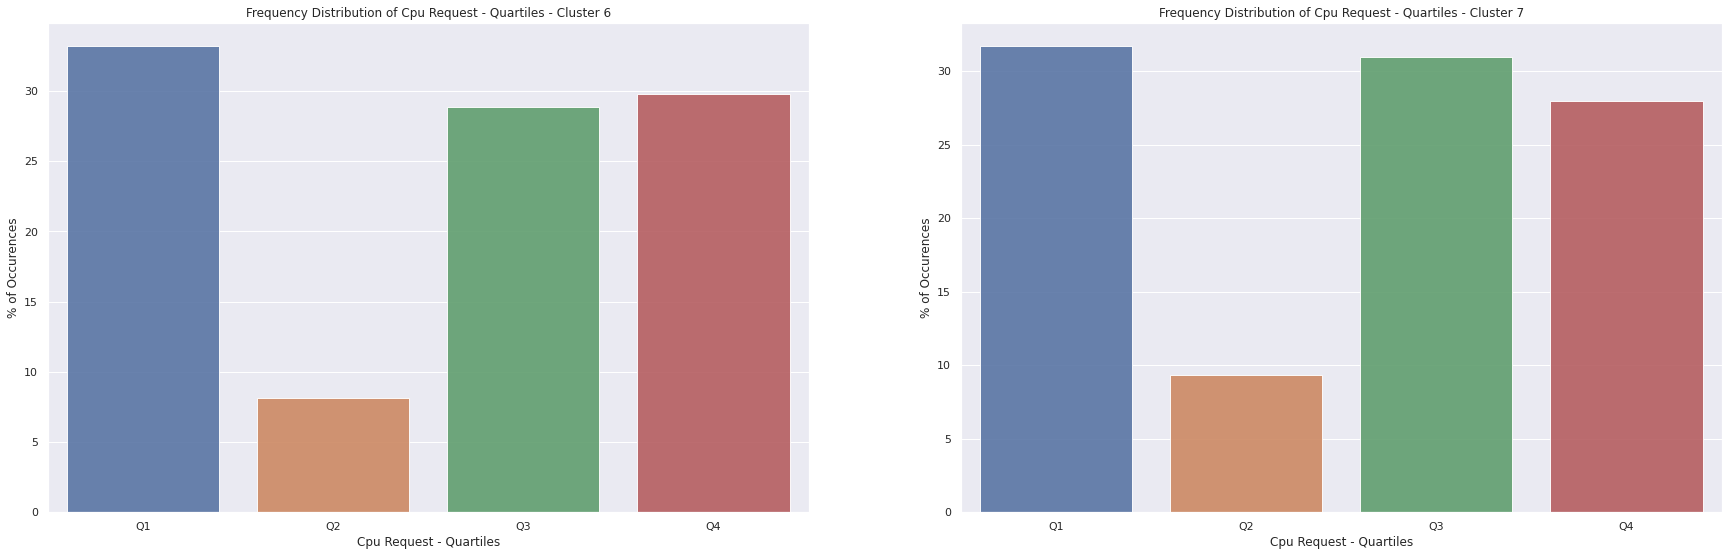

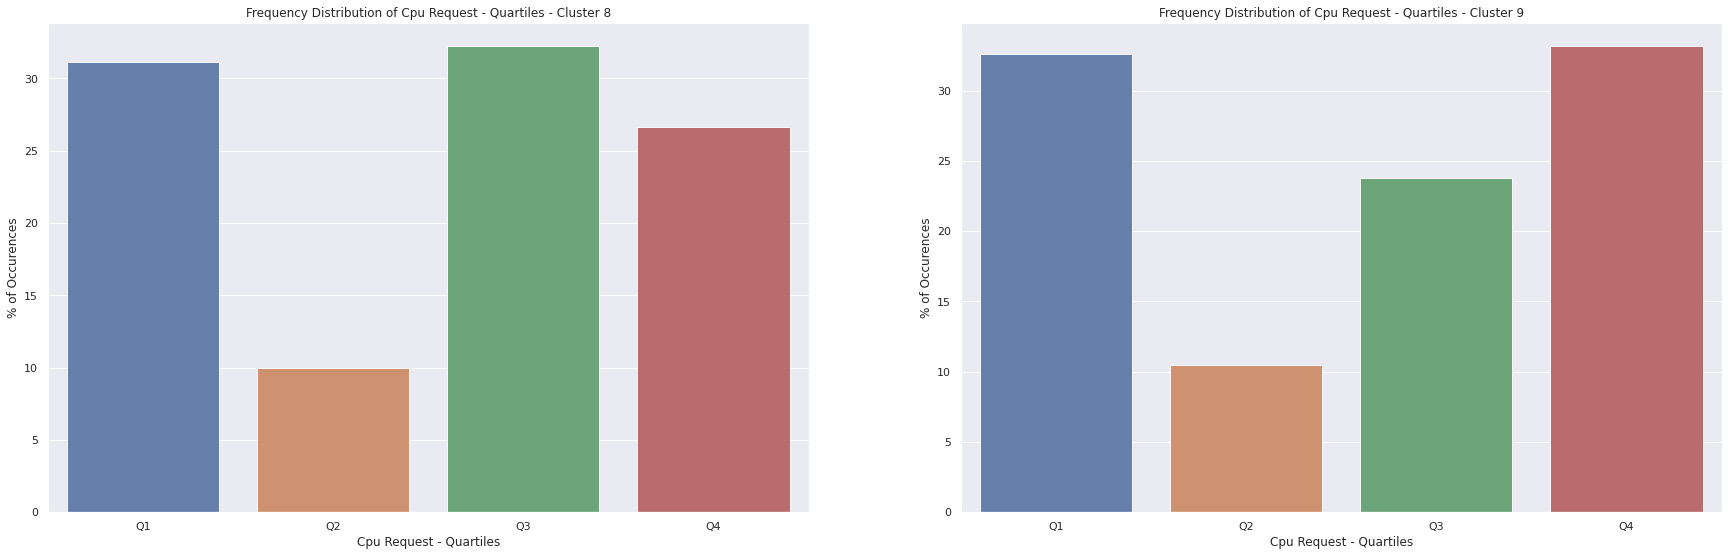

In [49]:
cluster_labels = cluster_labels_10
label = "CPU request - Quartiles"
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']
for i in range(0, 10, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(30, 9)
    axes=[ax1, ax2]
    for j in range(2):
        column_count = static_metrics[cluster_labels == i+j][label].value_counts().sort_values(ascending=False)
        for pr_lab in quartiles:
            if pr_lab not in column_count.index:
                s = pd.Series([0], index=[pr_lab])
                column_count = column_count.append(s)
        column_count = column_count.reindex(quartiles)
        sns.set(style="darkgrid")
        sns.barplot(column_count.index, column_count.values  / len(static_metrics[cluster_labels == i+j]) * 100, alpha=0.9, ax=axes[j])
        axes[j].set_title(f'Frequency Distribution of {label.title()} - Cluster {i+j}')
        axes[j].set_ylabel('% of Occurences', fontsize=12)
        axes[j].set_xlabel(f'{label.title()}', fontsize=12)

## Finalizing static features df

In [50]:
static_metrics['K-Means = 2'] = cluster_labels_2
static_metrics['K-Means = 4'] = cluster_labels_4
static_metrics['K-Means = 6'] = cluster_labels_6
static_metrics['K-Means = 8'] = cluster_labels_8
static_metrics['K-Means = 10'] = cluster_labels_10
static_metrics

priority  different machines restriction  disk space request - Q1  \
job ID                                                                          
3418356            9                               0                        0   
3418405            9                               0                        0   
6724949            9                               0                        0   
28185708           1                               0                        1   
124371644          9                               0                        0   
...              ...                             ...                      ...   
6486612269         1                               0                        0   
6486612710         4                               0                        0   
6486630408         4                               0                        0   
6486631154         8                               0                        0   
6486631394         0                               0                        0   

            disk space request - Q2  disk space request - Q3  \
job ID                                                         
3418356                           0                        0   
3418405                           0                        0   
6724949                           0                        0   
28185708                          0                        0   
124371644                         0                        0   
...                             ...                      ...   
6486612269                        1                        0   
6486612710                        0                        0   
6486630408                        1                        0   
6486631154                        1                        0   
6486631394                        1                        0   

            disk space request - Q4 disk space request - Quartiles  \
job ID                                                               
3418356                           1                             Q4   
3418405                           1                             Q4   
6724949                           1                             Q4   
28185708                          0                             Q1   
124371644                         1                             Q4   
...                             ...                            ...   
6486612269                        0                             Q2   
6486612710                        1                             Q4   
6486630408                        0                             Q2   
6486631154                        0                             Q2   
6486631394                        0                             Q2   

            memory request - Q1  memory request - Q2  memory request - Q3  \
job ID                                                                      
3418356                       0                    0                    0   
3418405                       0                    0                    0   
6724949                       0                    0                    0   
28185708                      0                    1                    0   
124371644                     0                    0                    0   
...                         ...                  ...                  ...   
6486612269                    0                    0                    1   
6486612710                    0                    0                    0   
6486630408                    1                    0                    0   
6486631154                    0                    1                    0   
6486631394                    0                    1                    0   

            ...  CPU request - Quartiles priority labels  \
job ID      ...                                            
3418356     ...                       Q4  Production [9]   
3418405     ...                 

In [51]:
static_metrics.to_csv('data/static_metrics_and_kmeans.csv')

## Summarizing static features

In [52]:
priority_vector=["Free [0,1]", "Other [2,8]", "Production [9]", "Monitoring [10]", "Infrastructure [11]"]
static_metrics['priority labels'] = pd.Categorical(static_metrics['priority labels'], categories=priority_vector)

In [53]:
static_metrics

priority  different machines restriction  disk space request - Q1  \
job ID                                                                          
3418356            9                               0                        0   
3418405            9                               0                        0   
6724949            9                               0                        0   
28185708           1                               0                        1   
124371644          9                               0                        0   
...              ...                             ...                      ...   
6486612269         1                               0                        0   
6486612710         4                               0                        0   
6486630408         4                               0                        0   
6486631154         8                               0                        0   
6486631394         0                               0                        0   

            disk space request - Q2  disk space request - Q3  \
job ID                                                         
3418356                           0                        0   
3418405                           0                        0   
6724949                           0                        0   
28185708                          0                        0   
124371644                         0                        0   
...                             ...                      ...   
6486612269                        1                        0   
6486612710                        0                        0   
6486630408                        1                        0   
6486631154                        1                        0   
6486631394                        1                        0   

            disk space request - Q4 disk space request - Quartiles  \
job ID                                                               
3418356                           1                             Q4   
3418405                           1                             Q4   
6724949                           1                             Q4   
28185708                          0                             Q1   
124371644                         1                             Q4   
...                             ...                            ...   
6486612269                        0                             Q2   
6486612710                        1                             Q4   
6486630408                        0                             Q2   
6486631154                        0                             Q2   
6486631394                        0                             Q2   

            memory request - Q1  memory request - Q2  memory request - Q3  \
job ID                                                                      
3418356                       0                    0                    0   
3418405                       0                    0                    0   
6724949                       0                    0                    0   
28185708                      0                    1                    0   
124371644                     0                    0                    0   
...                         ...                  ...                  ...   
6486612269                    0                    0                    1   
6486612710                    0                    0                    0   
6486630408                    1                    0                    0   
6486631154                    0                    1                    0   
6486631394                    0                    1                    0   

            ...  CPU request - Quartiles priority labels  \
job ID      ...                                            
3418356     ...                       Q4  Production [9]   
3418405     ...                 

### Priority

<Figure size 1080x576 with 0 Axes>

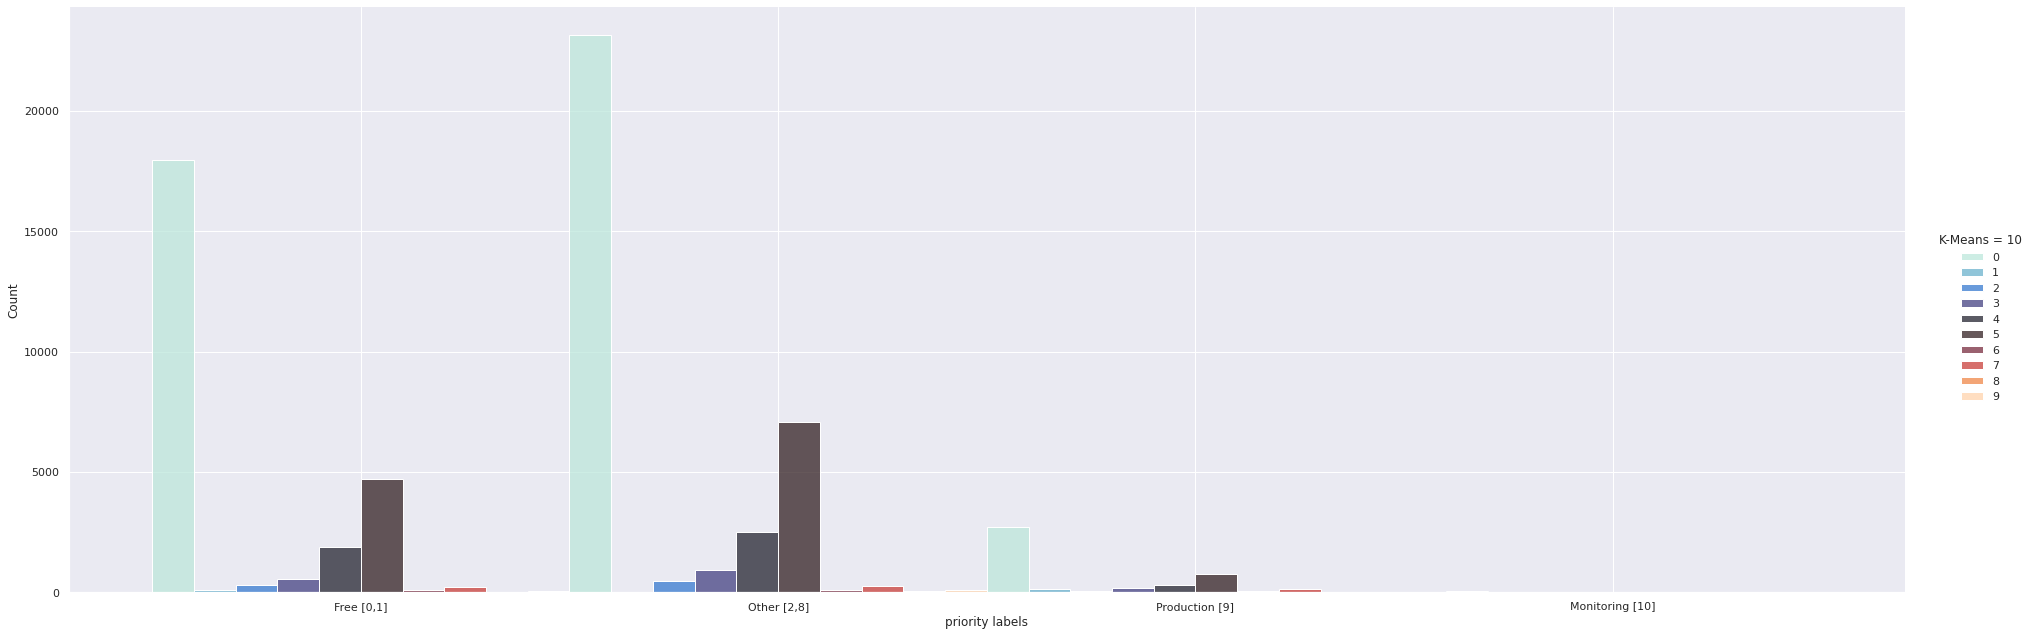

In [54]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,8))
sns.displot(static_metrics, x="priority labels", hue="K-Means = 10", height=9, aspect=3, palette="icefire", multiple="dodge")

<AxesSubplot:xlabel='priority labels', ylabel='proportion'>

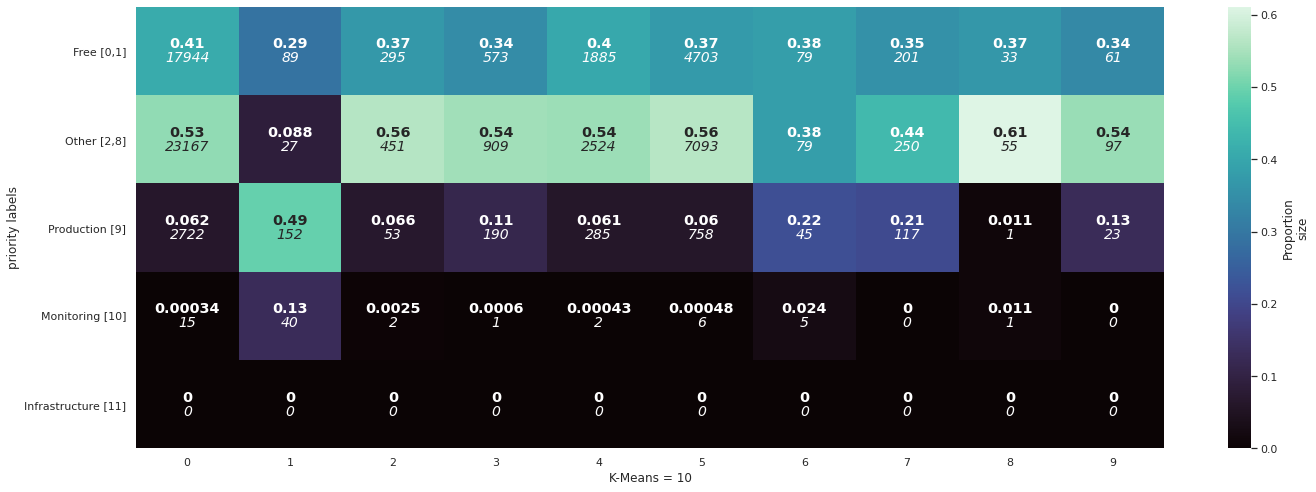

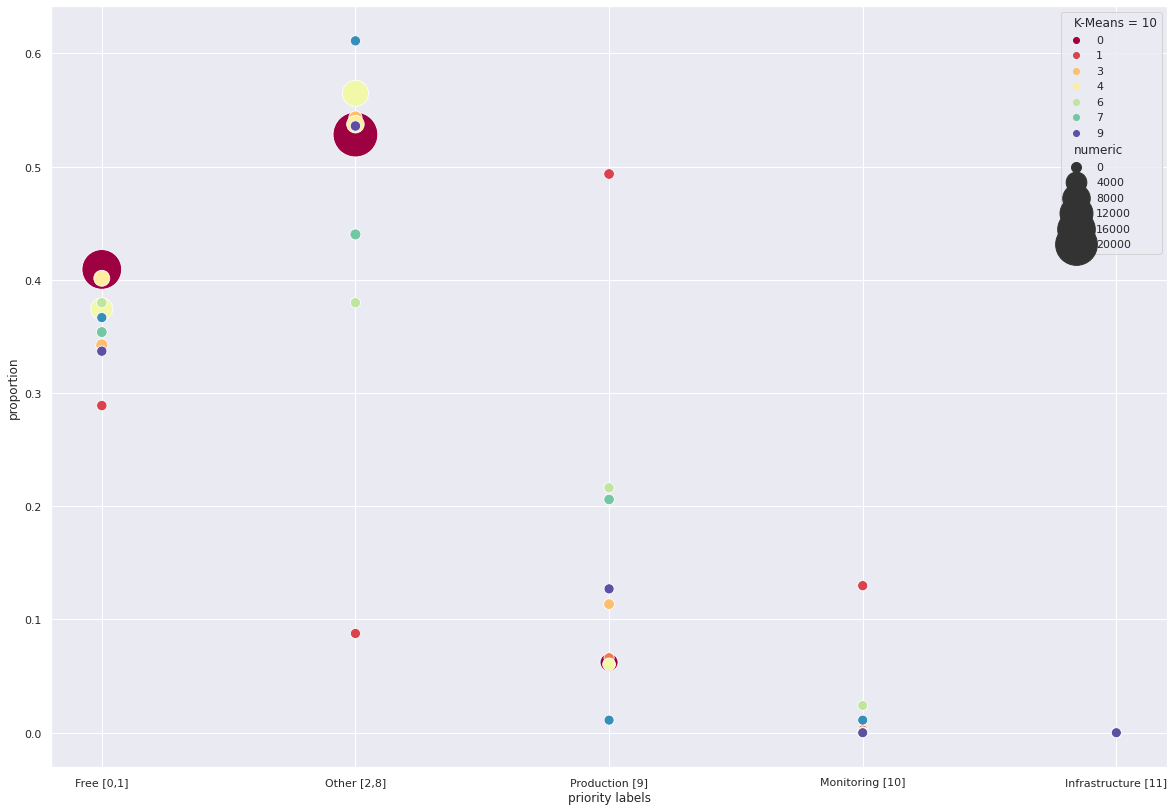

In [55]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 10"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 10", "priority count")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc = heatmap_df_perc.pivot("priority labels", "K-Means = 10", "priority count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="mako", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="mako", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/priority_labels_heatmap_k10.svg')

x = heatmap_df_perc.unstack()
x = x.to_frame()
x.reset_index(inplace=True)
x.columns = ["K-Means = 10", "priority labels", "proportion"]

x2=heatmap_df_total.unstack()
x2 = x2.to_frame()
x2.reset_index(inplace=True)
x2 = x2[x2["K-Means = 10"] != "total"]
x2.columns = ["K-Means = 10", "priority labels", "numeric"]
x["numeric"] = x2["numeric"].values


plt.figure(figsize=(20,14))
sns.scatterplot(
    data=x, x="priority labels", y="proportion", hue="K-Means = 10", size="numeric", units="K-Means = 10",
    sizes=(100, 2000),
    legend="auto",
    palette="Spectral"
)

<AxesSubplot:xlabel='priority labels', ylabel='proportion'>

<Figure size 1440x504 with 0 Axes>

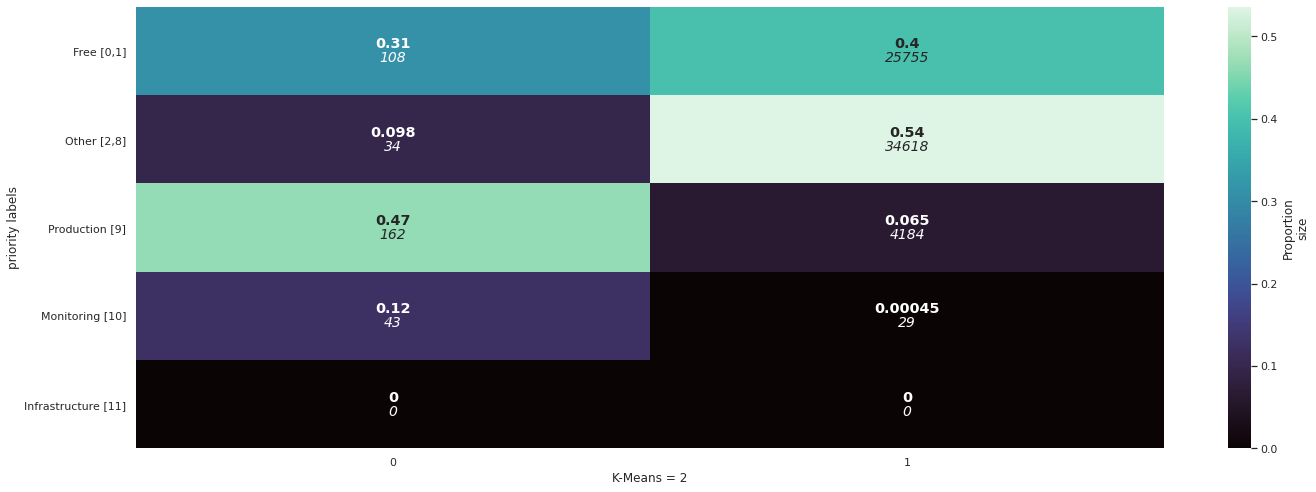

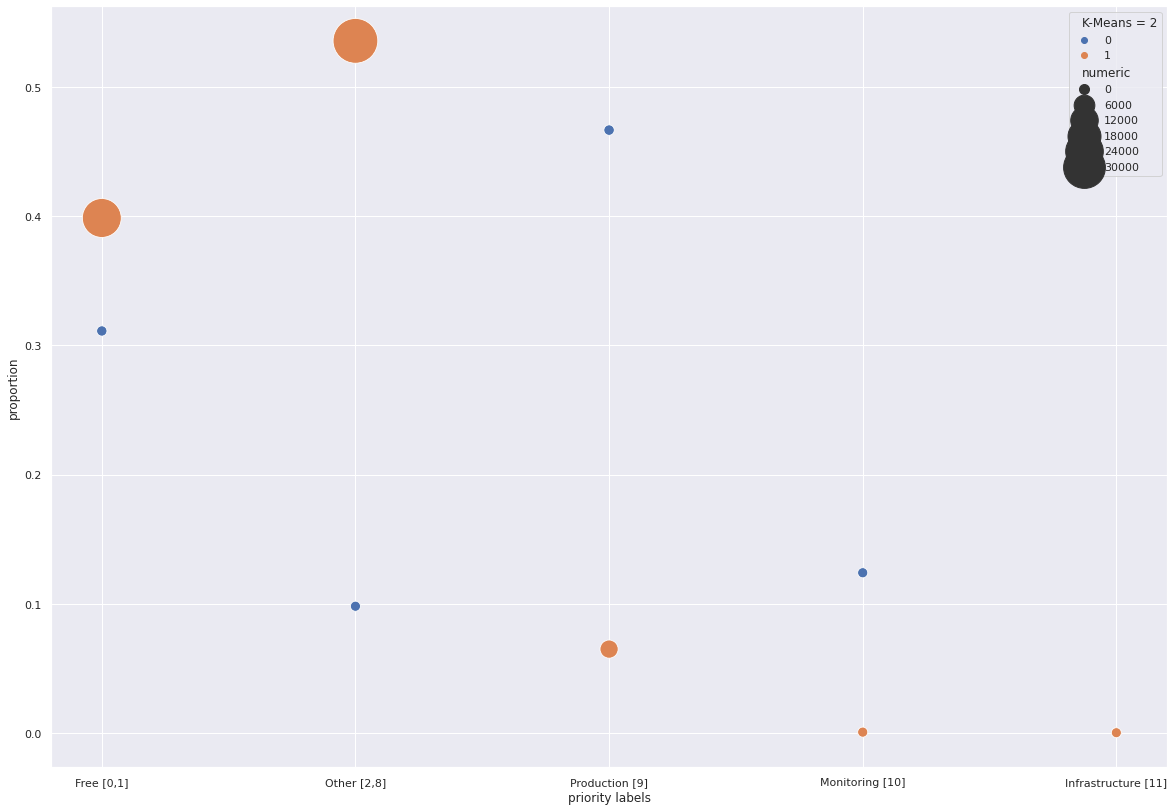

In [56]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 2"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 2", "priority count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

plt.figure(figsize=(20,7))

#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc = heatmap_df_perc.pivot("priority labels", "K-Means = 2", "priority count")

plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="mako", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="mako", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/priority_labels_heatmap_k2.svg')


x = heatmap_df_perc.unstack()
x = x.to_frame()
x.reset_index(inplace=True)
x.columns = ["K-Means = 2", "priority labels", "proportion"]

x2=heatmap_df_total.unstack()
x2 = x2.to_frame()
x2.reset_index(inplace=True)
x2 = x2[x2["K-Means = 2"] != "total"]
x2.columns = ["K-Means = 2", "priority labels", "numeric"]
x["numeric"] = x2["numeric"].values

plt.figure(figsize=(20,14))
sns.scatterplot(
    data=x, x="priority labels", y="proportion", hue="K-Means = 2", size="numeric", units="K-Means = 2",
    sizes=(100, 2000),
    legend="auto",
    #palette="Spectral"
)

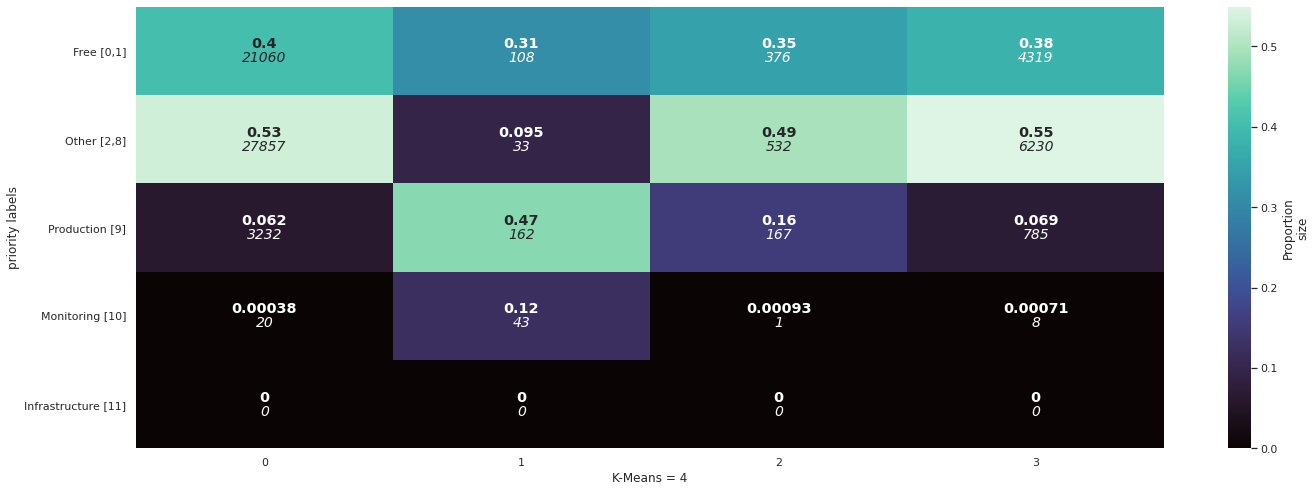

In [57]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 4"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 4", "priority count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc = heatmap_df_perc.pivot("priority labels", "K-Means = 4", "priority count")

plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="mako", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="mako", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/priority_labels_heatmap_k4.svg')


#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_perc, annot=True, cmap="mako")

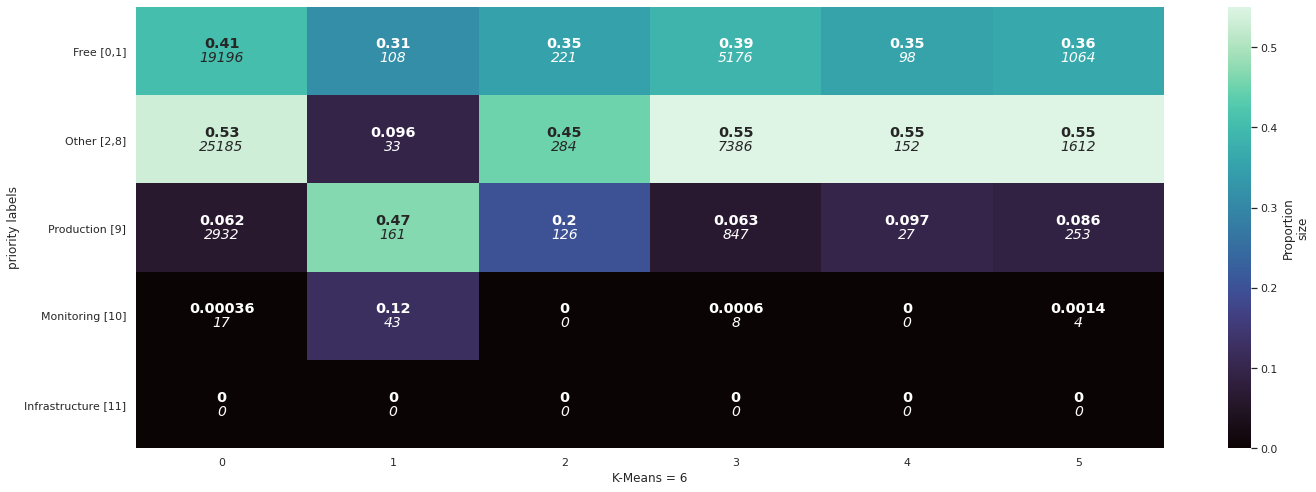

In [58]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 6"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 6", "priority count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc = heatmap_df_perc.pivot("priority labels", "K-Means = 6", "priority count")

plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="mako", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="mako", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/priority_labels_heatmap_k6.svg')

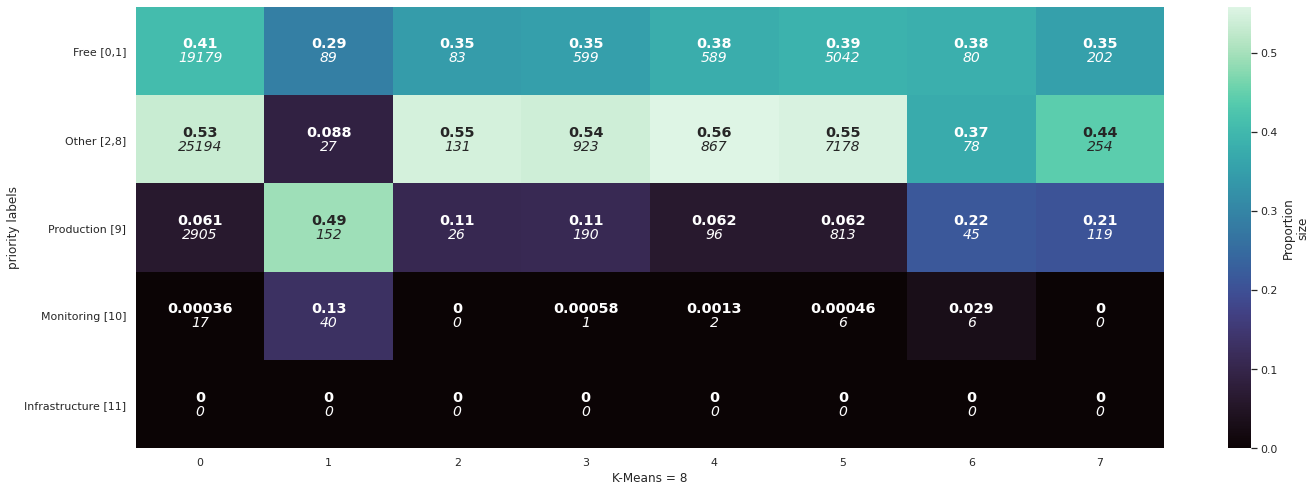

In [59]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 8"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 8", "priority count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values


#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc = heatmap_df_perc.pivot("priority labels", "K-Means = 8", "priority count")

plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="mako", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="mako", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/priority_labels_heatmap_k8.svg')

#### Priority overall

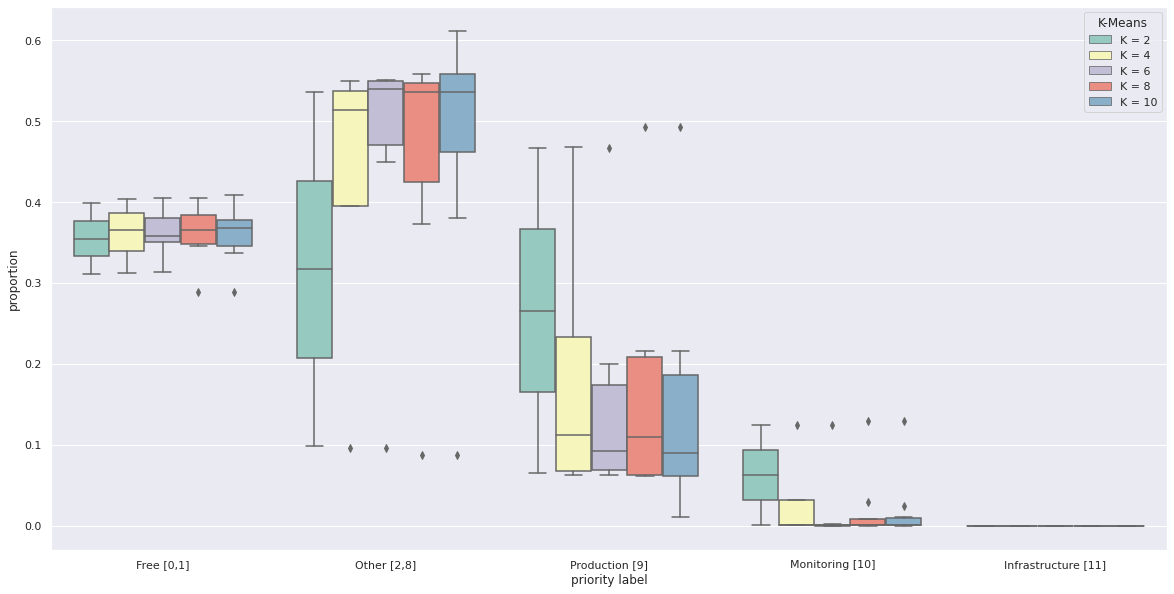

In [60]:
heatmap_df = static_metrics.groupby(["priority labels", "K-Means = 10"])["priority labels"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["priority count"]


heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("priority labels", "K-Means = 10", "priority count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc.columns = ["priority label", "K-Means", "proportion"]
heatmap_df_perc["K-Means"] = "K = 10"
heatmap_df_final = heatmap_df_perc.copy()

for k in range(2, 10, 2):
    heatmap_df = static_metrics.groupby(["priority labels", f"K-Means = {k}"])["priority labels"].count()
    heatmap_df = heatmap_df.to_frame()
    heatmap_df.columns = ["priority count"]


    heatmap_df_total = heatmap_df.reset_index()
    heatmap_df_total = heatmap_df_total.pivot("priority labels", f"K-Means = {k}", "priority count")
    #heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

    #plt.figure(figsize=(20,7))
    #sns.heatmap(heatmap_df_total, annot=True, fmt="d")
    #
    heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
    heatmap_df_perc = heatmap_df_perc.reset_index()
    heatmap_df_perc.columns = ["priority label", "K-Means", "proportion"]
    heatmap_df_perc["K-Means"] = f"K = {k}"
    heatmap_df_final = heatmap_df_final.append(heatmap_df_perc)
    
heatmap_df_final
heatmap_df_final["K-Means"] = pd.Categorical(heatmap_df_final['K-Means'], categories=[f"K = {k}" for k in range(2, 12, 2)])

plt.figure(figsize=(20,10))
sns.boxplot(x="priority label", y="proportion", hue="K-Means", data=heatmap_df_final, palette="Set3")
plt.savefig('figures/2021-11-28-presentation/priority_labels_boxplot-sum.svg')

### CPU resource requested

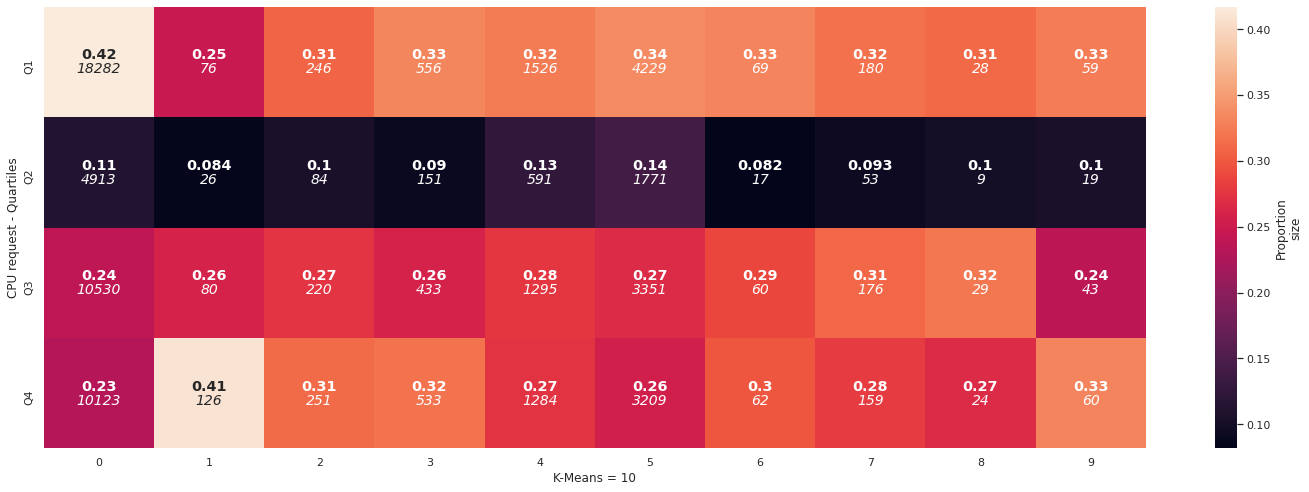

In [61]:
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", "K-Means = 10"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", "K-Means = 10", "quartiles count")

heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["CPU request - Quartiles"] = pd.Categorical(heatmap_df_perc["CPU request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("CPU request - Quartiles", "K-Means = 10", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="rocket", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="rocket", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/cpu_requests_heatmap_k10.svg')

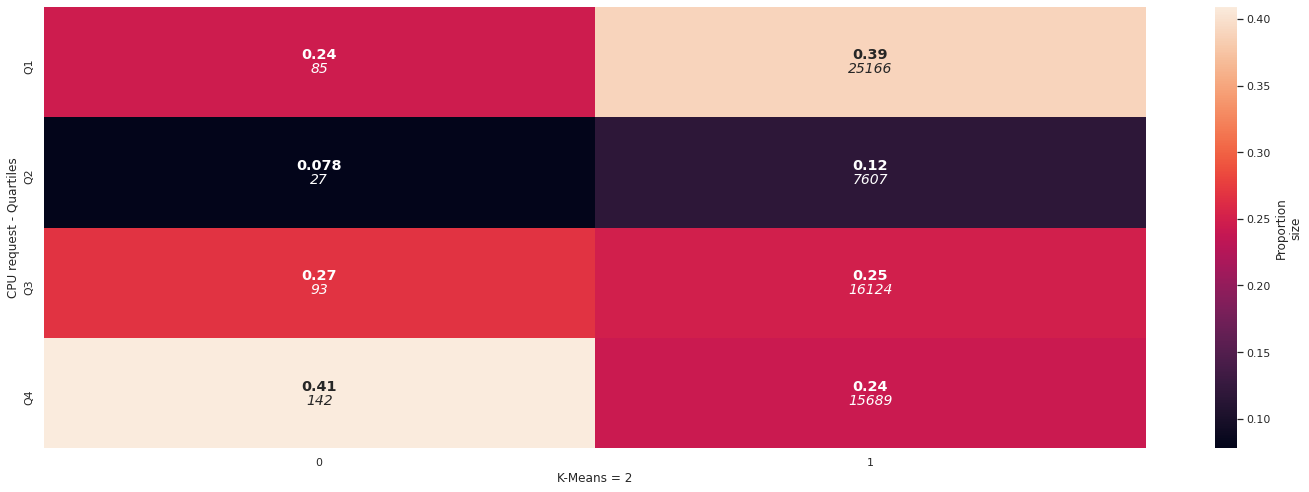

In [62]:
k=2
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", f"K-Means = {k}"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["CPU request - Quartiles"] = pd.Categorical(heatmap_df_perc["CPU request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="rocket", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="rocket", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/cpu_requests_heatmap_k{k}.svg')

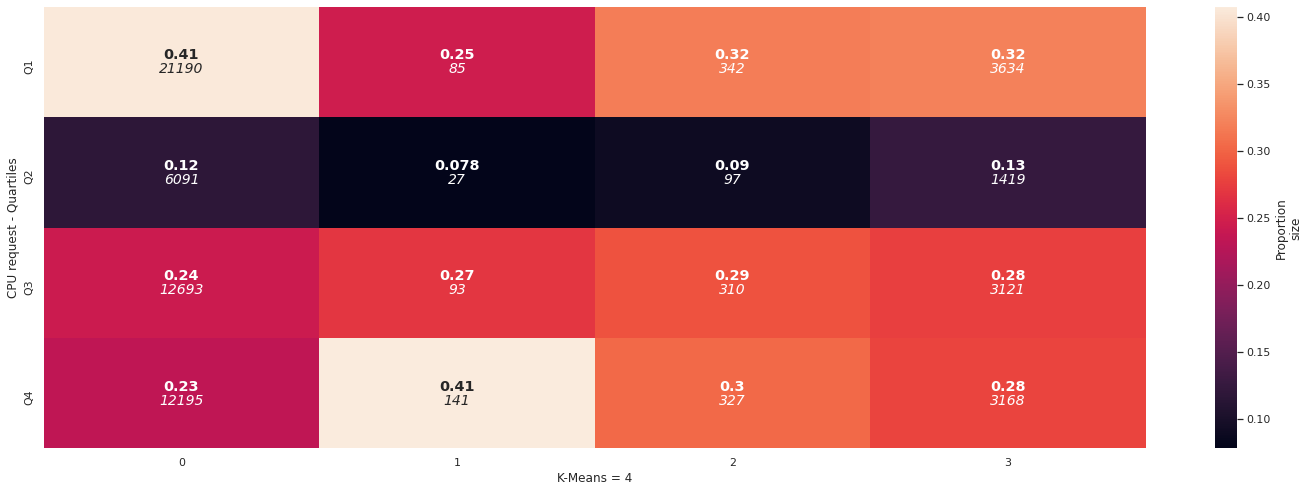

In [63]:
k=4
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", f"K-Means = {k}"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["CPU request - Quartiles"] = pd.Categorical(heatmap_df_perc["CPU request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="rocket", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="rocket", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/cpu_requests_heatmap_k{k}.svg')

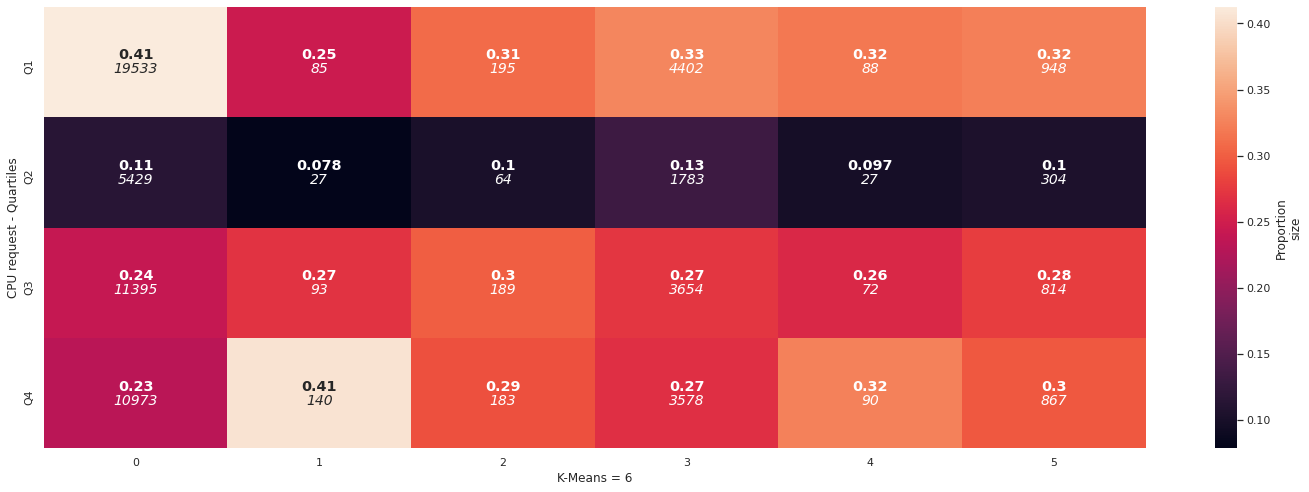

In [64]:
k=6
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", f"K-Means = {k}"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["CPU request - Quartiles"] = pd.Categorical(heatmap_df_perc["CPU request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="rocket", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="rocket", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/cpu_requests_heatmap_k{k}.svg')

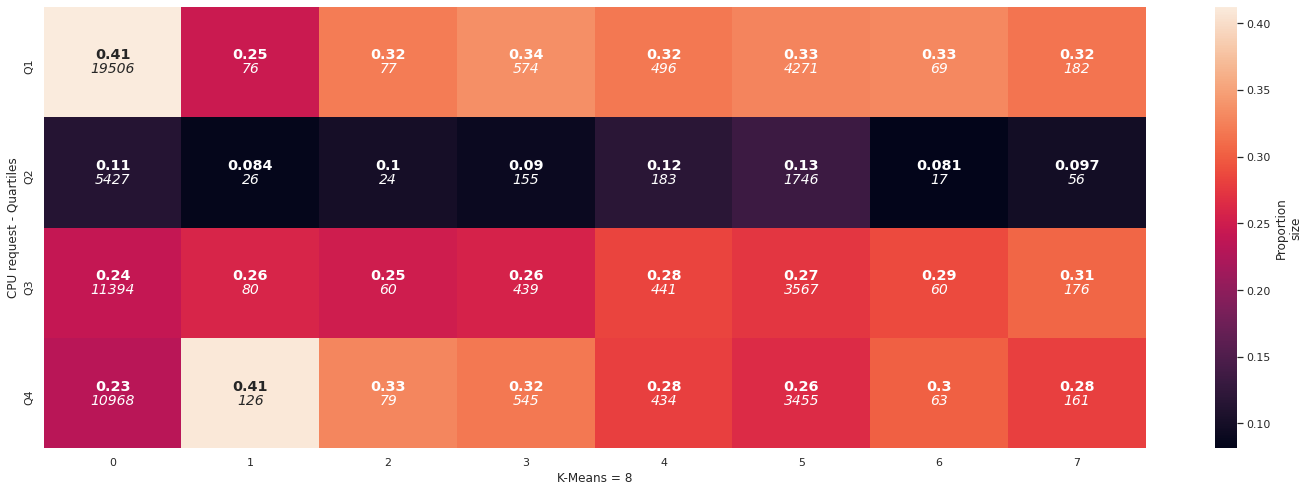

In [65]:
k=8
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", f"K-Means = {k}"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["CPU request - Quartiles"] = pd.Categorical(heatmap_df_perc["CPU request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="rocket", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="rocket", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/cpu_requests_heatmap_k{k}.svg')

#### CPU request overall

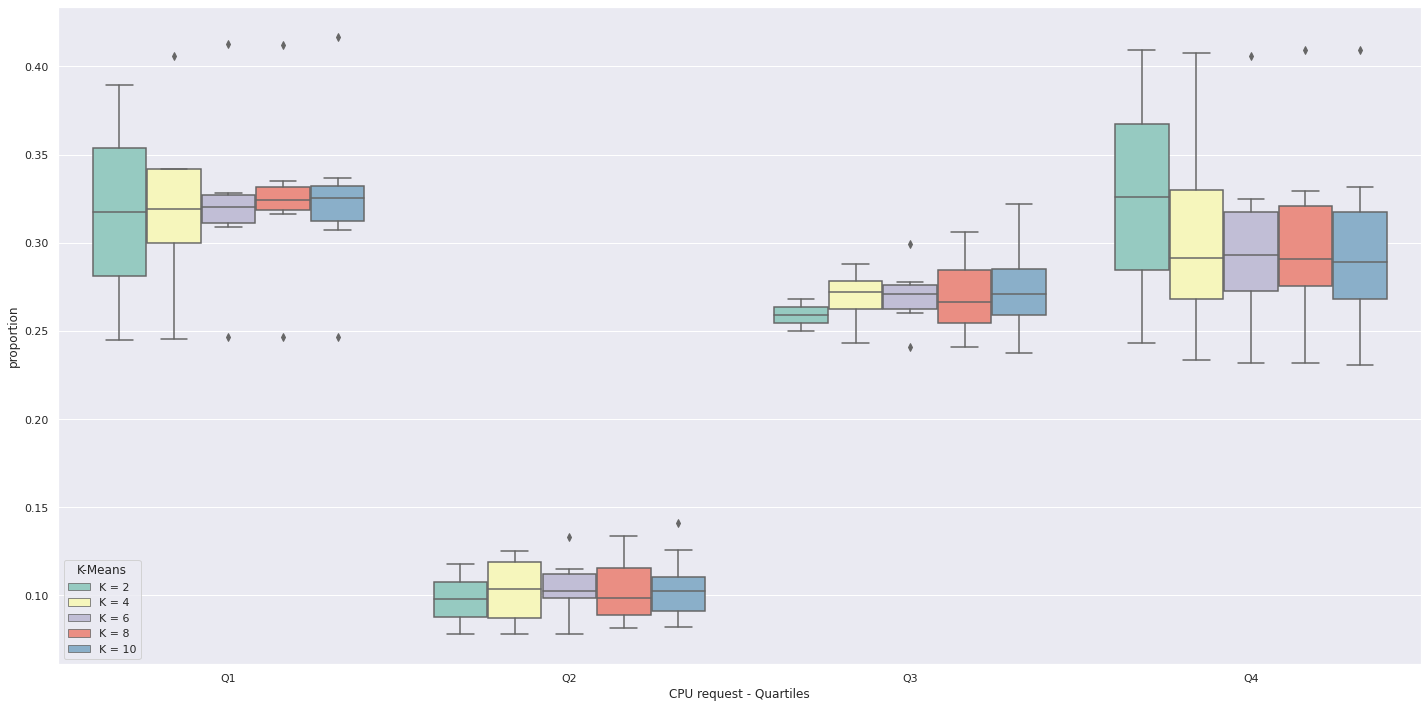

In [66]:
heatmap_df = static_metrics.groupby(["CPU request - Quartiles", "K-Means = 10"])["CPU request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]


heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", "K-Means = 10", "quartiles count")

heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc.columns = ["CPU request - Quartiles", "K-Means", "proportion"]
heatmap_df_perc["K-Means"] = "K = 10"
heatmap_df_final = heatmap_df_perc.copy()

for k in range(2, 10, 2):
    heatmap_df = static_metrics.groupby(["CPU request - Quartiles", f"K-Means = {k}"])["CPU request - Quartiles"].count()
    heatmap_df = heatmap_df.to_frame()
    heatmap_df.columns = ["quartiles count"]


    heatmap_df_total = heatmap_df.reset_index()
    heatmap_df_total = heatmap_df_total.pivot("CPU request - Quartiles", f"K-Means = {k}", "quartiles count")
    #heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

    #plt.figure(figsize=(20,7))
    #sns.heatmap(heatmap_df_total, annot=True, fmt="d")
    #
    heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
    heatmap_df_perc = heatmap_df_perc.reset_index()
    heatmap_df_perc.columns = ["CPU request - Quartiles", "K-Means", "proportion"]
    heatmap_df_perc["K-Means"] = f"K = {k}"
    heatmap_df_final = heatmap_df_final.append(heatmap_df_perc)
    
heatmap_df_final
heatmap_df_final["K-Means"] = pd.Categorical(heatmap_df_final['K-Means'], categories=[f"K = {k}" for k in range(2, 12, 2)])

plt.figure(figsize=(20,10))
sns.boxplot(x="CPU request - Quartiles", y="proportion", hue="K-Means", data=heatmap_df_final, palette="Set3")
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/cpu_requests_boxplot-sum.svg')

### memory resource requested

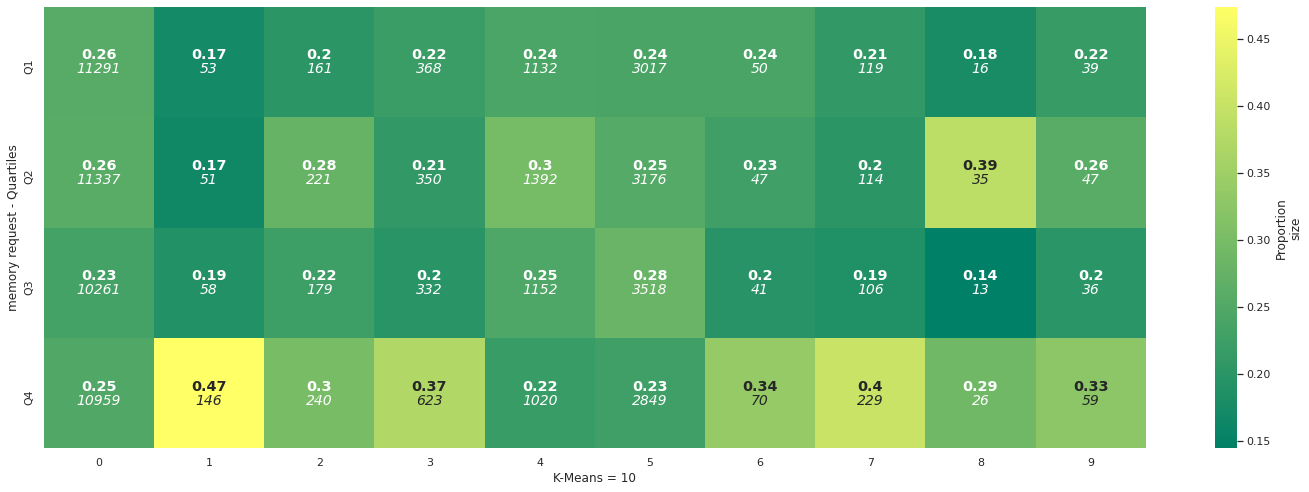

In [67]:
heatmap_df = static_metrics.groupby(["memory request - Quartiles", "K-Means = 10"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", "K-Means = 10", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["memory request - Quartiles"] = pd.Categorical(heatmap_df_perc["memory request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("memory request - Quartiles", "K-Means = 10", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="summer", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="summer", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/memory_requests_heatmap_k10.svg')

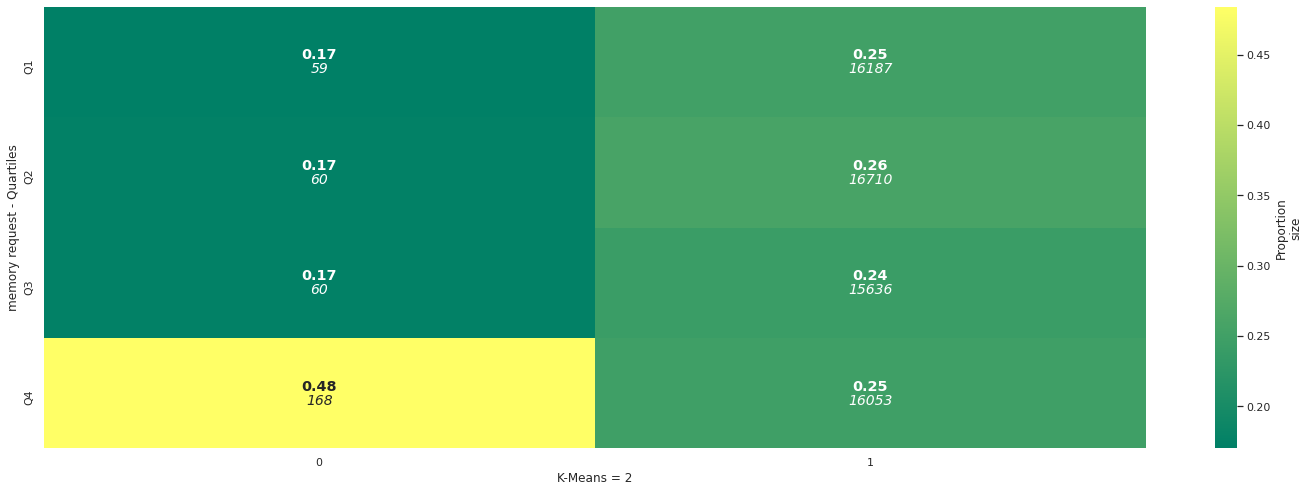

In [68]:
k=2
heatmap_df = static_metrics.groupby(["memory request - Quartiles", f"K-Means = {k}"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["memory request - Quartiles"] = pd.Categorical(heatmap_df_perc["memory request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="summer", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="summer", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/memory_requests_heatmap_k{k}.svg')

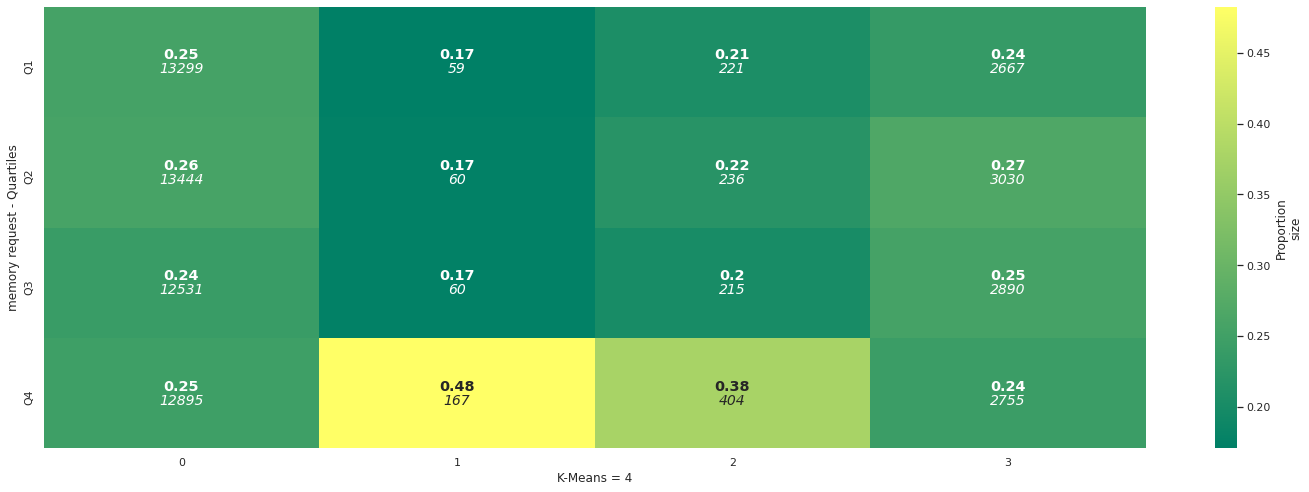

In [69]:
k=4
heatmap_df = static_metrics.groupby(["memory request - Quartiles", f"K-Means = {k}"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["memory request - Quartiles"] = pd.Categorical(heatmap_df_perc["memory request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="summer", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="summer", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/memory_requests_heatmap_k{k}.svg')

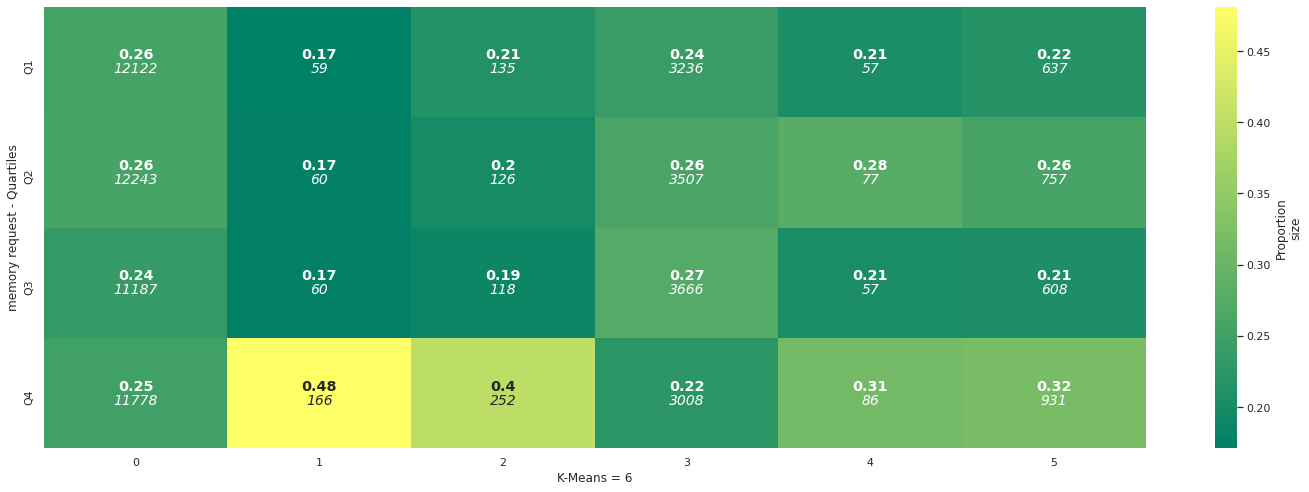

In [70]:
k=6
heatmap_df = static_metrics.groupby(["memory request - Quartiles", f"K-Means = {k}"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["memory request - Quartiles"] = pd.Categorical(heatmap_df_perc["memory request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="summer", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="summer", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/memory_requests_heatmap_k{k}.svg')

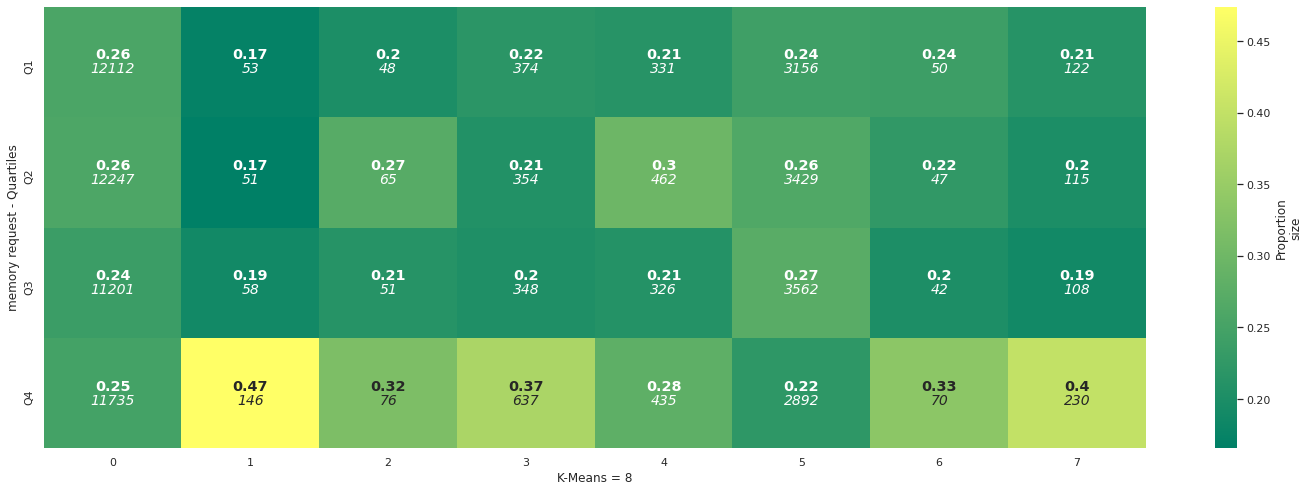

In [71]:
k=8
heatmap_df = static_metrics.groupby(["memory request - Quartiles", f"K-Means = {k}"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc["memory request - Quartiles"] = pd.Categorical(heatmap_df_perc["memory request - Quartiles"], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="summer", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="summer", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/memory_requests_heatmap_k{k}.svg')

#### memory request overall

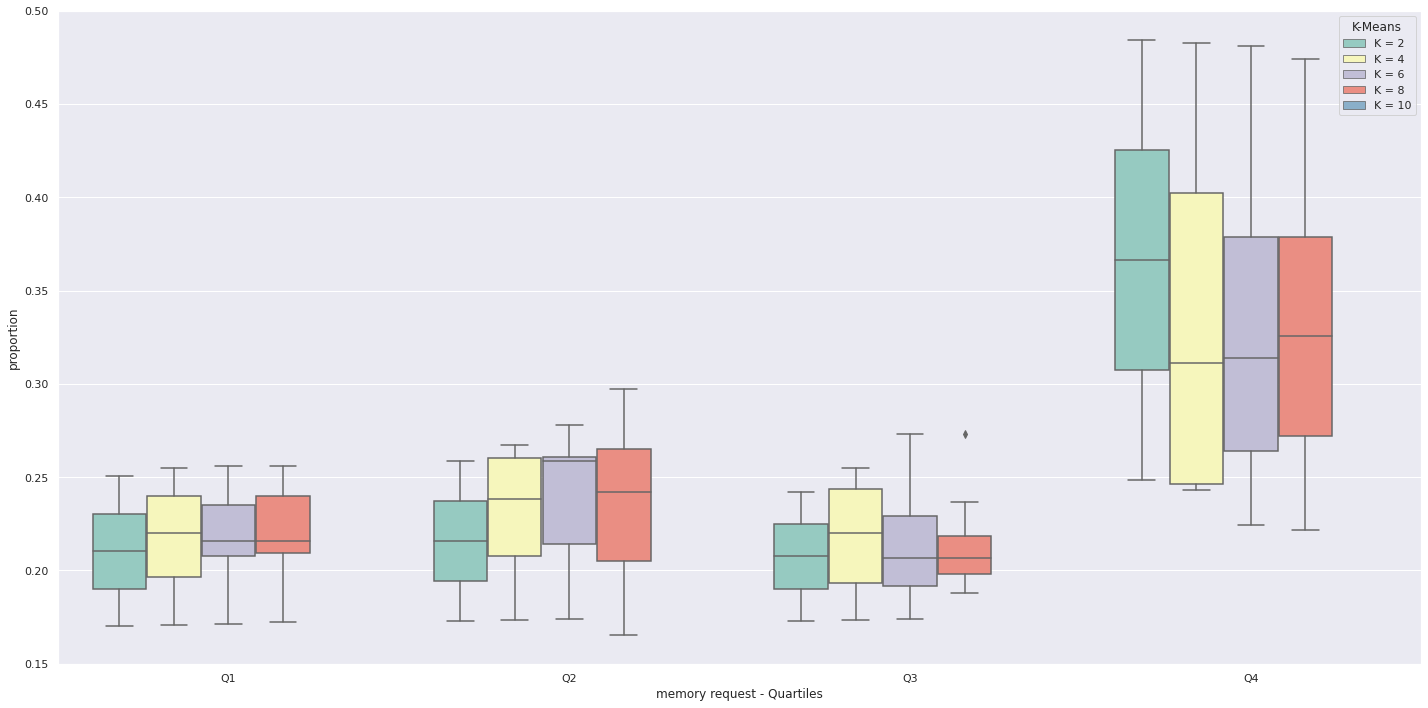

In [72]:
heatmap_df = static_metrics.groupby(["memory request - Quartiles", "K-Means = 10"])["memory request - Quartiles"].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]


heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", "K-Means = 10", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc.columns = ["CPU request - Quartiles", "K-Means", "proportion"]
heatmap_df_perc["K-Means"] = "K = 10"
heatmap_df_final = heatmap_df_perc.copy()

for k in range(2, 10, 2):
    heatmap_df = static_metrics.groupby(["memory request - Quartiles", f"K-Means = {k}"])["memory request - Quartiles"].count()
    heatmap_df = heatmap_df.to_frame()
    heatmap_df.columns = ["quartiles count"]


    heatmap_df_total = heatmap_df.reset_index()
    heatmap_df_total = heatmap_df_total.pivot("memory request - Quartiles", f"K-Means = {k}", "quartiles count")
    #heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

    #plt.figure(figsize=(20,7))
    #sns.heatmap(heatmap_df_total, annot=True, fmt="d")
    #
    heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
    heatmap_df_perc = heatmap_df_perc.reset_index()
    heatmap_df_perc.columns = ["memory request - Quartiles", "K-Means", "proportion"]
    heatmap_df_perc["K-Means"] = f"K = {k}"
    heatmap_df_final = heatmap_df_final.append(heatmap_df_perc)
    
heatmap_df_final
heatmap_df_final["K-Means"] = pd.Categorical(heatmap_df_final['K-Means'], categories=[f"K = {k}" for k in range(2, 12, 2)])

plt.figure(figsize=(20,10))
sns.boxplot(x="memory request - Quartiles", y="proportion", hue="K-Means", data=heatmap_df_final, palette="Set3")
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/memory_requests_boxplot-sum.svg')

### disk space resource requested

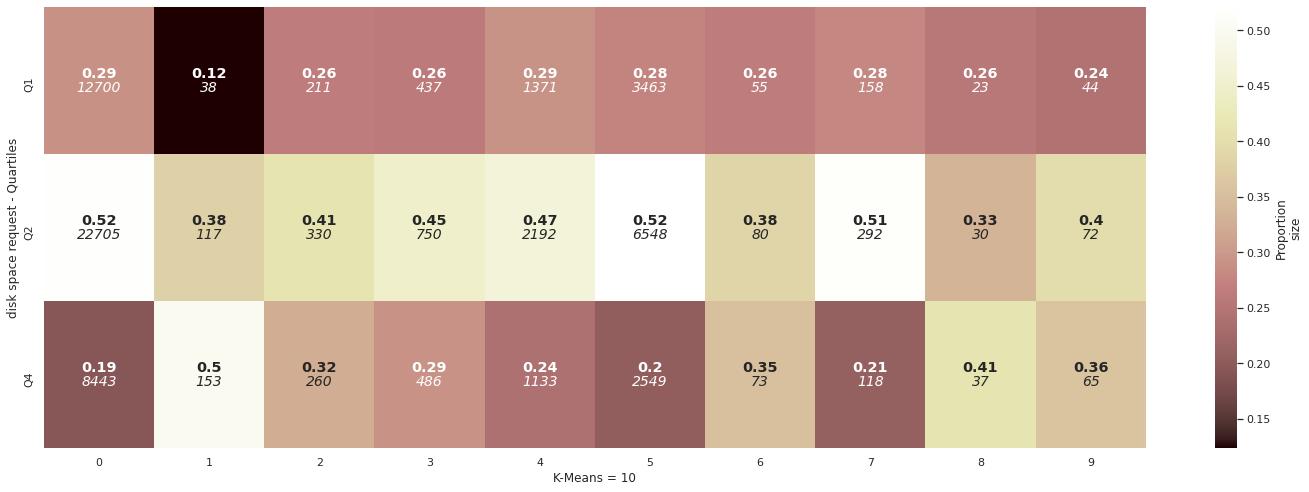

In [73]:
target_metric="disk space request - Quartiles"

heatmap_df = static_metrics.groupby([target_metric, "K-Means = 10"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, "K-Means = 10", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, "K-Means = 10", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="pink", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="pink", cbar=False)
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/disk_requests_heatmap_k10.svg')

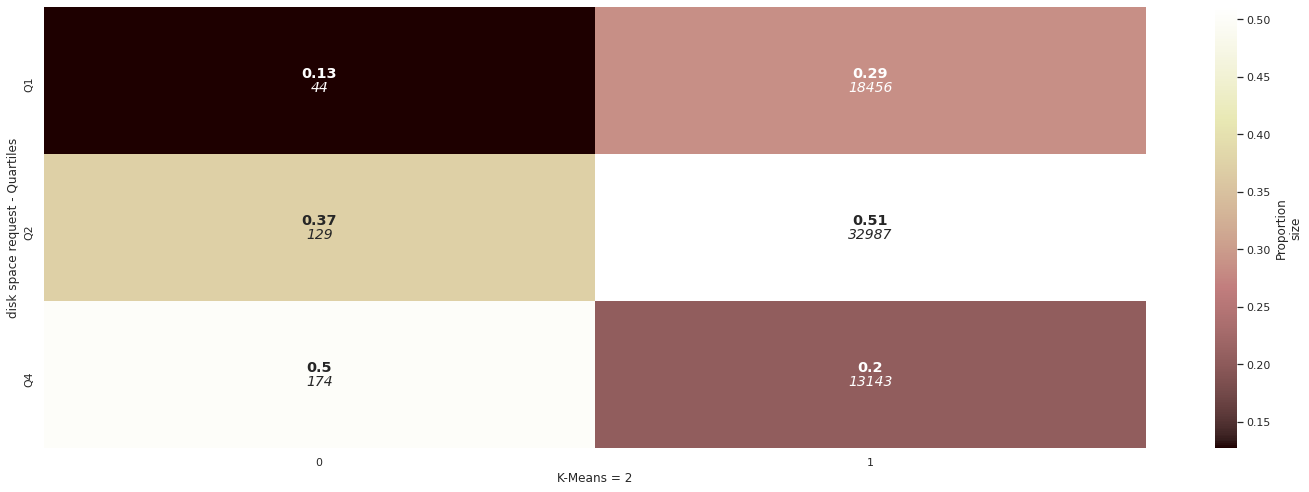

In [74]:
k=2
target_metric="disk space request - Quartiles"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="pink", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="pink", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/disk_requests_heatmap_k{k}.svg')

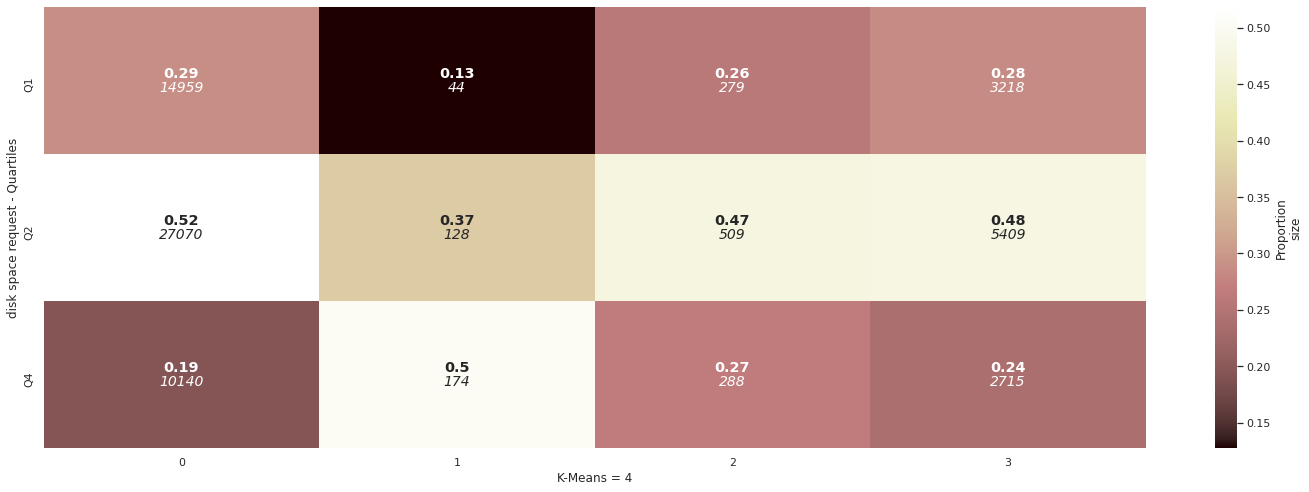

In [75]:
k=4
target_metric="disk space request - Quartiles"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="pink", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="pink", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/disk_requests_heatmap_k{k}.svg')

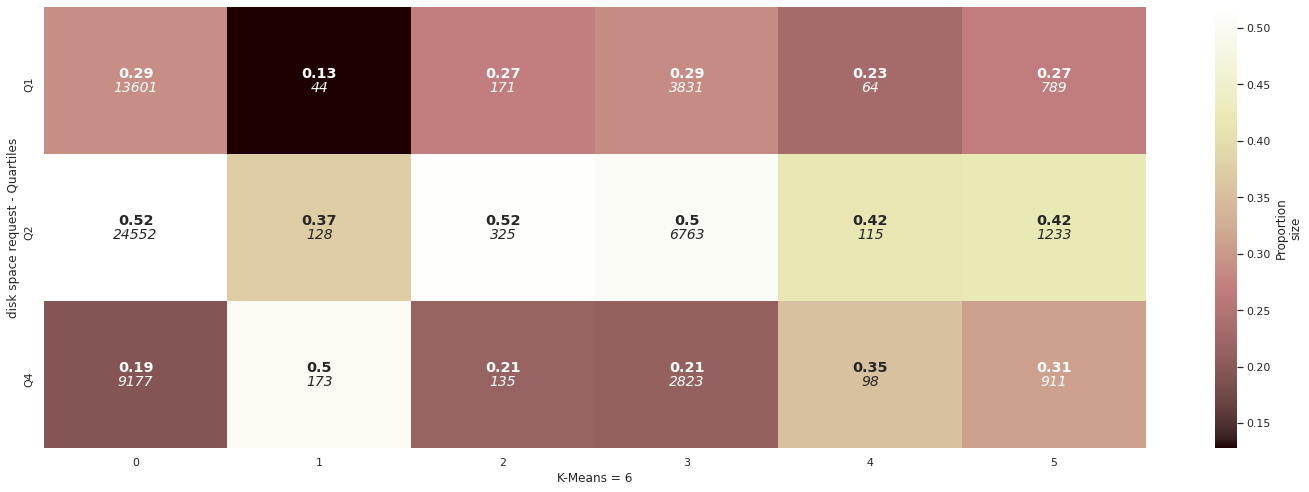

In [76]:
k=6
target_metric="disk space request - Quartiles"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="pink", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="pink", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/disk_requests_heatmap_k{k}.svg')

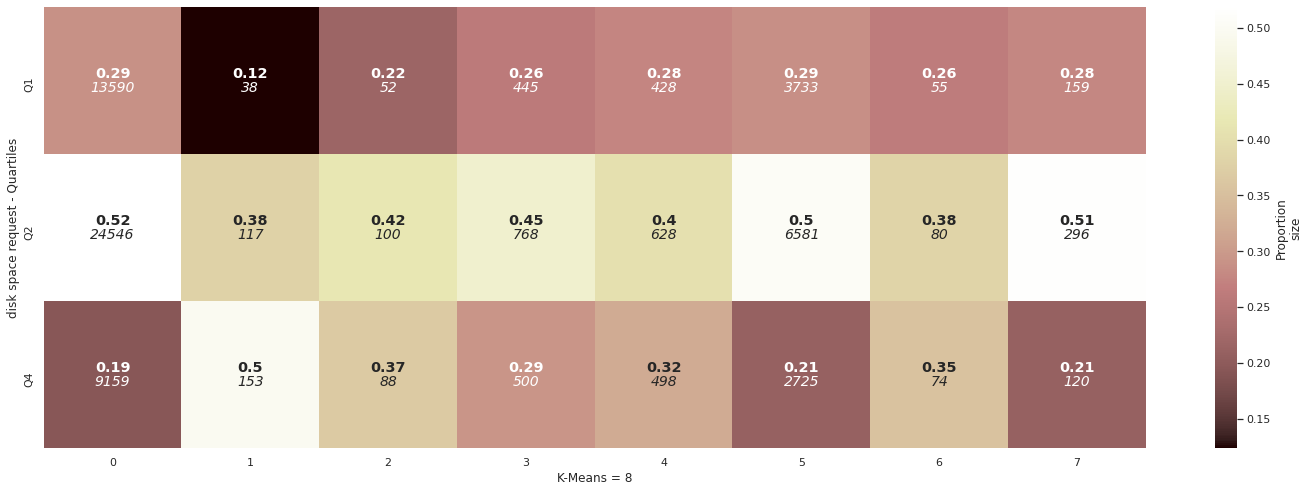

In [77]:
k=8
target_metric="disk space request - Quartiles"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=['Q1', 'Q2', 'Q3', 'Q4'])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="pink", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="pink", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/disk_requests_heatmap_k{k}.svg')

#### disk request overall

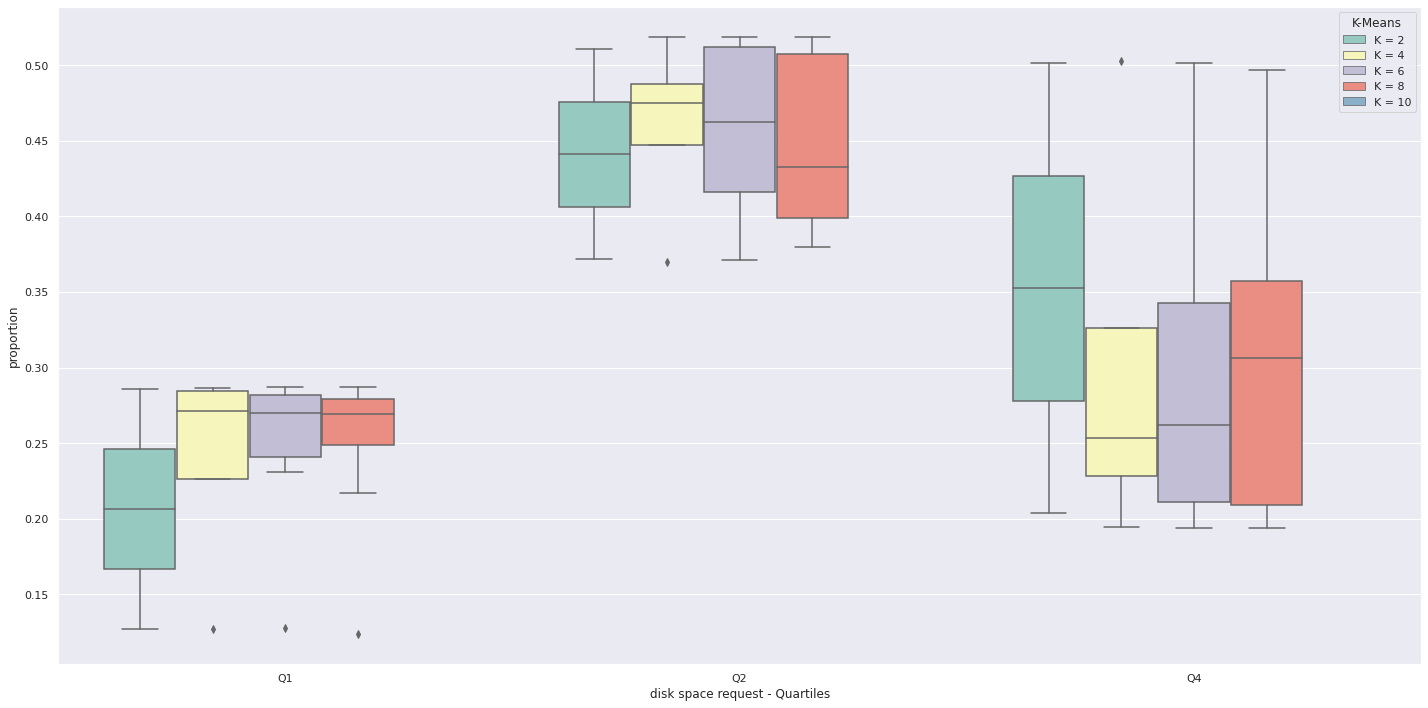

In [78]:
target_metric="disk space request - Quartiles"


heatmap_df = static_metrics.groupby([target_metric, "K-Means = 10"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]


heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, "K-Means = 10", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc.columns = ["CPU request - Quartiles", "K-Means", "proportion"]
heatmap_df_perc["K-Means"] = "K = 10"
heatmap_df_final = heatmap_df_perc.copy()

for k in range(2, 10, 2):
    heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
    heatmap_df = heatmap_df.to_frame()
    heatmap_df.columns = ["quartiles count"]


    heatmap_df_total = heatmap_df.reset_index()
    heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
    #heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

    #plt.figure(figsize=(20,7))
    #sns.heatmap(heatmap_df_total, annot=True, fmt="d")
    #
    heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
    heatmap_df_perc = heatmap_df_perc.reset_index()
    heatmap_df_perc.columns = [target_metric, "K-Means", "proportion"]
    heatmap_df_perc["K-Means"] = f"K = {k}"
    heatmap_df_final = heatmap_df_final.append(heatmap_df_perc)
    
heatmap_df_final
heatmap_df_final["K-Means"] = pd.Categorical(heatmap_df_final['K-Means'], categories=[f"K = {k}" for k in range(2, 12, 2)])

plt.figure(figsize=(20,10))
sns.boxplot(x=target_metric, y="proportion", hue="K-Means", data=heatmap_df_final, palette="Set3")
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/disk_requests_boxplot-sum.svg')

### Scheduling class resource requested

In [79]:
static_metrics["scheduling class"]

job ID
3418356       3
3418405       3
6724949       3
28185708      2
124371644     3
             ..
6486612269    1
6486612710    0
6486630408    0
6486631154    2
6486631394    2
Name: scheduling class, Length: 64933, dtype: int64

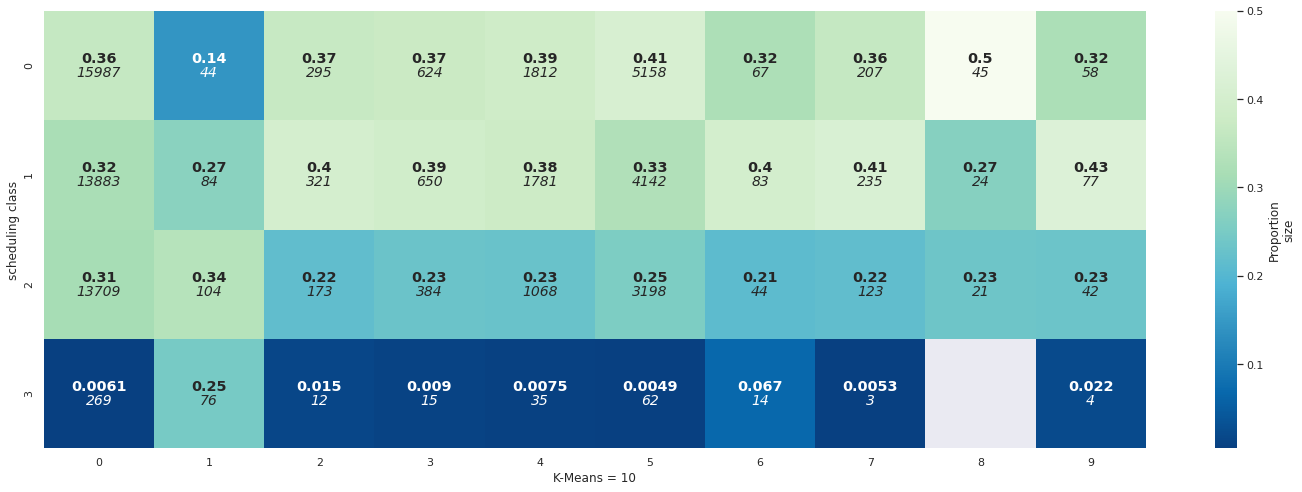

In [93]:
target_metric="scheduling class"

heatmap_df = static_metrics.groupby([target_metric, "K-Means = 10"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df

heatmap_df_total = heatmap_df.reset_index()

heatmap_df_total
heatmap_df_total = heatmap_df_total.pivot(target_metric, "K-Means = 10", "quartiles count").fillna(0).astype(int)
heatmap_df_total

heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=[0, 1, 2, 3])
##
heatmap_df_perc = heatmap_df_perc.pivot(target_metric, "K-Means = 10", "quartiles count")
##
##
#heatmap_df_total = heatmap_df_total.astype(int)
plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="GnBu_r", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="GnBu_r", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/schedclass_heatmap_k{k}.svg')

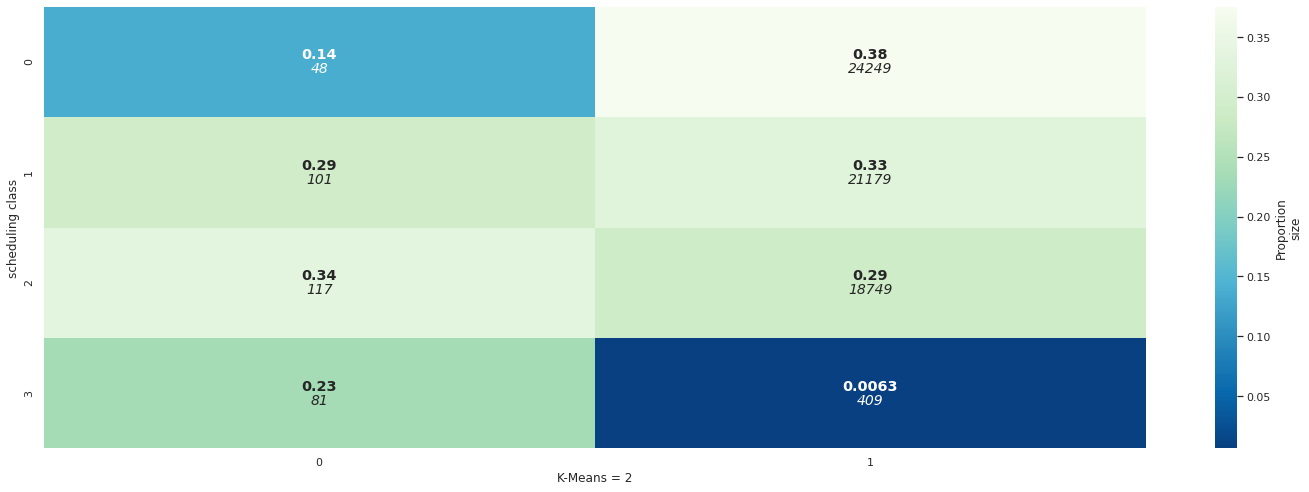

In [94]:
k=2
target_metric="scheduling class"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=[0, 1, 2, 3])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="GnBu_r", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="GnBu_r", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/schedclass_heatmap_k{k}.svg')

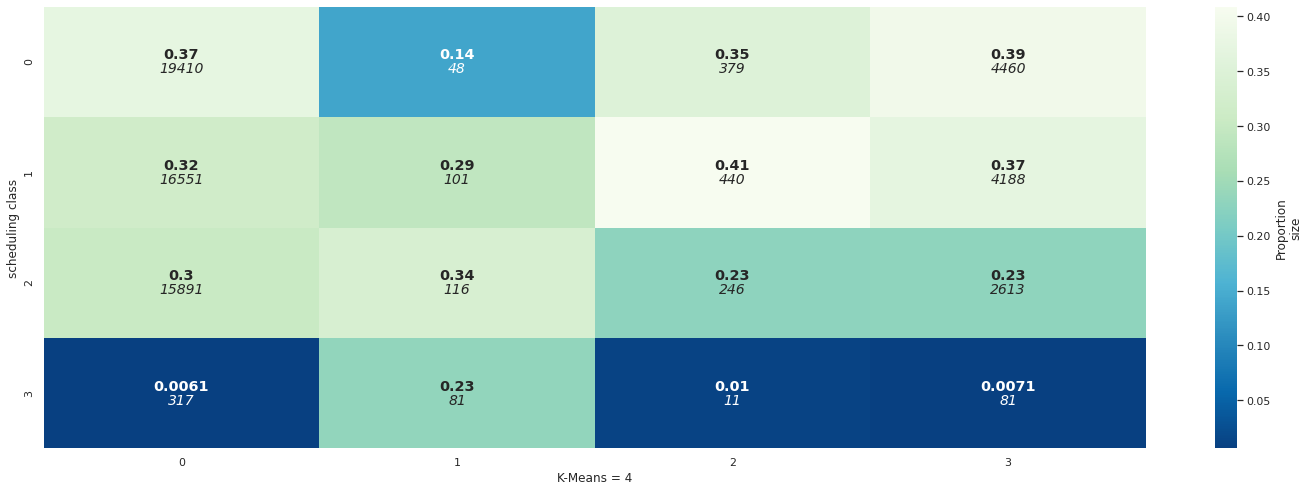

In [95]:
k=4
target_metric="scheduling class"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=[0, 1, 2, 3])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="GnBu_r", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="GnBu_r", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/schedclass_heatmap_k{k}.svg')

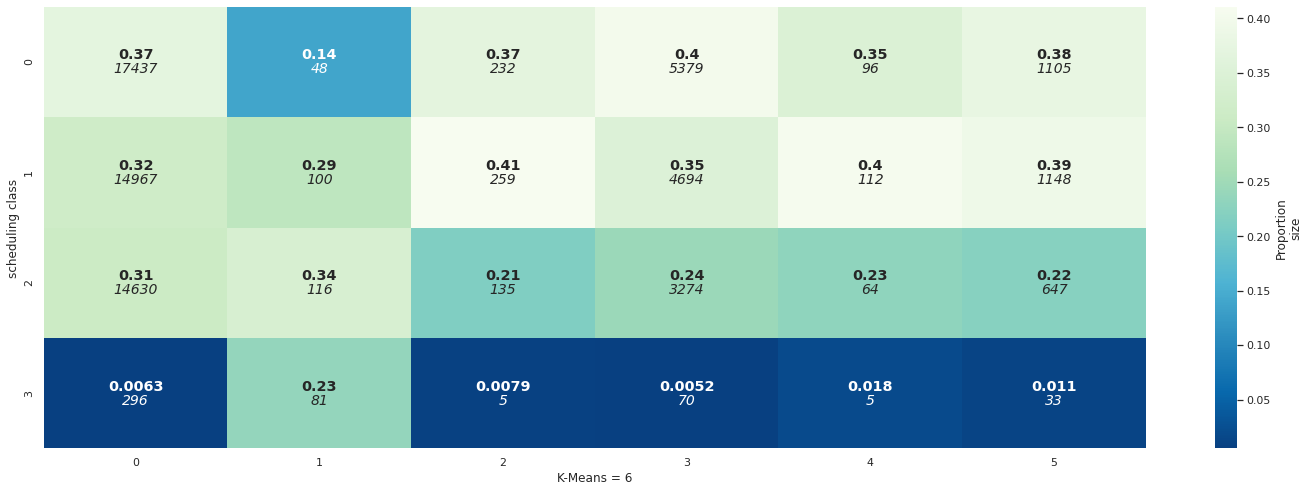

In [96]:
k=6
target_metric="scheduling class"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=[0, 1, 2, 3])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="GnBu_r", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="GnBu_r", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/schedclass_heatmap_k{k}.svg')

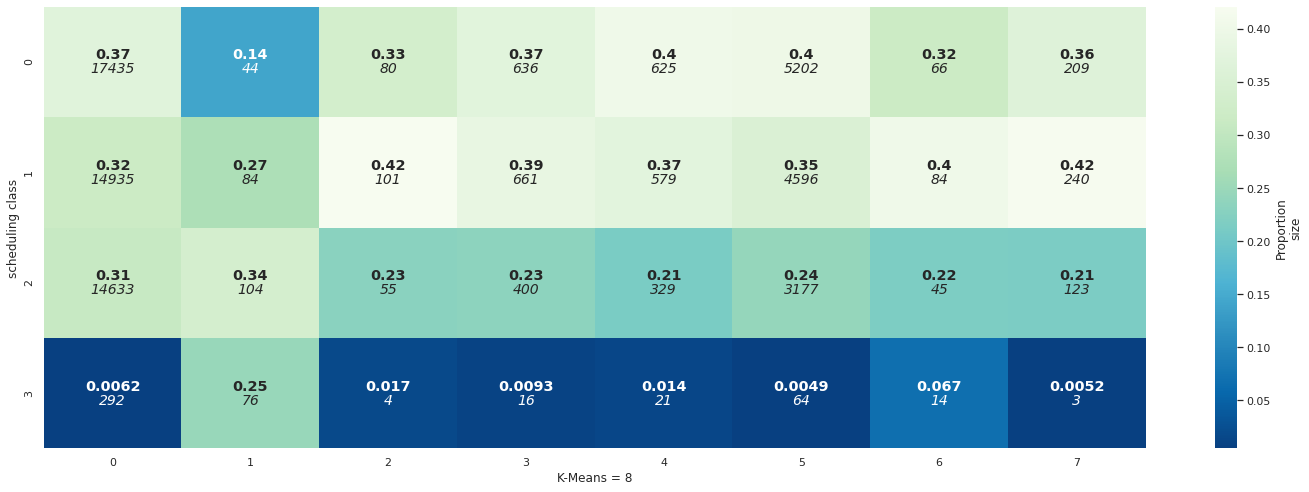

In [97]:
k=8
target_metric="scheduling class"

heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]

heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc[target_metric] = pd.Categorical(heatmap_df_perc[target_metric], categories=[0, 1, 2, 3])

heatmap_df_perc = heatmap_df_perc.pivot(target_metric, f"K-Means = {k}", "quartiles count")


plt.figure(figsize=(20,7))
sns.heatmap(heatmap_df_perc, annot=True, annot_kws={'va': 'bottom', 'fontweight': 'bold', 'fontsize': 'large'}, cmap="GnBu_r", cbar_kws={'label': 'Proportion'+'\n'+'size'})
sns.heatmap(heatmap_df_perc, annot=heatmap_df_total, annot_kws={'va': 'top', 'size': 14, 'fontstyle': 'italic'}, fmt="d", cmap="GnBu_r", cbar=False)
plt.tight_layout()
plt.savefig(f'figures/2021-11-28-presentation/schedclass_heatmap_k{k}.svg')

#### scheduling class overall

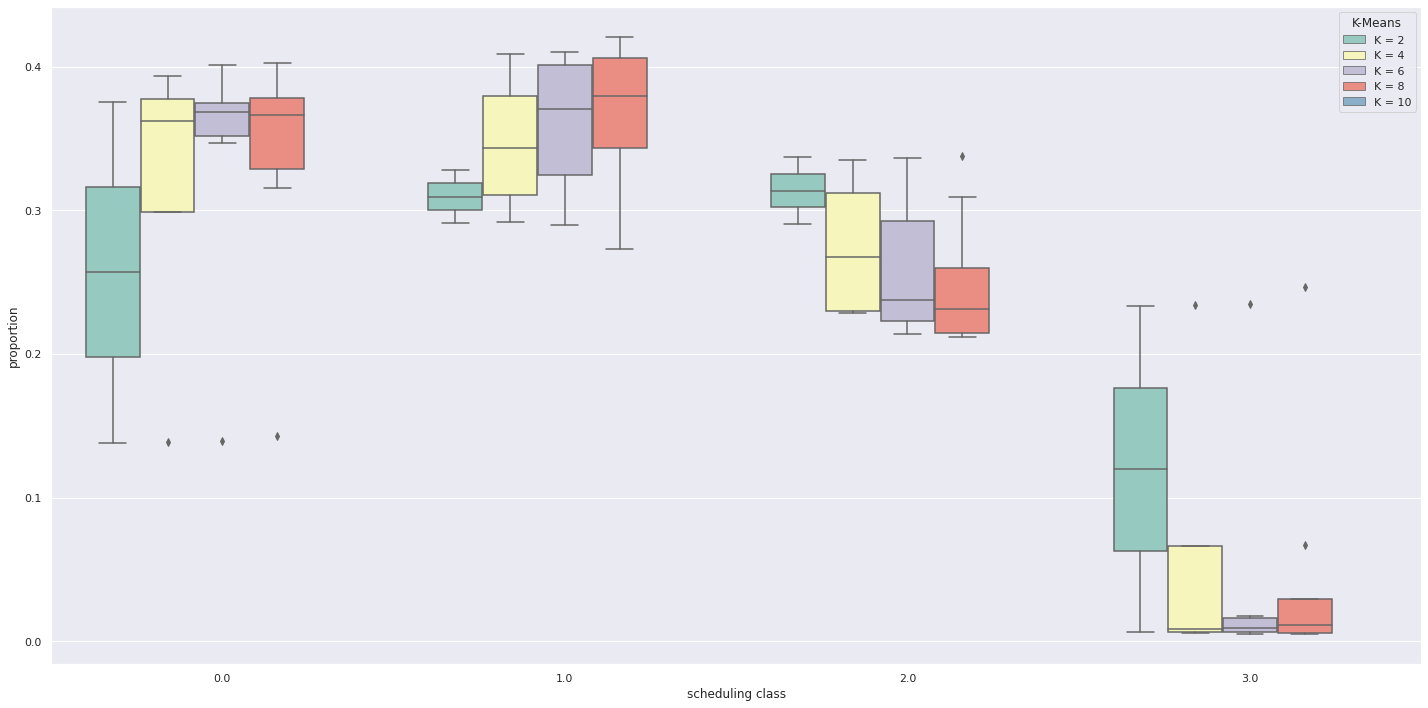

In [98]:
target_metric="scheduling class"


heatmap_df = static_metrics.groupby([target_metric, "K-Means = 10"])[target_metric].count()
heatmap_df = heatmap_df.to_frame()
heatmap_df.columns = ["quartiles count"]


heatmap_df_total = heatmap_df.reset_index()
heatmap_df_total = heatmap_df_total.pivot(target_metric, "K-Means = 10", "quartiles count")
#heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

#plt.figure(figsize=(20,7))
#sns.heatmap(heatmap_df_total, annot=True, fmt="d")
#
heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
heatmap_df_perc = heatmap_df_perc.reset_index()
heatmap_df_perc.columns = ["CPU request - Quartiles", "K-Means", "proportion"]
heatmap_df_perc["K-Means"] = "K = 10"
heatmap_df_final = heatmap_df_perc.copy()

for k in range(2, 10, 2):
    heatmap_df = static_metrics.groupby([target_metric, f"K-Means = {k}"])[target_metric].count()
    heatmap_df = heatmap_df.to_frame()
    heatmap_df.columns = ["quartiles count"]


    heatmap_df_total = heatmap_df.reset_index()
    heatmap_df_total = heatmap_df_total.pivot(target_metric, f"K-Means = {k}", "quartiles count")
    #heatmap_df_total["total"] = heatmap_df.groupby("priority labels").sum().values

    #plt.figure(figsize=(20,7))
    #sns.heatmap(heatmap_df_total, annot=True, fmt="d")
    #
    heatmap_df_perc = heatmap_df.groupby(level=[1]).apply(lambda g: g / g.sum())
    heatmap_df_perc = heatmap_df_perc.reset_index()
    heatmap_df_perc.columns = [target_metric, "K-Means", "proportion"]
    heatmap_df_perc["K-Means"] = f"K = {k}"
    heatmap_df_final = heatmap_df_final.append(heatmap_df_perc)
    
heatmap_df_final
heatmap_df_final["K-Means"] = pd.Categorical(heatmap_df_final['K-Means'], categories=[f"K = {k}" for k in range(2, 12, 2)])

plt.figure(figsize=(20,10))
sns.boxplot(x=target_metric, y="proportion", hue="K-Means", data=heatmap_df_final, palette="Set3")
plt.tight_layout()
plt.savefig('figures/2021-11-28-presentation/schedclass_boxplot-sum.svg')

## Watermark

In [99]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-01-25T14:43:04.497349+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 4.18.0-193.28.1.el8_2.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 80
Architecture: 64bit

seaborn   : 0.11.0
numpy     : 1.21.2
pandas    : 1.3.5
matplotlib: 3.4.3

